In [253]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy.stats import pointbiserialr, spearmanr
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

# dataframe setting
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:,.2f}".format

# visualization setting
sns.set()
title_size = 18
y_title = 1.01
title_weight = "bold"

# random state
RANDOM_STATE = 123

# **House Price Prediction Data Science Project**

# 1. Business Understanding

## 1.1. Determine Business Objective

### 1.1.1. Background

Nusantara Group adalah perusahaan di industri properti yang berfokus pada penjualan dan penyewaan rumah. Dalam upaya untuk meningkatkan daya saing di pasar, Nusantara Group berencana untuk menganalisis faktor-faktor yang memengaruhi harga rumah berdasarkan atribut seperti jumlah kamar tidur, luas bangunan, kondisi rumah, lokasi dan faktor-faktor lainnya. Dengan memahami pengaruh dari setiap atribut terhadap harga jual, perusahaan berharap dapat menentukan harga yang lebih sesuai dengan nilai pasar serta meningkatkan strategi pemasaran mereka untuk menarik lebih banyak pembeli potensial.

### 1.1.2. Business Objective


Target yang ingin dicapai perusahaan:
1. Meningkatkan jumlah pendapatan perusahaan
2. Meingkatkan efektifitas pemasaran
3. Meningkatkan kepuasan pelanggan


### 1.1.3. Business Sucess Criteria

Kriteria sukses dari target bisnis yang ingin dicapai:
1. Jumlah pendapatan perusahaan meningkat 15% pada akhir tahun 2024
2. Efektifitas pemasaran meningkat 100% pada Q1 2025
3. Kepuasan pelanggan meningkat 97% pada Q4 2024

## 1.2. Assess Situation

### 1.2.1. Inverntory of Resources

Sumber daya yang tersedia di perusahaan untuk mendukung proyek data science adalah sebagai berikut:
1. Hardware:
  - **Komputer**: Intel Core i7 Generasi ke-11 dengan RAM 32 GB.
  - **Laptop**: AMD Ryzen 7 dengan RAM 16 GB dan kartu grafis NVIDIA GeForce RTX™ 3050

2. Database Property:
  - **Jenis**: SQL Database
  - **Table List**: detail_properti_rumah, detail_properti_apartemen, detail_properti_perumahan.

3. Software & Tools:
  - **Bahasa Pemrograman**: Python untuk analisis data. Library yang digunakan meliputi:
    - Pandas untuk pengolaha dataframe
    - Numpy untuk analisis numerik
    - Matplotlib, Seaborn, Plotly untuk visualisasi
    - Sklearn dan XGBoost untuk pemodelan
    - Optuna untuk hyperparameter optimization
  - **Lingkungan Pengembangan**: vs code dan google colab untuk eksplorasi analisis dan pemodelan

4. Sumber Daya Manusia:
  - Data Engineer: Bertanggung jawab untuk ekstraksi, transformasi, dan manajemen data di database.
  - Front-End Developer: Membangun tampilan dan antarmuka aplikasi.
  - Back-End Developer: Mengelola server dan pengembangan backend aplikasi.
  - Data Scientist: Melakukan analisis data, pemodelan machine learning, dan interpretasi hasil.
  - Marketing Analyst: Menganalisis kebutuhan pasar dan mengintegrasikan hasil dari analisis data.
  - Head of Data: Mengarahkan strategi data dan memastikan keselarasan proyek dengan tujuan bisnis perusahaan.

### 1.2.2. Requairements, Assumptions, Constraints

Requirement
1. **Jadwal Pelaksanaan**:
   - Proyek ini direncanakan selesai dalam waktu 3 bulan dengan tahapan mulai dari analisis data, pembersihan data, pemodelan, hingga evaluasi model.
2. **Data yang Dibutuhkan**:
   - Dataset properti yang mencakup informasi terkait atribut rumah seperti jumlah kamar tidur, kamar mandi, luas area rumah, luas total halaman, jumlah lantai, kedekatan dengan area air, skala kualitas pemandangan, skala kondisi rumah, luas area lantai atas, luas area basement, tahun pembangunan pertama, tahun renovasi terakhir, nama jalan, nama kota, kode pos, dan harga rumah.
   - Data historis penjualan rumah untuk validasi akurasi prediksi model.
3. **Sumber Daya**:
   - Tim data scientist yang berpengalaman dalam analisis dan pemodelan data.
   - Tim teknis yang bertanggung jawab atas pengumpulan dan pemrosesan data.
   - Infrastruktur komputasi untuk melakukan analisis dan pemodelan data (seperti server atau platform cloud computing).
   - Software analisis dan pemodelan menggunakan Python, serta pustaka *machine learning*.

Assumptions
1. **Kualitas Data**:
   - Data yang tersedia cukup lengkap dan memiliki kualitas yang baik dengan tingkat akurasi yang tinggi, mencakup informasi atribut rumah dan harga jual yang relevan.
   - Tidak ada banyak *missing values* atau anomali data yang dapat memengaruhi hasil analisis dan model.
2. **Faktor Eksternal**:
   - Asumsi bahwa harga properti dalam dataset tidak terlalu terpengaruh oleh faktor ekonomi eksternal yang drastis (seperti resesi ekonomi atau kebijakan suku bunga).
   - Kondisi pasar properti stabil selama periode analisis, sehingga model dapat memberikan hasil prediksi yang relevan.
3. **Ketersediaan Data**:
   - Data akan tersedia dalam rentang waktu yang cukup dan dengan cakupan geografis yang memadai untuk representasi yang akurat dari pasar.

Constraints
1. **Dana**:
   - Anggaran yang dialokasikan untuk proyek ini terbatas sehingga harus dimaksimalkan untuk pengumpulan data, sumber daya manusia, dan infrastruktur teknologi.
2. **Waktu**:
   - Waktu proyek dibatasi dalam periode 3 bulan, yang dapat mempengaruhi kedalaman eksplorasi data dan percobaan model.
3. **Sumber Daya**:
   - Keterbatasan pada jumlah personal, khususnya data scientist yang bertanggung jawab atas analisis data dan pengembangan model.
4. **Data**:
   - Data yang digunakan mungkin tidak mencakup semua faktor eksternal yang dapat mempengaruhi harga properti, seperti tren pembangunan kota atau proyek infrastruktur baru.
   - Ketersediaan data yang terbatas pada area tertentu saja, sehingga model mungkin kurang akurat jika diaplikasikan di area yang datanya tidak representatif.


### 1.2.3. Risk and Contingencies

- Data tidak representatif (hanya mencakup area atau waktu tertentu). Cara mengatasi dengan menambahkan data dari sumber eksternal atau jelaskan kepada pengguna akhir bahwa prediksi mungkin terbatas pada area atau periode waktu tertentu.

- Kehilangan data atau file model selama pengembangan. Cara mengatasi simpan data dan model di cloud dengan *backup* otomatis dan gunakan kontrol versi (Git) untuk melacak perubahan kode dan data.

- Hasil prediksi model kurang akurat. Mengatasi dengan menggunakan *hyperparameter tuning*, *ensemble methods*, dan *cross-validation* untuk meningkatkan akurasi dan stabilitas model.

- Perubahan kondisi pasar properti (misalnya, resesi atau perubahan kebijakan). Cara Mengatasi dengan mengembangkan skenario "what-if" dan pastikan model dapat diperbarui dengan data terbaru.

- Keterbatasan waktu menyebabkan tugas analisis dan pengembangan model terhambat. Cara mengatasi dengan  prioritaskan tugas inti terlebih dahulu, lakukan evaluasi rutin, dan tambahkan sumber daya jika diperlukan.

### 1.2.4. Terminology

- RMSE (Root Mean Squared Error) digunakan untuk menghitung kesalahan prediksi model yang menunjukkan akar dari rata-rata kesalahan kuadrat, semakin rendah nilainya, semakin akurat model.

- MAE (Mean Absolute Error) digunakan untuk menghitung Rata-rata nilai absolut dari kesalahan prediksi, yang menunjukkan seberapa jauh prediksi dari nilai sebenarnya secara rata-rata.

- MSE (Mean Squared Error) digunakan untuk menghitung Rata-rata dari kuadrat kesalahan prediksi, digunakan untuk mengukur seberapa akurat model memprediksi data.

- XGBoost adalah Algoritma *boosting* yang efisien dan cepat untuk tugas prediksi, dengan performa tinggi dalam menangani data berukuran besar.

- Random Forest adalah Metode *ensemble* yang menggabungkan banyak *decision trees* untuk menghasilkan prediksi yang lebih akurat dan stabil.

- Hyperparameter Optuna merupakan Framework optimasi *hyperparameter* otomatis yang menggunakan algoritma berbasis pencarian *Bayesian* untuk menemukan parameter terbaik pada model secara efisien.

### 1.2.5. Costs and Benefits

1. Pengambilan Data dengan biaya 100 juta rupiah
  - Lebih banyak dana, jumlah data yang bisa diperoleh akan bertambah, sehingga akurasi model prediksi harga rumah dapat meningkat. Data dari berbagai sumber, seperti wilayah atau waktu yang berbeda, juga membantu model agar lebih sesuai dengan kondisi yang beragam.

2. Sewa Server biaya 2 juta rupiah per bulan
  - Server yang lebih canggih mempercepat pemodelan dan pengujian, serta memiliki kapasitas penyimpanan dan pemrosesan lebih besar untuk efisiensi pengolahan data dalam jumlah besar.

3. Pengembangan Algoritma biaya 50 juta  untuk pengembangan awal
  - Pengembangan algoritma canggih yang mampu beradaptasi dengan data baru dapat meningkatkan akurasi prediksi harga rumah, memberikan nilai tambah bagi perusahaan dan menjaga relevansi model seiring waktu.

4. Pelatihan dan Pengembangan Tim
biaya 30 juta
  - Meningkatkan keterampilan tim dalam analisis data dan pemodelan tidak hanya mempercepat pengembangan dan penerapan model, tetapi juga mendorong inovasi yang lebih adaptif terhadap tantangan baru.

5. Lisensi Software dan Tools biaya 15 juta rupiah per tahun
  - Menggunakan software yang tepat tidak hanya meningkatkan efisiensi dalam pengolahan dan analisis data, tetapi juga menyediakan dukungan teknis dan pembaruan berkala yang menjaga sistem tetap mutakhir.

## 1.3. Determine Data Science Goals

Untuk mencapai suskses kriteria point 1 dan 2, diperlukan analisis yang mendalam terkait dengan data harga rumah dan variabel-variabel yang berpengaruh. Oleh karena itu, dibuatlah data science project **House Price Prediction**.

### 1.3.1. Data Science Goals

1. Melakukan ekplorasi terhadap data harga rumah untuk mengetahui informasi yang berguna
2. Membuat model predictive untuk memprediksi harga rumah

### 1.3.2. Data Science Success Criteria

1. Didapatkan insight baru rekomendasi harga rumah
2. Didapatkan pemilihan kategorisasi rumah yang sesuai
3. Mengetahui faktor-faktor yang dapat mempengaruhi harga rumah
4. Dihasilkan model predictive dengan nilai MAE dibawah 5% dari rata-rata harga rumah

## 1.4. Produce Project Plan

### 1.4.1. Project Plan

**Langkah-langkah Proyek dan Kebutuhan Sumber Daya**

| **Langkah**                 | **Durasi**  | **Sumber Daya yang Diperlukan**                      |
|-----------------------------|-------------|------------------------------------------------------|
| 1. Persiapan dan Perencanaan | 3 Minggu     | - Tim Proyek (PM, Data Analyst, Developer)          |
|                             |             | - Alat manajemen proyek (mis. Trello, Asana)        |
| 2. Pengumpulan Data         | 4 Minggu     | - Tim Data Collection                                 |
|                             |             | - Anggaran untuk pengambilan data                    |
|                             |             | - Sumber data (akses database, survei)              |
| 3. Pengembangan Model       | 5 Minggu     | - Data Scientist                                     |
|                             |             | - Software analisis (mis. Python, R)                |
|                             |             | - Server untuk pemrosesan data                       |
| 4. Pengujian dan Validasi   | 1 Minggu      | - Tim QA (Quality Assurance)                         |
|                             |             | - Data uji                                           |
|                             |             | - Software analisis                                  |
| 5. Implementasi dan Peluncuran| 1 Minggu      | - Tim IT untuk implementasi                          |
|                             |             | - Pelatihan untuk pengguna akhir                     |
|                             |             | - Dashboard atau alat visualisasi                    |
| 6. Evaluasi dan Pemeliharaan | Berkelanjutan | - Tim Monitoring dan Evaluasi                         |
|                             |             | - Sumber daya untuk pembaruan model                  |


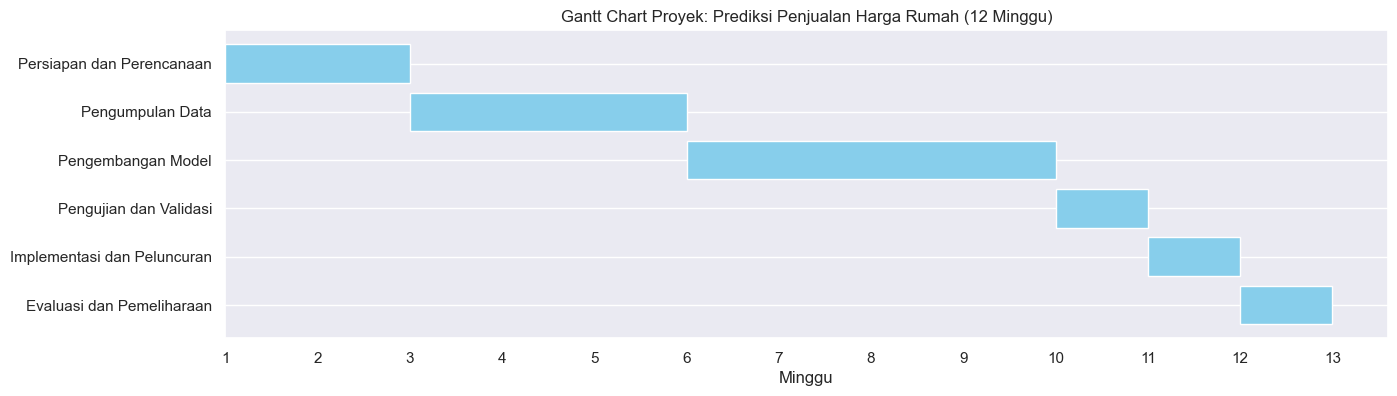

In [75]:
data = {
    "Langkah": [
        "Persiapan dan Perencanaan",
        "Pengumpulan Data",
        "Pengembangan Model",
        "Pengujian dan Validasi",
        "Implementasi dan Peluncuran",
        "Evaluasi dan Pemeliharaan",
    ],
    "Start": [1, 3, 6, 10, 11, 12],
    "Durasi": [2, 3, 4, 1, 1, 1],  # Durasi dalam minggu
}

# Membuat DataFrame
df = pd.DataFrame(data)
df["Finish"] = df["Start"] + df["Durasi"]

# Mengatur posisi Y untuk langkah proyek
df["Y_pos"] = range(len(df), 0, -1)

# Membuat Gantt chart
plt.figure(figsize=(15, 4))
plt.barh(df["Y_pos"], df["Durasi"], left=df["Start"], color="skyblue")

# Menambahkan label dan judul
plt.yticks(df["Y_pos"], df["Langkah"])
plt.xticks(range(1, 14))  # Minggu 1 hingga 12
plt.xlabel("Minggu")
plt.title("Gantt Chart Proyek: Prediksi Penjualan Harga Rumah (12 Minggu)")
plt.grid(axis="x")

# Menampilkan grafik
plt.show()


### 1.4.2. Initial Assessment of Toolas and Techniques


- Eksplorasi Data menggunakan Python, dengan pustaka seperti *pandas*, *Matplotlib*, dan *seaborn*, memudahkan analisis dan visualisasi data yang besar.

- Pengembangan Model dimana Python menjadi pilihan utama untuk mengembangkan model pembelajaran mesin dengan pustaka seperti *scikit-learn*

- Pelaporan menggunakan Microsoft Word sebagai alat untuk membuat laporan, terutama jika memerlukan kolaborasi yang baik antara anggota tim.

- Teknik Prediksi dengan Metode *XGBoost* dan *Random Forest* efektif untuk prediksi data besar, dan penggunaan *Optuna* membantu mengoptimalkan hyperparameter agar model lebih akurat.

- Visualisasi Hasil Model dengan *Matplotlib* dan *Seaborn* dalam Python sangat fleksibel dan dapat menghasilkan visualisasi hasil model yang informatif.

### 1.4.2. Initial Assessment of Tools and Techniques

1. Tools Ekplorasi: Python library diantaranya
    - matplotlib, mudah untuk digunakan mendukung subplot beberapa visualisasi dalam satu kanvas.
    - seaborn, bisa terintegrasi dengan matplotlib dengan tampilan visual yang lebih estetik.
    - plotly, menyediakan visualisasi yang estetik dan interaktif, bisa menggunakan facet plot.
2. Tools Analysis: Python library diantaranya
    - Pandas, untuk mengolah dataframe dan analisis statistik sederhana
    - Numpy, analsis numerik materimatik dan statistik dasar
    - Scipy, analisis statistik lanjut
3. Report: Microsoft Word,

# 2. Data Understanding

## 2.1. Initial Data Collection Report

**Import Data**

data diambil dari tabel detail_properti_rumah yang terdapat pada database property

In [76]:
train_df = pd.read_csv("../data/raw/train_data.csv")
test_df = pd.read_csv("../data/raw/public_test_data.csv")

In [77]:
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
df

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0            3       1.00         1330     15678    1.00           0     0   
1            4       2.50         2700      9320    2.00           0     0   
2            2       1.00          790      8424    1.00           0     0   
3            3       2.50         1800      2700    2.00           0     0   
4            4       2.50         2340     11784    2.00           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
3675         2       1.00          920      6600    1.00           0     0   
3676         3       2.25         1640      7200    2.00           0     0   
3677         4       1.00         1630      2566    1.50           0     0   
3678         4       2.50         2290     11173    2.00           0     0   
3679         4       2.50         2000      5962    2.00           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0             3         900            430      1984             0   
1             4        2700              0      1994             0   
2             4         790              0      1953          1983   
3             3        1800              0      2011             0   
4             3        2340              0      1997             0   
...         ...         ...            ...       ...           ...   
3675          3         920              0      1919          2003   
3676          4        1640              0      1985             0   
3677          3        1630              0      1921          2000   
3678          4        2290              0      1988             0   
3679          3        2000              0      1999             0   

                        street       city  statezip      price  
0             3009 229th Pl NE  Sammamish  WA 98074 405,000.00  
1                  1317 5th Ln   Kirkland  WA 98033 837,500.00  
2               556 N 167th St  Shoreline  WA 98133 268,500.00  
3            2803 SW Bataan St    Seattle  WA 98126 365,000.00  
4     24200-24498 144th Ave SE       Kent  WA 98042 330,000.00  
...                        ...        ...       ...        ...  
3675           6321 51st Ave S    Seattle  WA 98118 417,000.00  
3676          1755 140th Ct SE   Bellevue  WA 98007 350,000.00  
3677        1819-1827 25th Ave    Seattle  WA 98122 581,000.00  
3678              133rd Ave SE     Renton  WA 98058 436,500.00  
3679            720 N 193rd Pl  Shoreline  WA 98133 415,000.00  

[3680 rows x 16 columns]

## 2.2. Describe Data

**Data Information**

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       3680 non-null   int64  
 1   bathrooms      3680 non-null   float64
 2   sqft_living    3680 non-null   int64  
 3   sqft_lot       3680 non-null   int64  
 4   floors         3680 non-null   float64
 5   waterfront     3680 non-null   int64  
 6   view           3680 non-null   int64  
 7   condition      3680 non-null   int64  
 8   sqft_above     3680 non-null   int64  
 9   sqft_basement  3680 non-null   int64  
 10  yr_built       3680 non-null   int64  
 11  yr_renovated   3680 non-null   int64  
 12  street         3680 non-null   object 
 13  city           3680 non-null   object 
 14  statezip       3680 non-null   object 
 15  price          3680 non-null   float64
dtypes: float64(3), int64(10), object(3)
memory usage: 460.1+ KB


**Data Description**

In [79]:
df.describe().T

count       mean        std      min        25%        50%  \
bedrooms      3,680.00       3.40       0.90     0.00       3.00       3.00   
bathrooms     3,680.00       2.16       0.78     0.00       1.75       2.25   
sqft_living   3,680.00   2,137.85     952.49   370.00   1,470.00   1,980.00   
sqft_lot      3,680.00  14,814.93  36,122.45   638.00   5,012.50   7,681.50   
floors        3,680.00       1.51       0.54     1.00       1.00       1.50   
waterfront    3,680.00       0.01       0.09     0.00       0.00       0.00   
view          3,680.00       0.24       0.77     0.00       0.00       0.00   
condition     3,680.00       3.46       0.68     1.00       3.00       3.00   
sqft_above    3,680.00   1,825.78     857.24   370.00   1,190.00   1,590.00   
sqft_basement 3,680.00     312.07     463.45     0.00       0.00       0.00   
yr_built      3,680.00   1,970.56      29.69 1,900.00   1,951.00   1,975.00   
yr_renovated  3,680.00     815.56     980.66     0.00       0.00       0.00   
price         3,680.00 541,631.26 371,167.47     0.00 323,958.33 460,000.00   

                     75%          max  
bedrooms            4.00         9.00  
bathrooms           2.50         6.75  
sqft_living     2,612.50    10,040.00  
sqft_lot       11,111.00 1,074,218.00  
floors              2.00         3.50  
waterfront          0.00         1.00  
view                0.00         4.00  
condition           4.00         5.00  
sqft_above      2,300.00     8,020.00  
sqft_basement     600.00     4,820.00  
yr_built        1,997.00     2,014.00  
yr_renovated    1,999.00     2,014.00  
price         650,000.00 7,062,500.00

Terdapat rumah dengan harga 0, bisa dilihat dari nilai minimum variable price

In [80]:
df.describe(include=["object"]).T

count unique                    top  freq
street    3680   3634  2500 Mulberry Walk NE     3
city      3680     42                Seattle  1255
statezip  3680     77               WA 98103   119

### 2.2.1. Data Description Report

Ada 16 kolom dimana masing masing kolom berisi 3680 baris dengan 3 kolom bertype float, 10 kolom bertype int64, dan 3 kolom bertype object di mana penjelasan setiap kolom sebagai berikut:

- **bedrooms**: Jumlah kamar tidur (0–9).
- **bathrooms**: Jumlah kamar mandi (0–6,75) dengan rincian fasilitas utama.
- **sqft_living**: Luas bangunan dalam kaki persegi (sqft).
- **sqft_lot**: Luas total tanah dalam kaki persegi (sqft).
- **floors**: Jumlah lantai rumah (1–3,5), termasuk opsi ruang tambahan seperti loteng.
- **waterfront**: Pemandangan air (0 = tidak ada, 1 = ada).
- **view**: Kualitas pemandangan (skala 1–5).
- **condition**: Kondisi fisik properti (skala 1–5).
- **sqft_above**: Luas bangunan di atas tanah (sqft).
- **sqft_basement**: Luas bangunan bawah tanah atau basement (sqft).
- **yr_built**: Tahun rumah dibangun (1900–2014).
- **yr_renovated**: Tahun terakhir renovasi properti (2014).
- **street**: Nama jalan lokasi properti.
- **city**: Nama kota lokasi properti.
- **statezip**: Kode pos dan negara bagian lokasi properti.
- **price**: Harga properti dalam dolar.

## 2.3. Explore Data

### 2.3.1. Variables Distribution

In [254]:
distribution_file_path = "../reports/figures/distribution/"

#### **a. House Price Distribution**

In [82]:
fig = px.histogram(df, x="price", marginal="violin", title="House Price Distribution")

fig.write_image(f"{distribution_file_path}House Price Distribution.jpg")

fig.show()

In [83]:
fig = px.histogram(
    train_df,
    x="price",
    marginal="violin",
    title="House Price Distribution (Train Data)",
)

fig.show()

In [84]:
fig = px.histogram(
    test_df, x="price", marginal="violin", title="House Price Distribution (Test Data)"
)

fig.show()

Insight:
- distribusi dari data adalah positively skewed dan memiliki banyak nilai extreme, central tendency yang lebih mewakili untuk distribusi skewed adalah median, namun kami juga akan menggunakan nilai rata-rata sebagai perbandingan
- Rentang maksimal harga pada training dan testing berbeda cukup jauh sekitar 7 juta untuk data training dan 2.2 juta untuk data testing.

generate variable baru price_category merupakan variable untuk mengkategorikan rumah berdasarkan harga tertentu:
1. Affordable: Di bawah 300,000 (lebih umum di pedesaan).

2. Moderate: 300,000 hingga 600,000 (sesuai dengan daerah pinggiran di luar pusat kota).
3. High: 600,000 hingga 1,000,000 (mencerminkan banyak rumah kelas menengah di perkotaan).
4. Luxury: Di atas 1,000,000 (sering dijumpai di pusat urban seperti Seattle, Bellevue, dan Kirkland).

In [85]:
bins = [0, 299999, 599999, 999999, df["price"].max()]
labels = ["Affordable", "Moderate", "High", "Luxury"]

*harga rumah 0 tidak diikutsertakan dalam pengkategorian, sehingga akan muncul NaN

In [86]:
df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels, right=True)

In [87]:
fig = px.histogram(
    df, x="price_category", text_auto=True, title="Price Category Distribution"
)

fig.write_image(f"{distribution_file_path}Price Category Distribution.jpg")
fig.show()

In [88]:
fig = px.histogram(
    df,
    x="price_category",
    text_auto=".2f",
    title="Price Category Distribution in Percentage",
    histnorm="percent",
)

fig.write_image(f"{distribution_file_path}Price Category Distribution in Percenta.jpg")
fig.show()

Insight:
- Pada data yang digunakan, rumah didominasi oleh rumah dengan range harga 300 ribu, hingga kurang dari 600 ribu atau kaetgori harga moderate. Kategori rumah tersebut mendominasi hingga setengah dari keseluruhan data atau sekitar 50.16%

#### **b. Area Information Distribution**

generate variable baru yaitu:
1. sqft_open untuk mengetahui luas lahan kosong didapat dari mengurangkan luas lahan keselurhan dengan luas bangunan
2. price_per_sqft_lot untuk mengetahui harga setiap square feet lotnya (harga per kavling) didapatkan dari price dibagi dengan sqft_lot

In [89]:
df["sqft_open"] = df["sqft_lot"] - df["sqft_living"]
df["price_per_sqft_lot"] = df["price"] / df["sqft_lot"]

df[["sqft_open", "price_per_sqft_lot"]]

sqft_open  price_per_sqft_lot
0         14348               25.83
1          6620               89.86
2          7634               31.87
3           900              135.19
4          9444               28.00
...         ...                 ...
3675       5680               63.18
3676       5560               48.61
3677        936              226.42
3678       8883               39.07
3679       3962               69.61

[3680 rows x 2 columns]

In [90]:
area_information = [
    "sqft_living",
    "sqft_lot",
    "sqft_above",
    "sqft_basement",
    "sqft_open",
]

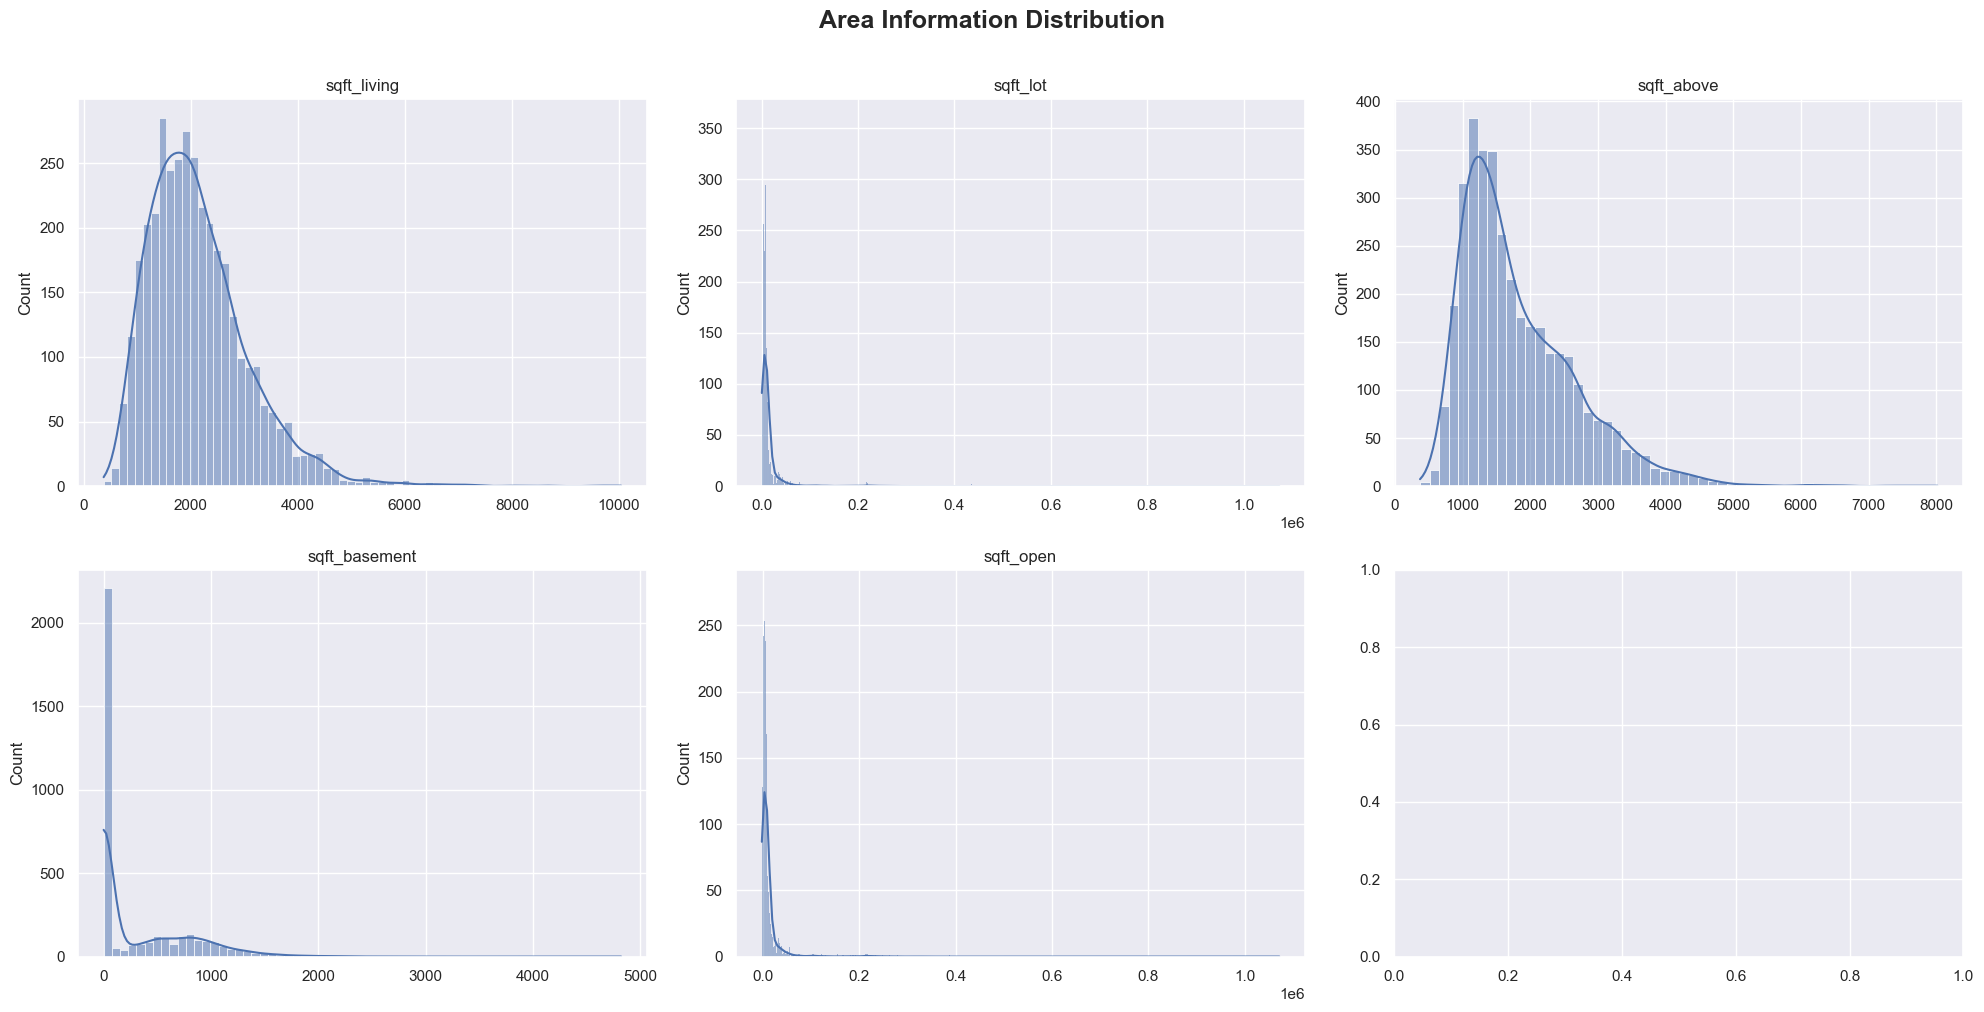

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(area_information):
    sns.histplot(df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.suptitle(
    "Area Information Distribution",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{distribution_file_path}Area Information Distribution.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

In [92]:
df.query("sqft_basement == 0").shape

(2203, 19)

Insight:
- Terdapat rumah yang bernilai 0 pada luas basement, hal ini berarti ada rumah yang tidak memiliki basement. Rumah yang tidak memiliki basement ada sebanyak 2203 rumah, dimana nilai tersebut melebihi 50% dari keselurahn jumlah data, sehingga akan kami generate variable baru yaitu rumah dengan basement diwakili dengan angka 1 dan rumah tanpa basemenet diwakili dengan angka 0

In [93]:
df["basement"] = np.where(df["sqft_basement"] > 0, 1, 0)

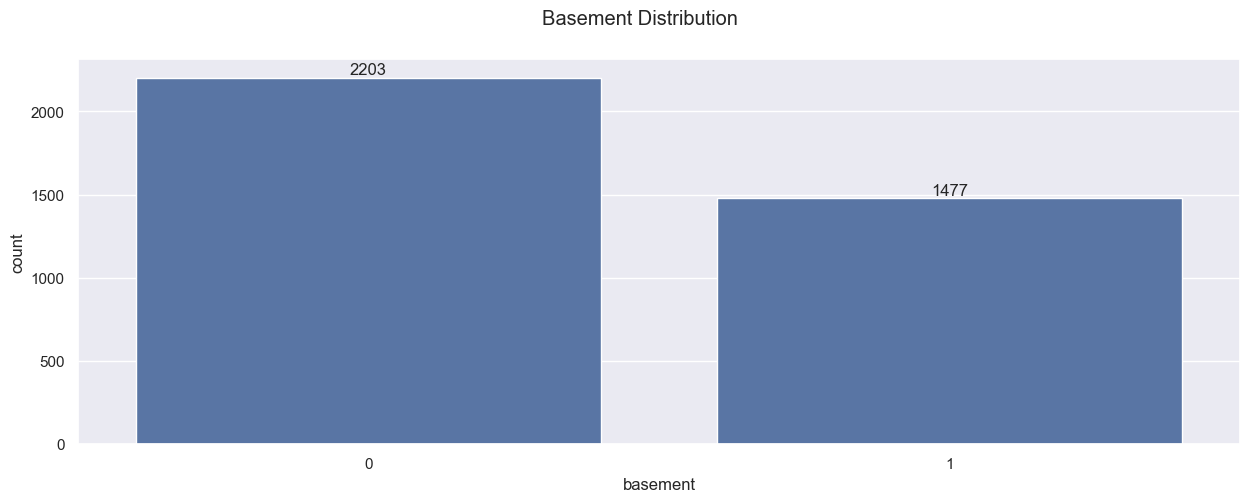

In [94]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(df, x="basement", ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.suptitle("Basement Distribution")

fig.savefig(
    f"{distribution_file_path}Basement Distribution.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

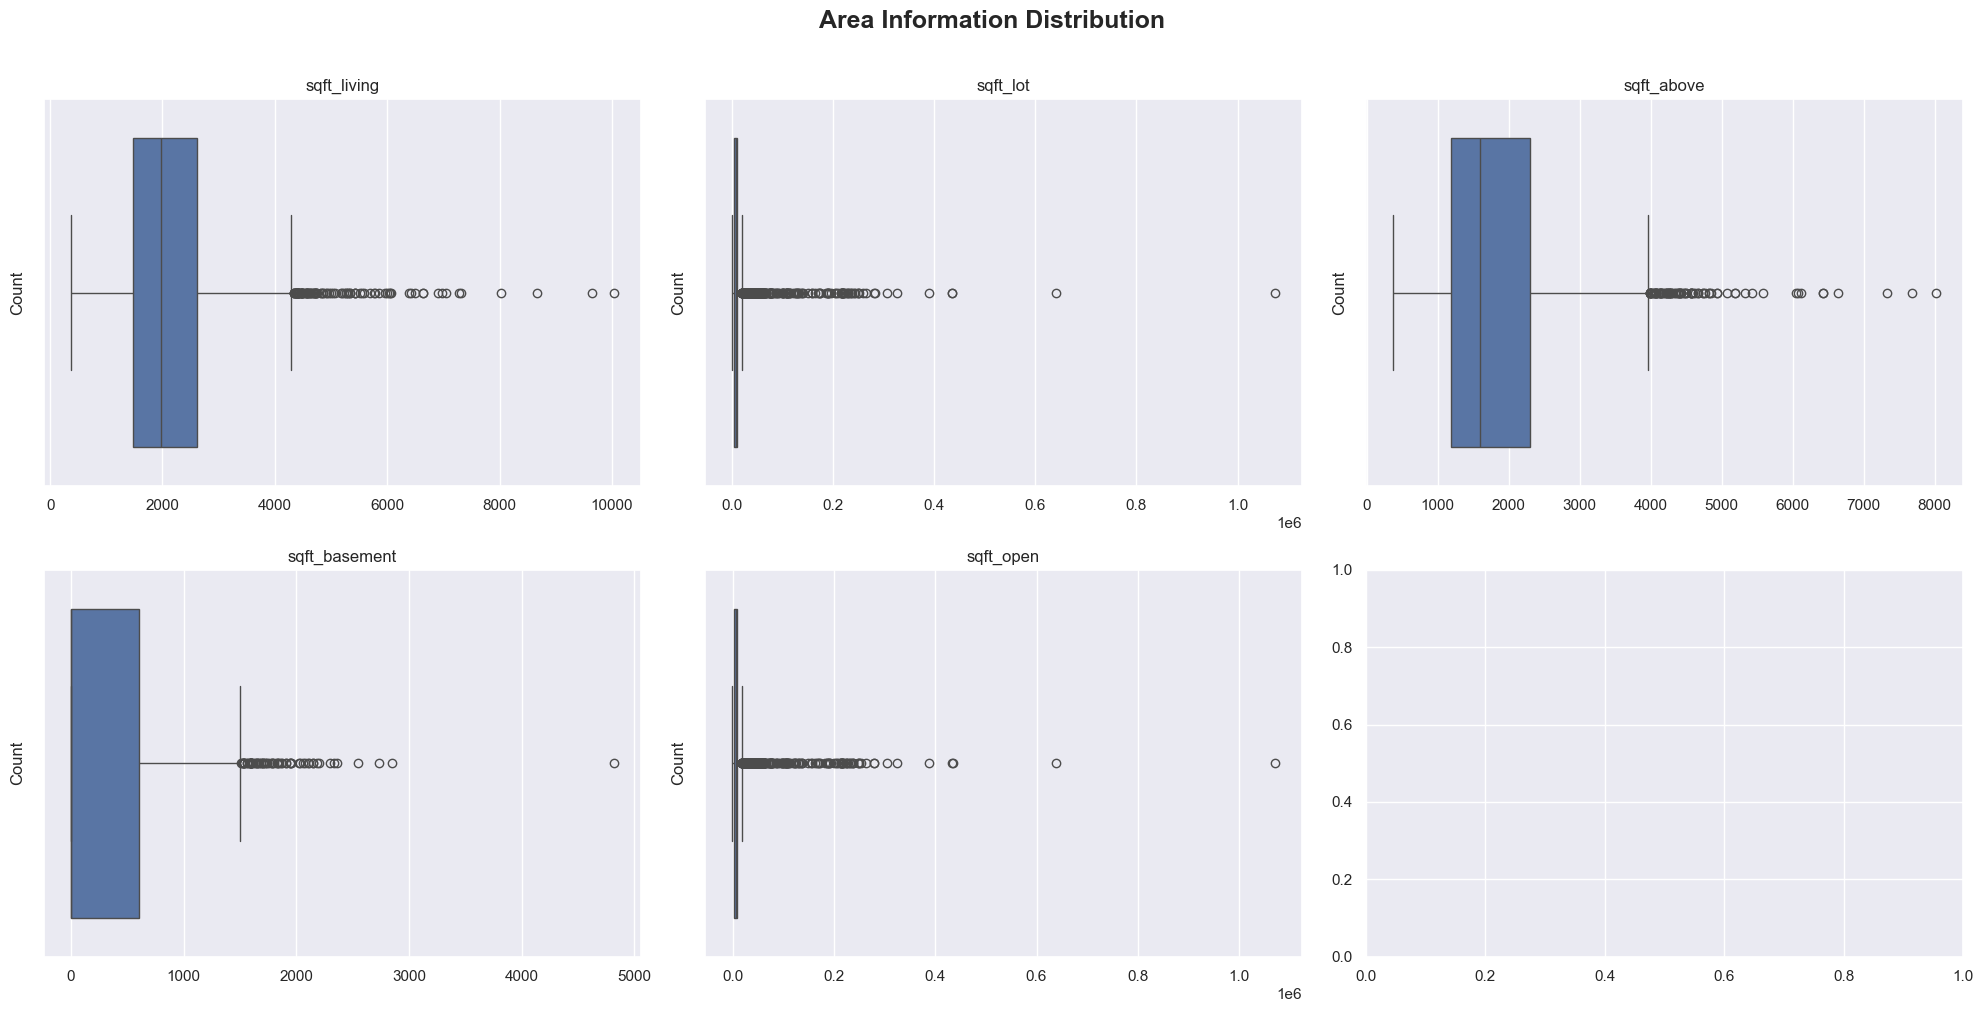

In [95]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(area_information):
    sns.boxplot(df, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.suptitle(
    "Area Information Distribution",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{distribution_file_path}Area Information Distribution (Box Plot).jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insight:
- terdapat banyak nilai extreme pada variable area information
- Terdapat hal menarik pada nilai extreme variable sqft_lot, yaitu ada rumah dengan luas keseluruhan bangunan lebih dari 1juta sqft. Dibandingkan dengan nilai sebelumnya yaitu 641 ribu, rentang tersebut cukup besar yaitu sekitar 350 ribu sqft, hal tersebut sangat menarik untuk dibahas lebih dalam

In [96]:
fig = px.histogram(
    df,
    x="price_per_sqft_lot",
    marginal="box",
    title="Price Per Square Foot Distribution",
)

fig.write_image(f"{distribution_file_path}Price Per Square Foot Distribution.jpg")
fig.show()

Insight:
- Terdapat nilai extreme yang cukup jauh dari nilai extreme yang lain pada variable price_per_sqft_lot

#### **c. Rooms and Floors Distribution**

In [97]:
rooms = ["bathrooms", "bedrooms", "floors"]

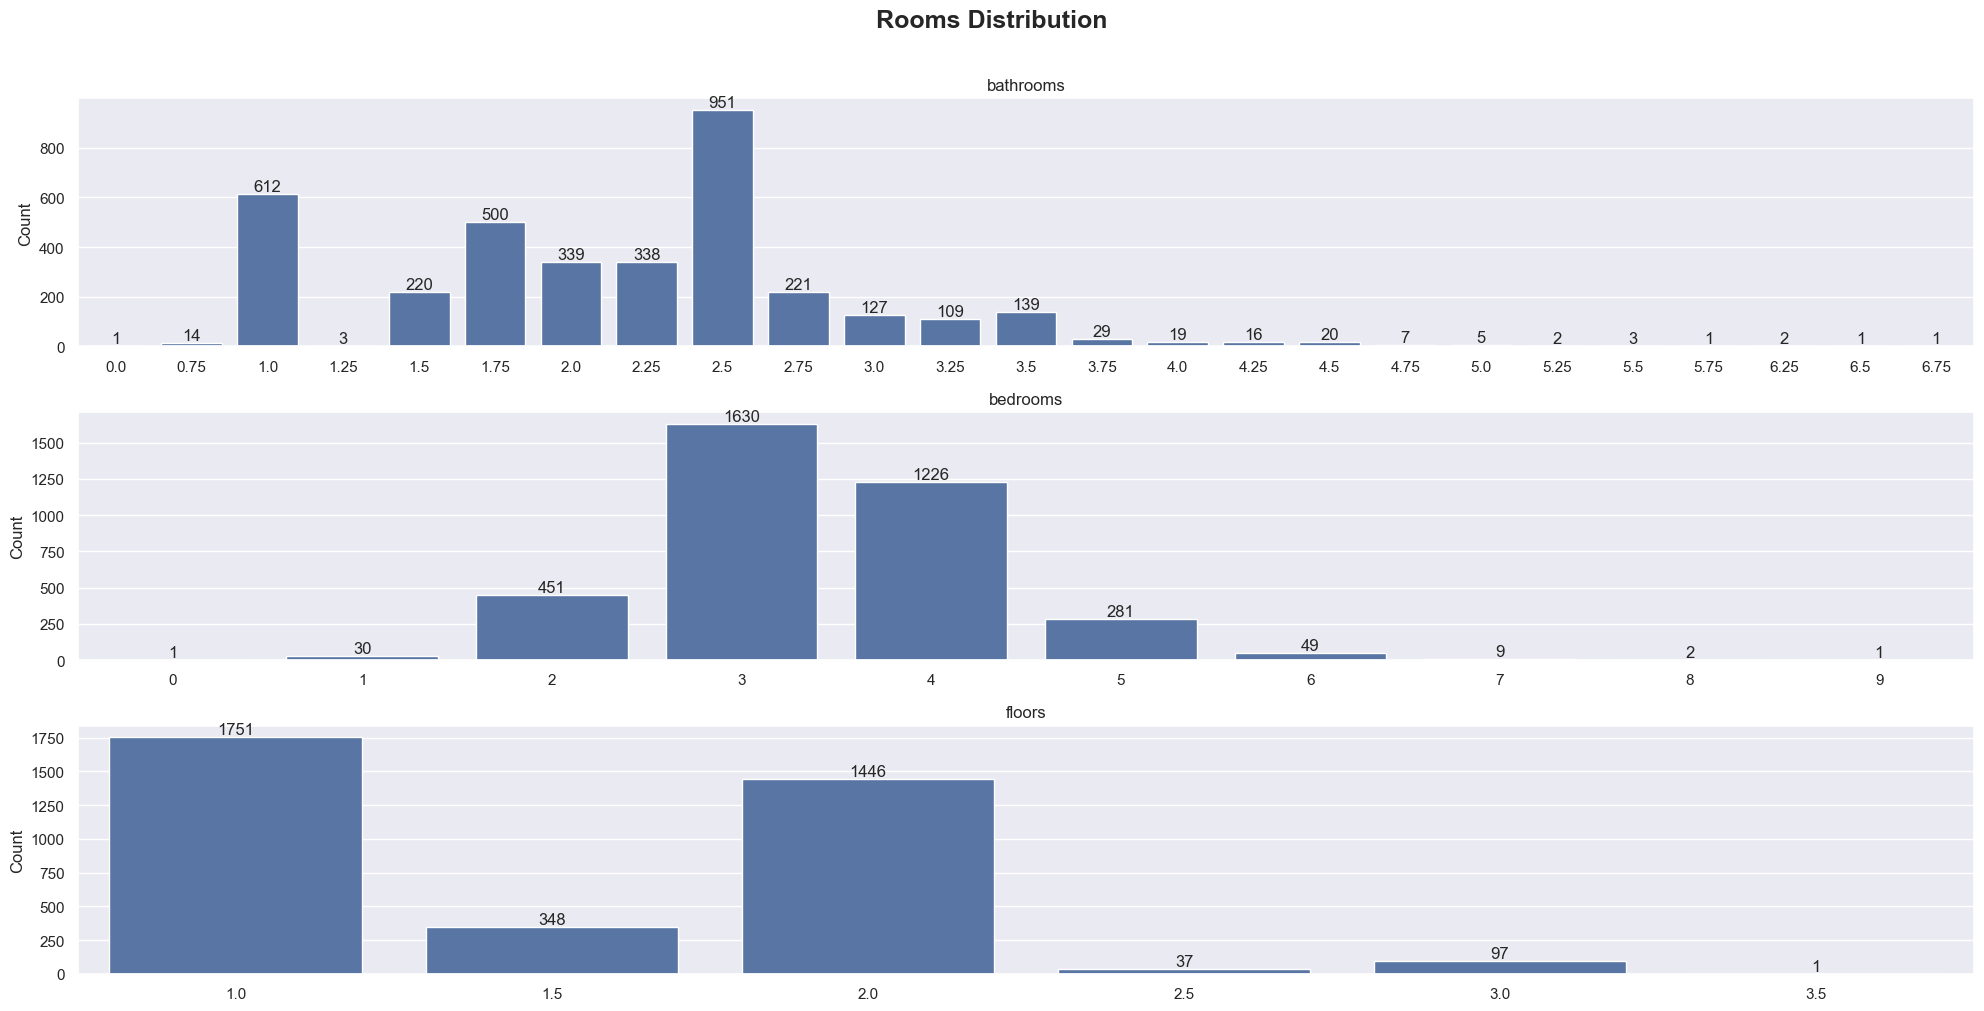

In [98]:
fig, axes = plt.subplots(nrows=3, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(rooms):
    sns.countplot(df, x=col, ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.suptitle(
    "Rooms Distribution", y=y_title, fontweight=title_weight, fontsize=title_size
)
plt.tight_layout()

fig.savefig(
    f"{distribution_file_path}Rooms Distribution.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insight:
- Terdapat rumah yang tidak memiliki kamar tidur
- Terdapat rumah yang tidak memiliki toilet
- Hanya ada satu rumah yang memiliki 9 kamar tidur
- Hanya ada satu rumah yang memiliki lantai 3.5

#### **d. Aesthetic Aspects Distribution**

aspek estetika mencakup variable waterfront, view, dan condition daari rumah

In [99]:
aesthetic_aspect = ["waterfront", "view", "condition"]

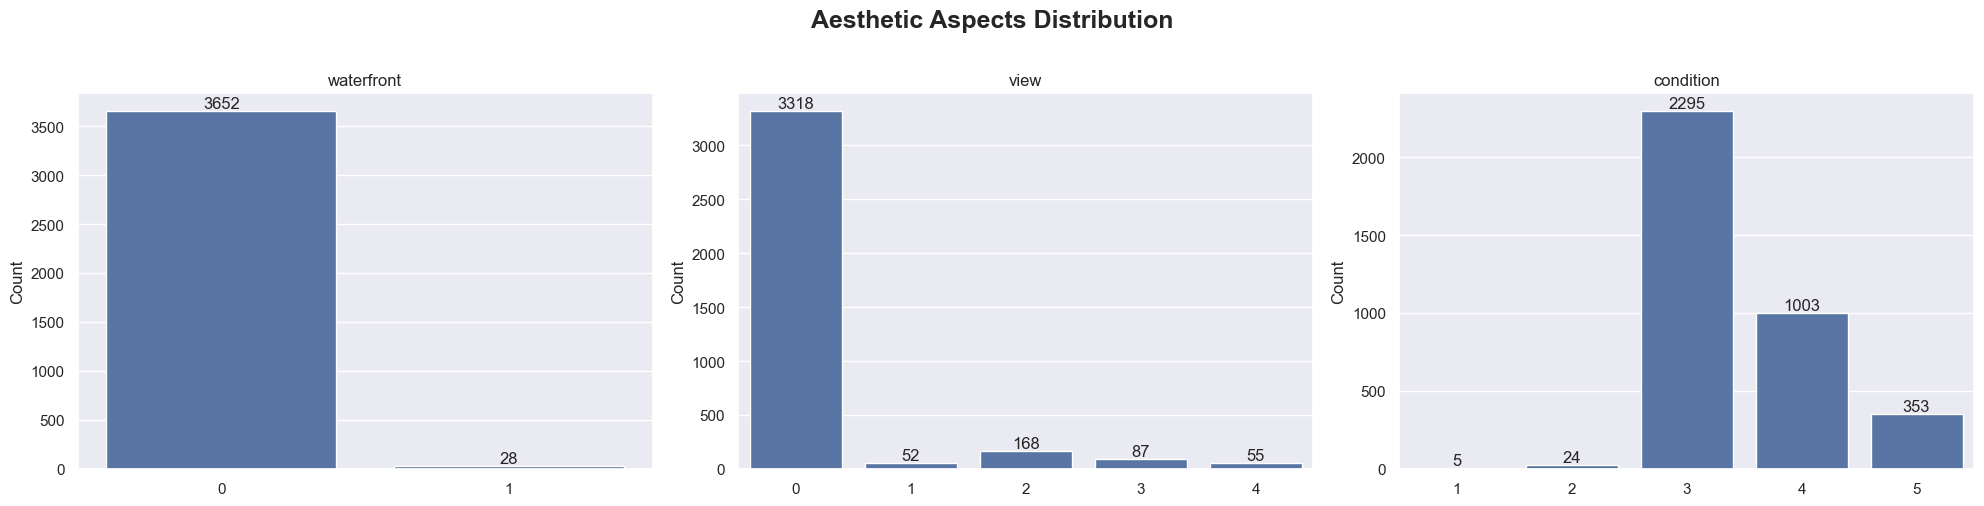

In [100]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

axes = axes.flatten()

for i, col in enumerate(aesthetic_aspect):
    sns.countplot(df, x=col, ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.suptitle(
    "Aesthetic Aspects Distribution",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{distribution_file_path}Aesthetic Aspects Distribution.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

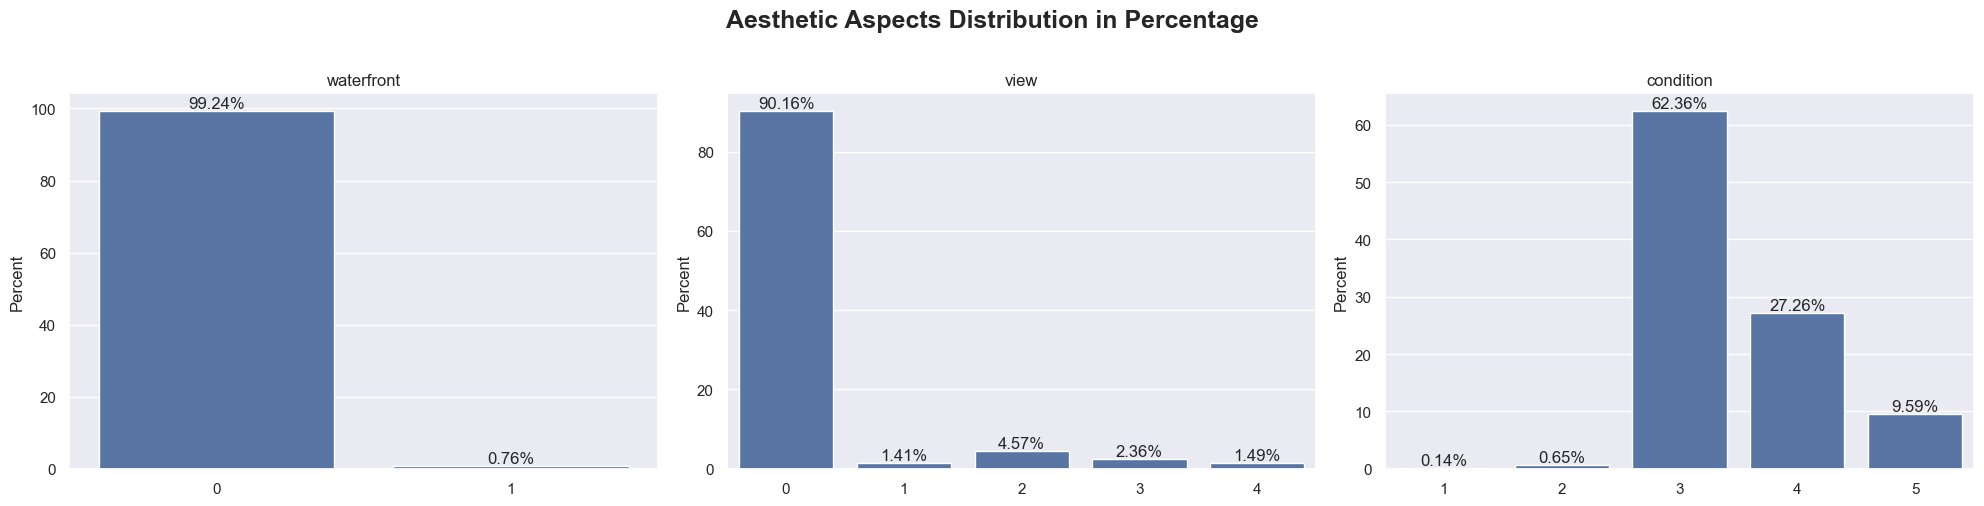

In [101]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

axes = axes.flatten()

for i, col in enumerate(aesthetic_aspect):
    sns.countplot(df, x=col, ax=axes[i], stat="percent")
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt="%.2f%%")
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Percent")

plt.suptitle(
    "Aesthetic Aspects Distribution in Percentage",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{distribution_file_path}Aesthetic Aspects Distribution in Percentage.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insight:
- Hanya terdapat 0.76% atau 28 rumah saja yang memiliki view ke perairan
- Sebagian besar rumah memmiliki nilai view 0, padahal rentang view seharusnya 1-5, sehingga dari sini bisa diartikan sebagian besar rumah atau sekitar 90% rumah tidak dinilai aspek penampilannya
- Kurang dari 1% rumah memiliki kondisi dibawah 3 dari skala 1-5, hal ini berarti rumah pada dataset perusahaan memiliki standard kondisi yang bagus.

#### **e. Year Information Distribution**

In [102]:
year_info = ["yr_built", "yr_renovated"]

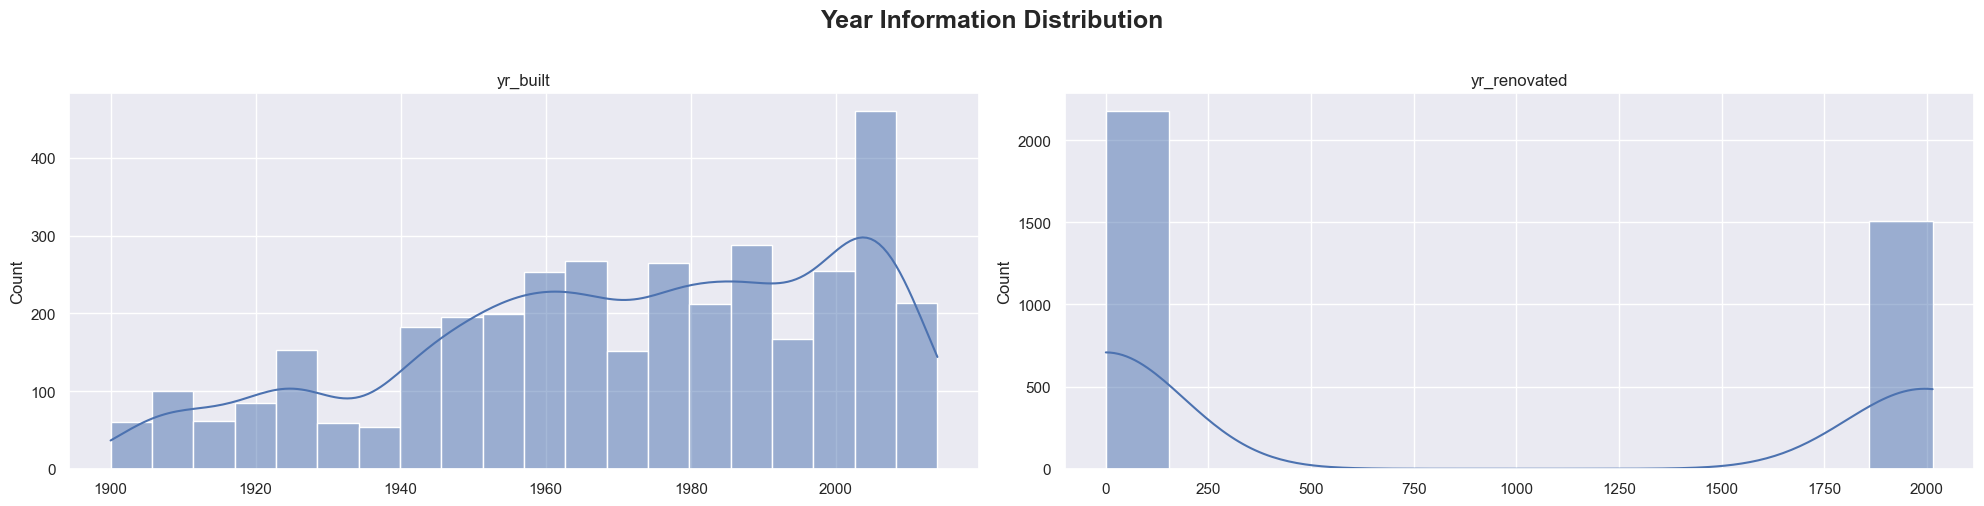

In [103]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

axes = axes.flatten()

for i, col in enumerate(year_info):
    sns.histplot(df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.suptitle(
    "Year Information Distribution",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{distribution_file_path}Year Information Distribution.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

*1. Year Built*

In [104]:
df["yr_built"].nunique()

115

Rentang variable tahun rumah dibangun terlalu luas yaitu 115 tahun, sehingga akan kita coba untuk mengkategorisasi. kategorisasi didasarkan pada era dan gaya arsitektur
- 1900–1939: Era pra-Perang Dunia II (rumah sering memiliki arsitektur klasik).
- 1940–1969: Era pasca-Perang Dunia II (sering menunjukkan gaya suburban dan konstruksi massal).
- 1970–1999: Era modern awal (mulai ada perkembangan teknologi dalam konstruksi).
- 2000–2014: Era modern (lebih banyak rumah dengan teknologi terbaru dan desain yang efisien energi).

Referensi: Pendekatan ini digunakan dalam analisis properti historis dan penelitian gaya arsitektur, seperti yang tercantum dalam American Housing Survey dan artikel arsitektur historis pada National Register Bulletin.

In [105]:
bins = [1900, 1940, 1970, 2000, 2014 + 1]
labels = ["Pre-World War II", "Post-World War II", "Early Modern", "Modern"]

In [106]:
df["era_category"] = pd.cut(df["yr_built"], bins=bins, labels=labels, right=False)

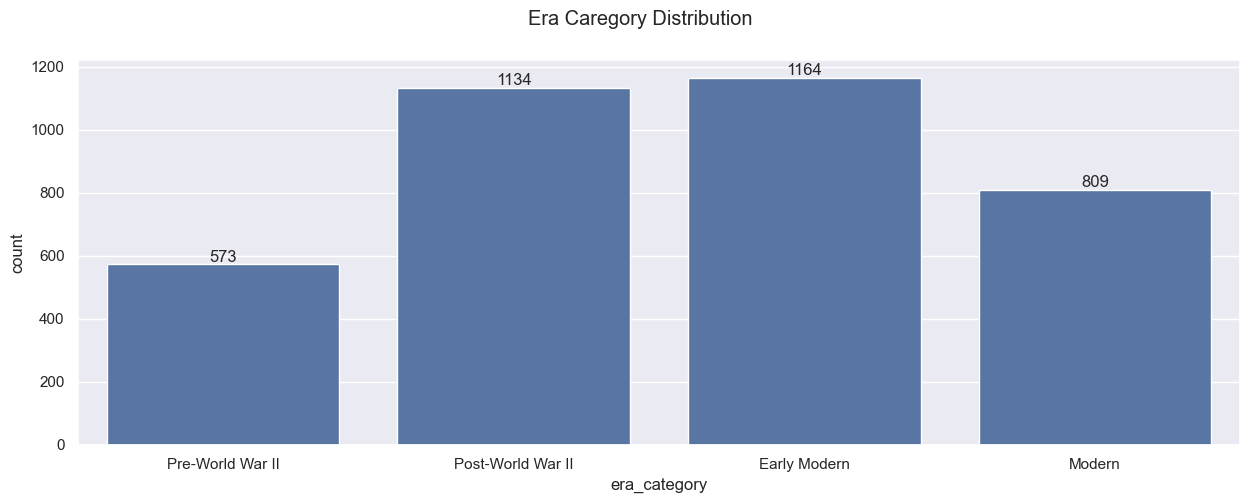

In [107]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(df, x="era_category", ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.suptitle("Era Caregory Distribution")

fig.savefig(
    f"{distribution_file_path}Era Caregory Distribution.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

geenrate variable baru house_age untuk melihat usia dari rumah berdasarkan tahun rumah dibangun. tahun yang digunakan sebagai acuan adalah tahun 2015 dengan mempertimbangkan tahun terakhir rumah dibangun yaitu 2014 dan menghindari nilai usia rumah 0 tahun, sehingga kita melebihkan tahun acuan menjadi 2015.

In [108]:
df["house_age"] = 2015 - df["yr_built"]

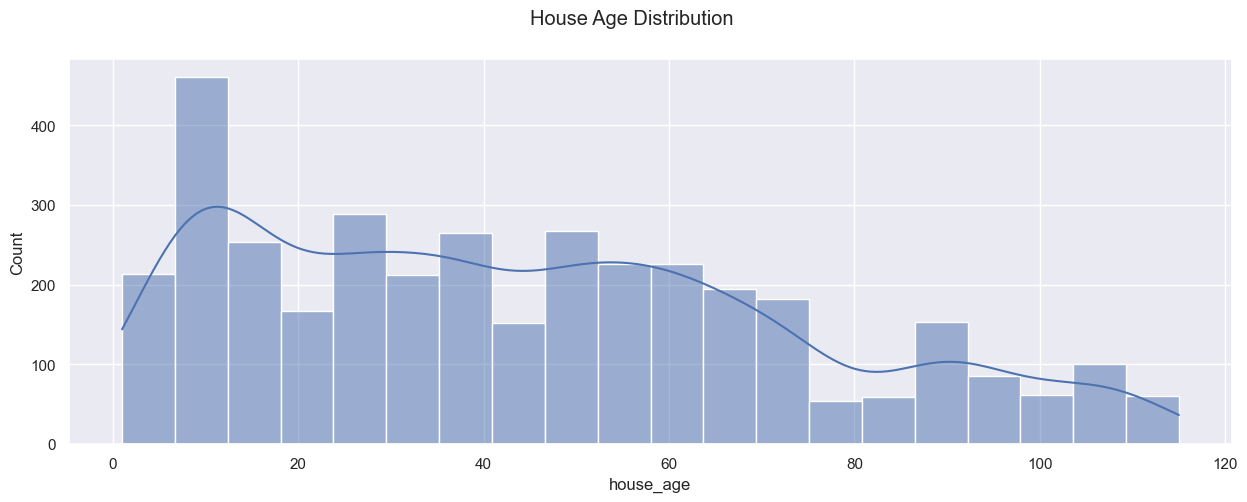

In [109]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.histplot(df, x="house_age", ax=ax, kde=True)
plt.suptitle("House Age Distribution")

fig.savefig(
    f"{distribution_file_path}House Age Distribution.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

*2. Year Renovated*

In [110]:
px.histogram(df, x="yr_renovated", title="Year Renovated Dsitribution")

Insight:
- tahun rumah yang direnovasi dan rumah yang tidak direnovasi memiliki perbedaan jumlah yang signifikan, kami akan mencoba untuk melakukan kategorisasi biner, 1 untuk rumah yang direnovasi dan 0 untuk rumah yang tidak direnovasi

In [111]:
fig = px.histogram(
    df.query("yr_renovated != 0"),
    x="yr_renovated",
    title="Year Renovated Dsitribution",
    marginal="violin",
)

fig.write_image(f"{distribution_file_path}Year Renovated Dsitribution.jpg")

fig.show()

In [112]:
df["renovated"] = np.where(df["yr_renovated"] > 0, 1, 0)

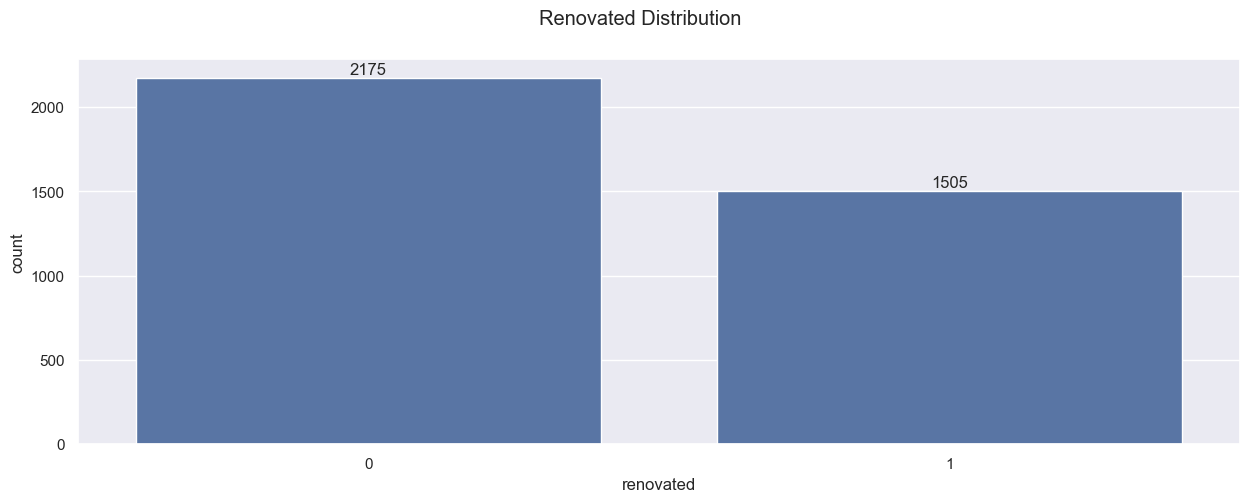

In [113]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(df, x="renovated", ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.suptitle("Renovated Distribution")

fig.savefig(
    f"{distribution_file_path}Renovated Distribution.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insight:
- Masih banyak rumah yang belum di renovasi yaitu 2175 rumah dibandingkan dengan rumah yang sudah direnovasi (1505)

#### **f. Location Distribution**

variable yang termasuk pada kategori location adalah street, city, dan statezip

In [114]:
df[["state", "zip_code"]] = df["statezip"].str.split().tolist()

In [115]:
df[["state", "zip_code"]]

state zip_code
0       WA    98074
1       WA    98033
2       WA    98133
3       WA    98126
4       WA    98042
...    ...      ...
3675    WA    98118
3676    WA    98007
3677    WA    98122
3678    WA    98058
3679    WA    98133

[3680 rows x 2 columns]

In [116]:
df[["state", "zip_code"]].nunique()

state        1
zip_code    77
dtype: int64

semua kota berada di washington, sehingga akan dilakukan penghapusan kolom state

In [117]:
df["zip_code"] = df["zip_code"].astype("int")

*1. city*

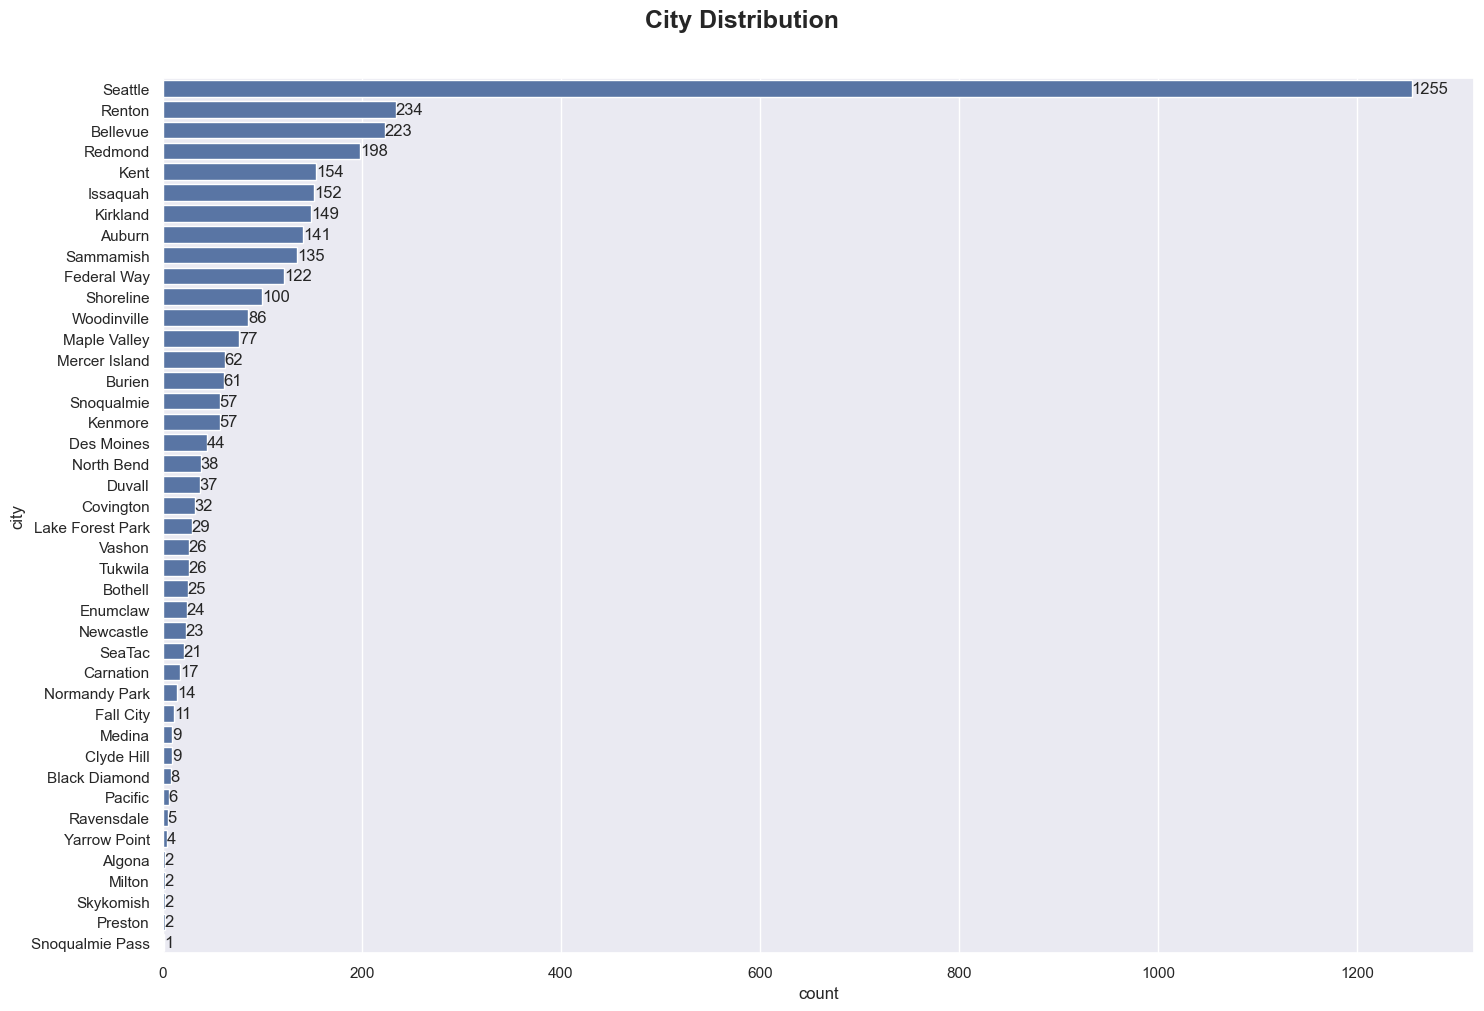

In [118]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.countplot(df, y="city", ax=ax, order=df["city"].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.suptitle(
    "City Distribution",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)

plt.tight_layout()
fig.savefig(
    f"{distribution_file_path}City Distribution.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)
plt.show()

Insight:
- Lokasi rumah paling banyak berada pada pusat kota Washington state yaitu Seattle, disusul oleh Renton dan Bellevue.

menambahkan informasi latitude dan longitude dari city

In [119]:
us_cities = pd.read_csv("../data/external/mapping city latitude longitude.csv")
us_cities

city   lat     lng
0          Sammamish 47.60 -122.04
1           Kirkland 47.70 -122.21
2          Shoreline 47.76 -122.34
3            Seattle 47.62 -122.32
4               Kent 47.39 -122.21
5             Renton 47.48 -122.19
6             Vashon 47.41 -122.47
7       Maple Valley 47.37 -122.04
8           Bellevue 47.60 -122.15
9             Burien 47.48 -122.34
10       Federal Way 47.31 -122.34
11            SeaTac 47.44 -122.30
12     Mercer Island 47.57 -122.23
13           Bothell 47.77 -122.20
14           Redmond 47.68 -122.12
15         Newcastle 47.53 -122.16
16  Lake Forest Park 47.76 -122.29
17            Auburn 47.30 -122.21
18          Issaquah 47.54 -122.05
19     Normandy Park 47.43 -122.34
20           Kenmore 47.75 -122.25
21        Snoqualmie 47.53 -121.84
22        North Bend 47.49 -121.77
23          Enumclaw 47.20 -121.99
24           Pacific 47.26 -122.25
25         Covington 47.37 -122.10
26         Carnation 47.64 -121.90
27       Woodinville 47.76 -122.15
28        Clyde Hill 47.63 -122.22
29            Duvall 47.74 -121.97
30     Black Diamond 47.31 -122.02
31        Des Moines 47.39 -122.32
32            Medina 47.63 -122.24
33           Tukwila 47.47 -122.27
34      Yarrow Point 47.65 -122.22
35         Fall City 47.57 -121.91
36            Algona 47.28 -122.25
37            Milton 47.25 -122.32
38         Skykomish 47.71 -121.36
39        Ravensdale 47.36 -121.97
40           Preston 47.52  121.93
41   Snoqualmie Pass 47.40 -121.41

In [120]:
df = df.merge(us_cities, left_on="city", right_on="city", how="left")

In [121]:
df.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1330     15678    1.00           0     0   
1         4       2.50         2700      9320    2.00           0     0   
2         2       1.00          790      8424    1.00           0     0   
3         3       2.50         1800      2700    2.00           0     0   
4         4       2.50         2340     11784    2.00           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3         900            430      1984             0   
1          4        2700              0      1994             0   
2          4         790              0      1953          1983   
3          3        1800              0      2011             0   
4          3        2340              0      1997             0   

                     street       city  statezip      price price_category  \
0          3009 229th Pl NE  Sammamish  WA 98074 405,000.00       Moderate   
1               1317 5th Ln   Kirkland  WA 98033 837,500.00           High   
2            556 N 167th St  Shoreline  WA 98133 268,500.00     Affordable   
3         2803 SW Bataan St    Seattle  WA 98126 365,000.00       Moderate   
4  24200-24498 144th Ave SE       Kent  WA 98042 330,000.00       Moderate   

   sqft_open  price_per_sqft_lot  basement       era_category  house_age  \
0      14348               25.83         1       Early Modern         31   
1       6620               89.86         0       Early Modern         21   
2       7634               31.87         0  Post-World War II         62   
3        900              135.19         0             Modern          4   
4       9444               28.00         0       Early Modern         18   

   renovated state  zip_code   lat     lng  
0          0    WA     98074 47.60 -122.04  
1          0    WA     98033 47.70 -122.21  
2          1    WA     98133 47.76 -122.34  
3          0    WA     98126 47.62 -122.32  
4          0    WA     98042 47.39 -122.21

In [122]:
df.drop(["state"], axis=1, inplace=True)

In [123]:
count_city = (
    df.groupby(["city", "lat", "lng"])["city"]
    .agg("count")
    .to_frame()
    .rename(columns={"city": "count"})
    .reset_index()
)

In [124]:
count_city.head()

city   lat     lng  count
0         Algona 47.28 -122.25      2
1         Auburn 47.30 -122.21    141
2       Bellevue 47.60 -122.15    223
3  Black Diamond 47.31 -122.02      8
4        Bothell 47.77 -122.20     25

In [125]:
fig = px.scatter_map(
    count_city,
    lat="lat",
    lon="lng",
    center={"lat": 47.54, "lon": -122.05},
    zoom=8,
    hover_name="city",
    title="City Geospatial Visualization",
)
fig.write_image(f"{distribution_file_path}City Geospatial Visualizatiion.jpg")
fig.show()

In [126]:
fig = px.scatter_map(
    count_city,
    lat="lat",
    lon="lng",
    size="count",
    center={"lat": 47.54, "lon": -122.05},
    zoom=8,
    hover_name="city",
    title="City Geospatial Visualization (by Count)",
)
fig.write_image(f"{distribution_file_path}City Geospatial Visualization (by Count).jpg")
fig.show()

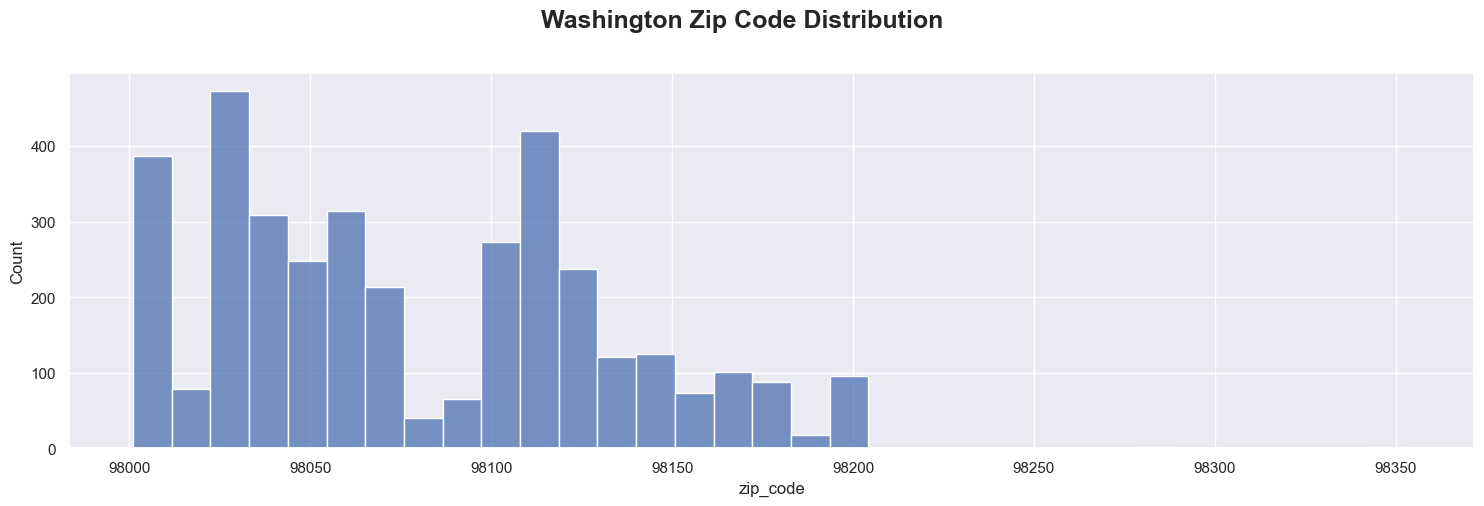

In [127]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.histplot(df, x="zip_code", ax=ax)
plt.suptitle(
    "Washington Zip Code Distribution",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)

plt.tight_layout()
fig.savefig(
    f"{distribution_file_path}plotnWashington Zip Code Distributioname.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)
plt.show()

### 2.3.2. Correlation Analysis

In [ ]:
target_directory = os.path.join("..", "reports", "figures", "correlation")

os.makedirs(target_directory, exist_ok=True)

print(f"Folder created at: {os.path.abspath(target_directory)}")

Folder created at: b:\Project\regression\house-price-prediction\reports\figures\correlation


In [129]:
correlation_file_path = "../reports/figures/correlation/"

#### **a. Area Information vs House Price**

In [130]:
area_information

['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_open']

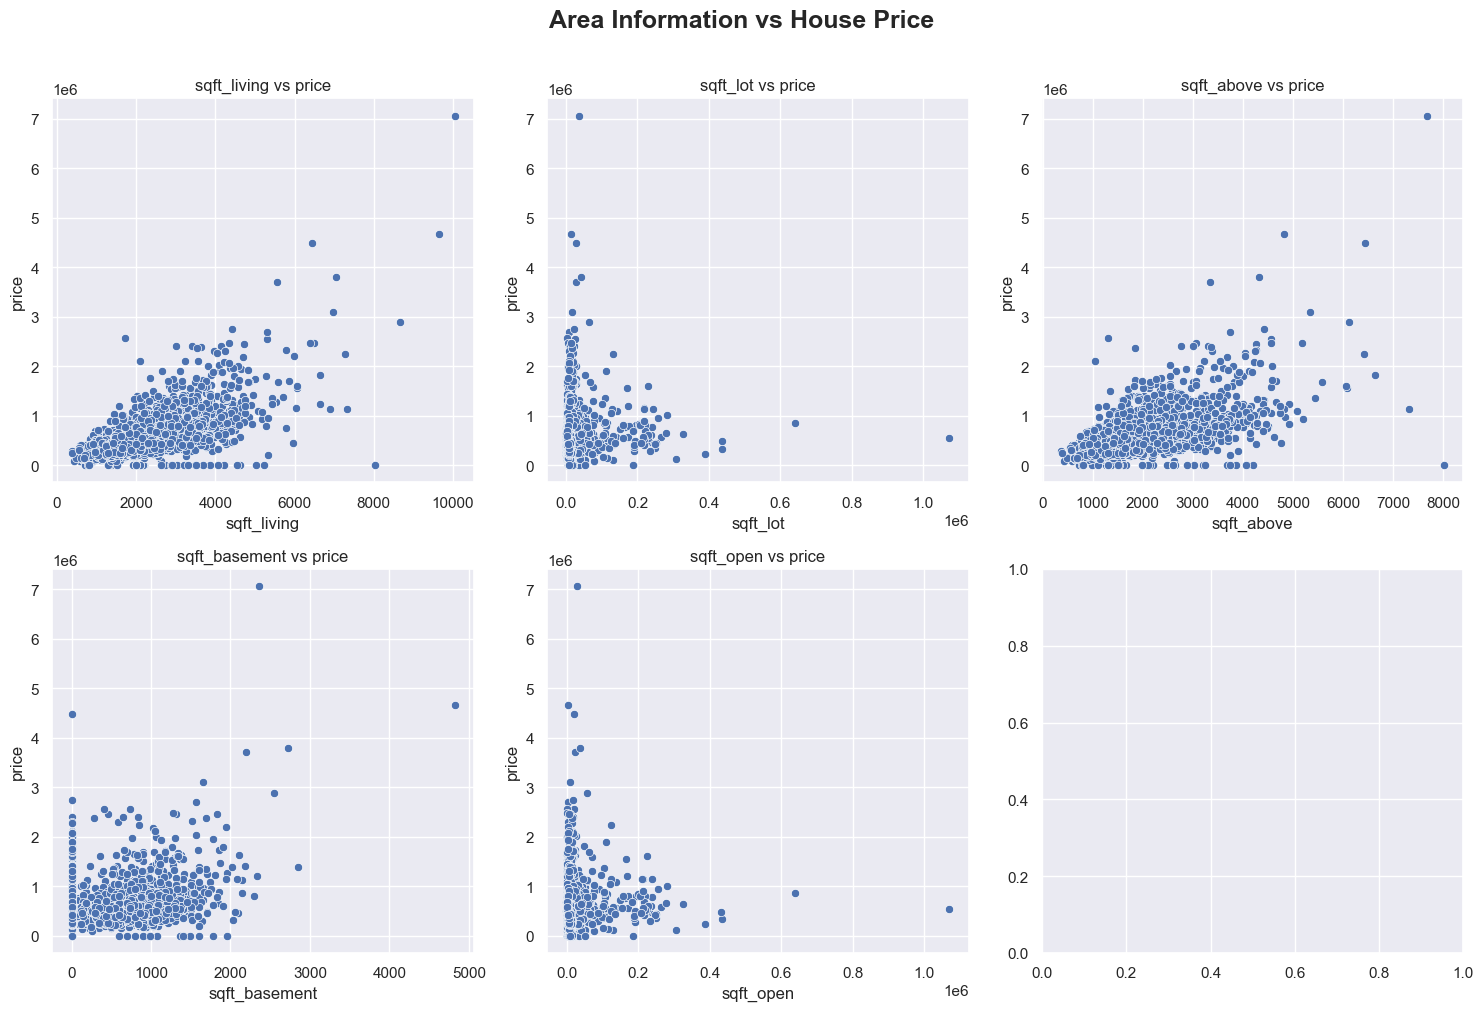

In [131]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(area_information):
    sns.scatterplot(df, x=col, y="price", ax=axes[i])
    axes[i].set_title(f"{col} vs price")

plt.suptitle(
    "Area Information vs House Price",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{correlation_file_path}Area Information vs House Price.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

terdapat banyak sekali anomali atau data unik pada visualisasi diatas, nanti kita telusuri lebih dalam pada bagian **anomaly analysis**!

---

# checkpoint 1

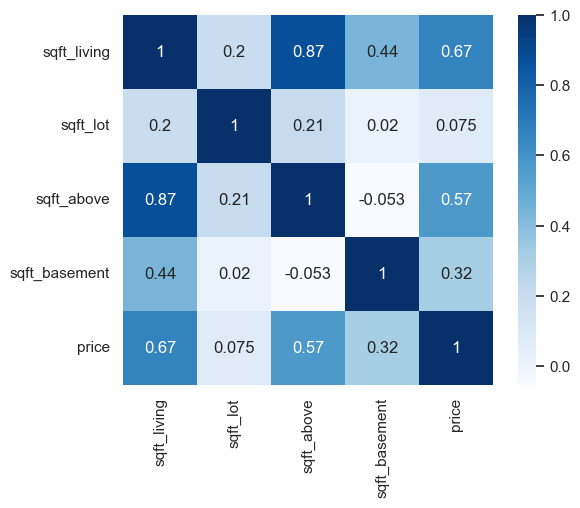

In [132]:
fig, ax = plt.subplots()

sns.heatmap(
    df[["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "price"]].corr(),
    annot=True,
    cmap="Blues",
    square=True,
    ax=ax,
)

fig.savefig(
    f"{correlation_file_path}Area Information Correlation.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insight:
- Terdapat korelasi yang kuat antara variable sqft_living dan sqft_above
- sqft_lot atau luas lahan keseluruhan memiliki hubungan yang sangat lemah terhadap harga rumah
- Terdapat hubungan positif yang kuat antara sqft_living dengan price
- Terdapat hubungan positif sedang antara sqft_above dengan price

*1. sqft_living vs. sqft_above*

In [133]:
fig = px.scatter(df, x="sqft_living", y="sqft_above", title="Living Size vs Above Size")

fig.write_image(f"{correlation_file_path}Living Size vs Above Size.jpg")
fig.show()

terdapat hubungan yang sangat linear, ditandai dengan terbentuknya garis lurus x=y.

In [134]:
df.query("sqft_living == sqft_above")

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
1            4       2.50         2700      9320    2.00           0     0   
2            2       1.00          790      8424    1.00           0     0   
3            3       2.50         1800      2700    2.00           0     0   
4            4       2.50         2340     11784    2.00           0     0   
6            4       2.50         3002      6042    2.00           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
3675         2       1.00          920      6600    1.00           0     0   
3676         3       2.25         1640      7200    2.00           0     0   
3677         4       1.00         1630      2566    1.50           0     0   
3678         4       2.50         2290     11173    2.00           0     0   
3679         4       2.50         2000      5962    2.00           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
1             4        2700              0      1994             0   
2             4         790              0      1953          1983   
3             3        1800              0      2011             0   
4             3        2340              0      1997             0   
6             3        3002              0      2004          2003   
...         ...         ...            ...       ...           ...   
3675          3         920              0      1919          2003   
3676          4        1640              0      1985             0   
3677          3        1630              0      1921          2000   
3678          4        2290              0      1988             0   
3679          3        2000              0      1999             0   

                        street       city  statezip      price price_category  \
1                  1317 5th Ln   Kirkland  WA 98033 837,500.00           High   
2               556 N 167th St  Shoreline  WA 98133 268,500.00     Affordable   
3            2803 SW Bataan St    Seattle  WA 98126 365,000.00       Moderate   
4     24200-24498 144th Ave SE       Kent  WA 98042 330,000.00       Moderate   
6            11619 SE 200th St       Kent  WA 98031 394,500.00       Moderate   
...                        ...        ...       ...        ...            ...   
3675           6321 51st Ave S    Seattle  WA 98118 417,000.00       Moderate   
3676          1755 140th Ct SE   Bellevue  WA 98007 350,000.00       Moderate   
3677        1819-1827 25th Ave    Seattle  WA 98122 581,000.00       Moderate   
3678              133rd Ave SE     Renton  WA 98058 436,500.00       Moderate   
3679            720 N 193rd Pl  Shoreline  WA 98133 415,000.00       Moderate   

      sqft_open  price_per_sqft_lot  basement       era_category  house_age  \
1          6620               89.86         0       Early Modern         21   
2          7634               31.87         0  Post-World War II         62   
3           900              135.19         0             Modern          4   
4          9444               28.00         0       Early Modern         18   
6          3040               65.29         0             Modern         11   
...         ...                 ...       ...                ...        ...   
3675       5680               63.18         0   Pre-World War II         96   
3676       5560               48.61         0       Early Modern         30   
3677        936              226.42         0   Pre-World War II         94   
3678       8883               39.07         0       Early Modern         27   
3679       3962               69.61         0       Early Modern         16   

      renovated  zip_code   lat     lng  
1             0     98033 47.70 -122.21  
2             1     98133 47.76 -122.34  
3             0     98126 47.62 -122.32  
4             0     98042 47.39 -122.21  
6             1     98031 47.39 -122.21  
...         ...       ...   ...     ...  
3675        

ternyata terdapat 2203 rumah yang memiliki luas lahan dan luas lantai atas yang sama persis, atau sekitar 59.86% dari keseluruhan data

Q: Apakah terdapat perbedaan median harga dari rumah yang memiliki luas bangunan dan luas lantai atas yang sama persis dengan yang berbeda?

In [135]:
df.query("sqft_living == sqft_above").describe()["price"].T

count       2,203.00
mean      491,406.32
std       304,265.35
min             0.00
25%       300,000.00
50%       420,000.00
75%       605,000.00
max     4,489,000.00
Name: price, dtype: float64

In [136]:
df.query("sqft_living != sqft_above").describe()["price"].T

count       1,477.00
mean      616,543.62
std       442,597.33
min             0.00
25%       380,000.00
50%       516,200.00
75%       712,000.00
max     7,062,500.00
Name: price, dtype: float64

In [137]:
df["living_above_equal"] = np.where(
    df["sqft_living"] == df["sqft_above"], "equal", "not equal"
)

In [ ]:
fig = px.box(
    df,
    x="price",
    color="living_above_equal",
    title="Price of House with Equal vs. Different Living and Above Sizes",
)

fig.write_image(
    f"{correlation_file_path}Price of House with Equal vs. Different Living and Above Sizes.jpg"
)
fig.show()

Insight:
- Terdapat perbedaan median harga antara rumah dengan luas bangunan dan luas lantai atas yang sama dengan yang berbeda, tanpa mempertimbangkan variable lain

*tanpa mempertimbangkan variable lain

#### **b. Rooms and Floor vs House Price**

In [139]:
rooms

['bathrooms', 'bedrooms', 'floors']

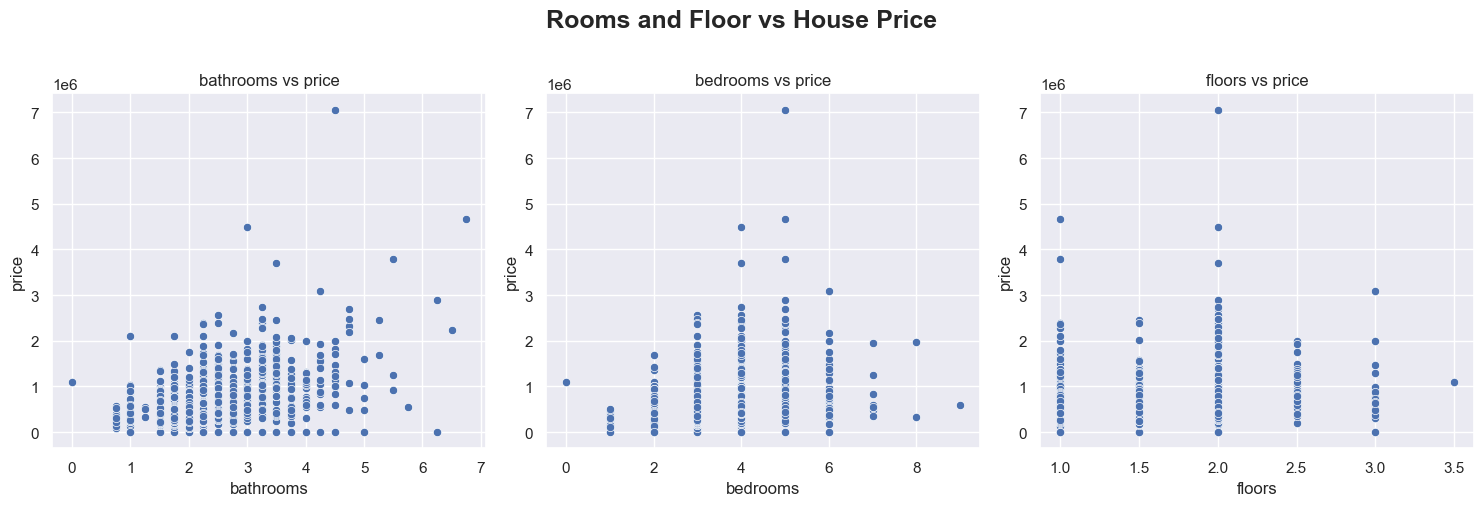

In [214]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

axes = axes.flatten()

for i, col in enumerate(rooms):
    sns.scatterplot(df, x=col, y="price", ax=axes[i])
    axes[i].set_title(f"{col} vs price")

plt.suptitle(
    "Rooms and Floor vs House Price",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{correlation_file_path}Rooms and Floor vs House Price.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

In [141]:
print("Bathrooms : ", spearmanr(df["bathrooms"], df["price"]))
print("Bedrooms : ", spearmanr(df["bedrooms"], df["price"]))
print("Floors : ", spearmanr(df["floors"], df["price"]))

Bathrooms :  SignificanceResult(statistic=np.float64(0.49498544772359343), pvalue=np.float64(9.065403833009933e-227))
Bedrooms :  SignificanceResult(statistic=np.float64(0.3377441702912382), pvalue=np.float64(7.179648079298608e-99))
Floors :  SignificanceResult(statistic=np.float64(0.3330419069991754), pvalue=np.float64(5.019325151943513e-96))


Insight:
- Terdapat hubungan positif antara variable jumlah kamar tidur dan jumlah lantai rumah secara individual dengan variable harga rumah namun dengan hubungan lemah
- Terdapat hubungan positif yang signifikan antara variable jumlah kamar mandi dengan variable harga rumah dengan tingkat hubungan sedang
- Terdapat banyak sekali anomaly dari hasil visualisasi scatter plot antara rooms dan floors vs house price

*tanpa mempertimbangkan variable lain

#### **c. Rooms and Floor vs Living Size**

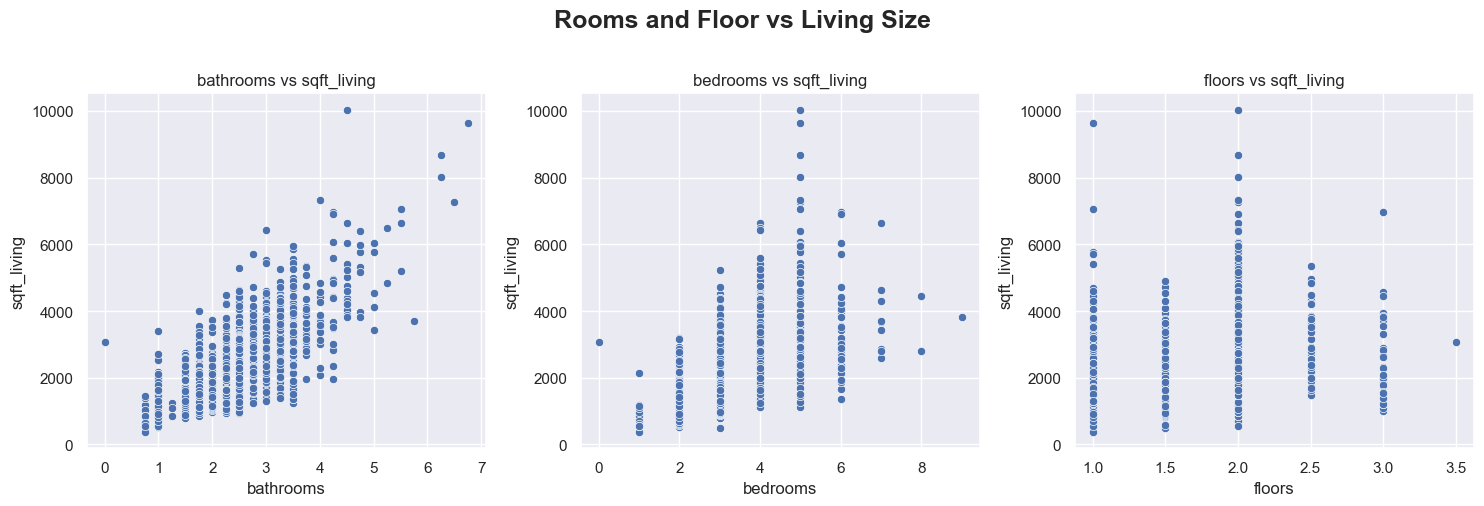

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

axes = axes.flatten()

for i, col in enumerate(rooms):
    sns.scatterplot(df, x=col, y="sqft_living", ax=axes[i])
    axes[i].set_title(f"{col} vs sqft_living")

plt.suptitle(
    "Rooms and Floor vs Living Size",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{correlation_file_path}Rooms and Floor vs Living Size.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

*non-linear*

In [143]:
print("Floors : ", spearmanr(df["floors"], df["sqft_living"]))

Floors :  SignificanceResult(statistic=np.float64(0.40377931555400115), pvalue=np.float64(2.3359623528992193e-144))


Insight:
- Terdapat hubungan positif yang cukup signifikan dengan kekuatan hubungan sedang antara variable floor dengan variable sqft_living, tanpa mempertimbangkan variable lain

*linear*

In [144]:
df[["bathrooms", "bedrooms", "sqft_living"]].corr()

bathrooms  bedrooms  sqft_living
bathrooms         1.00      0.54         0.76
bedrooms          0.54      1.00         0.60
sqft_living       0.76      0.60         1.00

Insight:
- Terdapat hubungan linear positif yang sangat signifikan antara variable bathrooms dan bedrooms secara individual dengan luas bangunan rumah dengan hubungan yang kuat. hal ini berarti semakin banyak jumlah bathrooms dan bedrooms maka akan semakin luas juga bangunan rumah. Tanpa mempertimbangkan variable lain

#### **d. Aesthetic Aspects vs House Price**

In [145]:
aesthetic_aspect

['waterfront', 'view', 'condition']

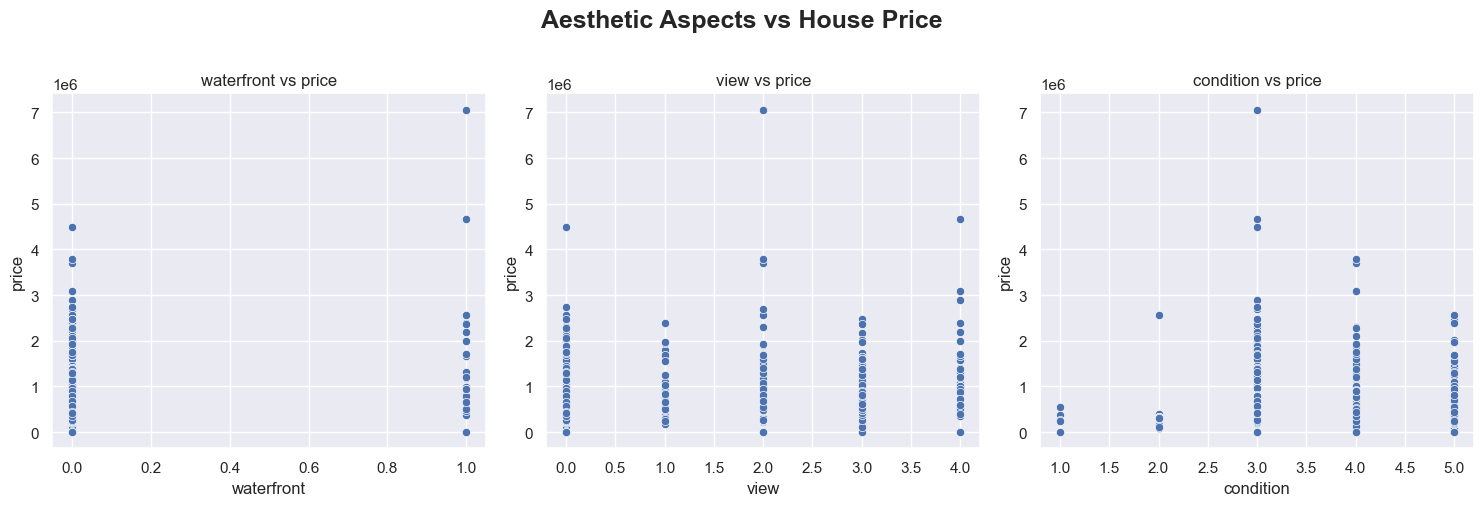

In [215]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

axes = axes.flatten()

for i, col in enumerate(aesthetic_aspect):
    sns.scatterplot(df, x=col, y="price", ax=axes[i])
    axes[i].set_title(f"{col} vs price")

plt.suptitle(
    "Aesthetic Aspects vs House Price",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{correlation_file_path}Aesthetic Aspects vs House Price.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

*binary vs continues correlation*

In [147]:
pointbiserialr(df["waterfront"], df["price"])

SignificanceResult(statistic=np.float64(0.20518682191547002), pvalue=np.float64(2.8232439406646383e-36))

Insight:
- Terdapat hubungan positif dengan kekuatan lemah antara variable waterfront dengan house price, hal ini perlu ditelusuri lebih mendalam lagi karena variable waterfront menunjukan spesifikasi rumah dengan view ke dearah perairan dan hal tersebut merupakan salah satu spesifikasi rumah yang mahal, kira telusuri dibagian **deep dive!**

*non-linear*

In [148]:
print("View : ", spearmanr(df["view"], df["price"]))
print("Condition : ", spearmanr(df["condition"], df["price"]))

View :  SignificanceResult(statistic=np.float64(0.25856254912701143), pvalue=np.float64(2.76511221466299e-57))
Condition :  SignificanceResult(statistic=np.float64(0.017754650956187612), pvalue=np.float64(0.28158329124374776))


#### **e. House Age**

*1. vs House Price*

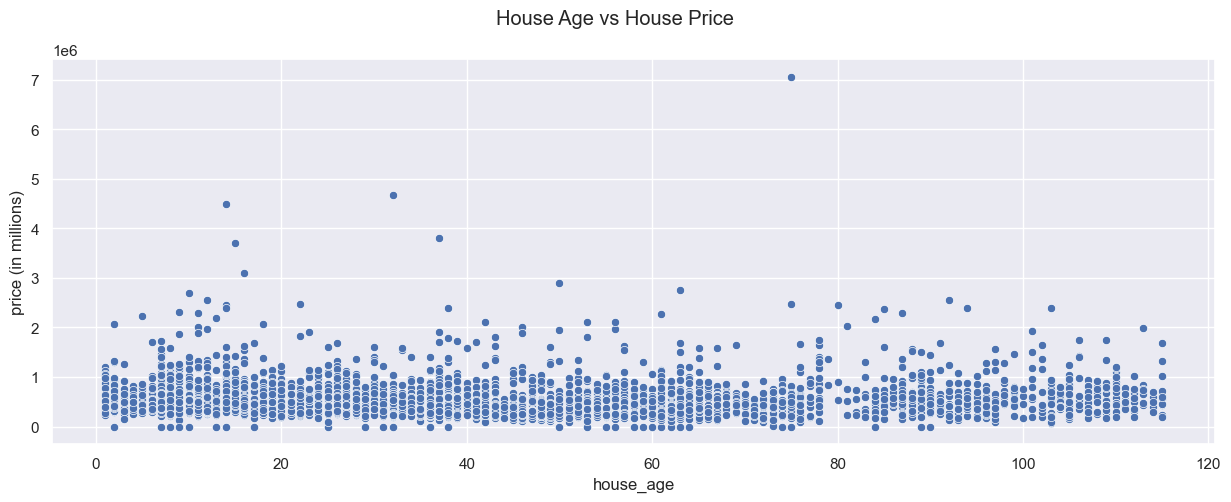

In [216]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.scatterplot(df, x="house_age", y="price")
ax.set_ylabel("price (in millions)")
plt.suptitle("House Age vs House Price")

fig.savefig(
    f"{correlation_file_path}House Age vs House Price.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

*2. vs Sqft_living*

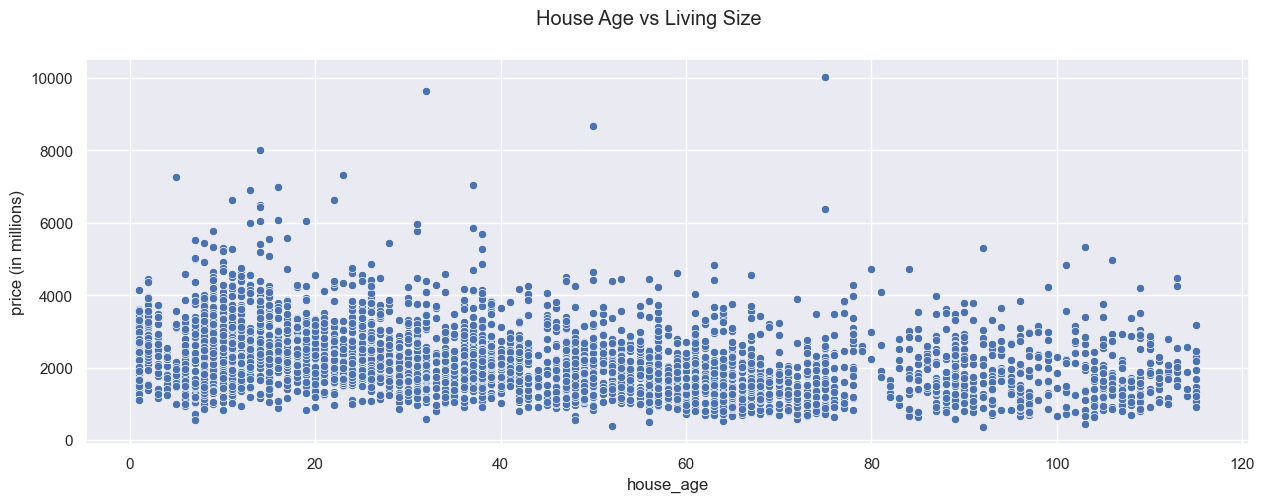

In [217]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.scatterplot(df, x="house_age", y="sqft_living")
ax.set_ylabel("price (in millions)")
plt.suptitle("House Age vs Living Size")

fig.savefig(
    f"{correlation_file_path}House Age vs Living Size.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insingt:
- Apabila dilihat secara individual variable house_age belum terdapat hubungan yang signifikan dengan variable price dan sqft_living

### 2.3.3. Deep Dive

In [218]:
target_directory = os.path.join("..", "reports", "figures", "deep dive")

os.makedirs(target_directory, exist_ok=True)

print(f"Folder created at: {os.path.abspath(target_directory)}")

Folder created at: b:\Project\regression\house-price-prediction\reports\figures\deep dive


In [219]:
deep_dive_file_path = "../reports/figures/deep dive/"

#### **a. Strong Correlation Between Rooms and Living Size**

Mengacu pada insight yang didapat dari sub sub bab 2.3.2. Correlation Analysis point b. Terdapat hubungan yang kuat antara variable bathrooms dan bedrooms secara individual dengan variable sqft_living. Mari telusuri lebih dalam lagi!

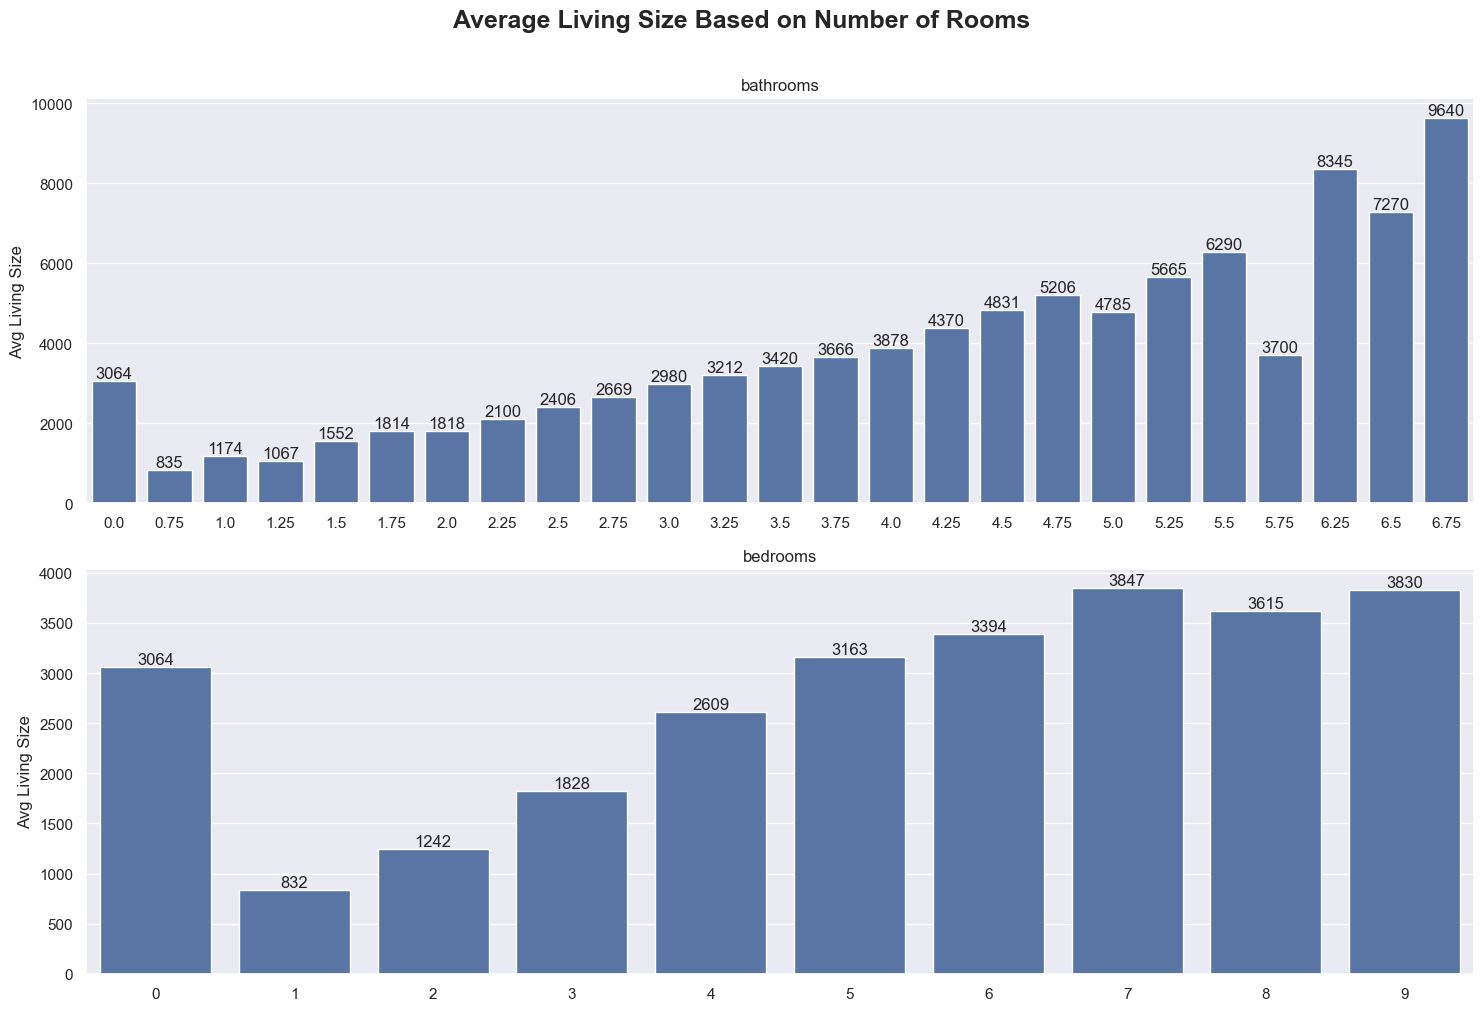

In [220]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

axes = axes.flatten()

for i, feature in enumerate(["bathrooms", "bedrooms"]):
    sns.barplot(
        df,
        x=feature,
        y="sqft_living",
        ax=axes[i],
        errorbar=None,
        estimator="mean",
    )
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt="{:.0f}")
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Avg Living Size")

plt.suptitle(
    "Average Living Size Based on Number of Rooms",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{deep_dive_file_path}Average Living Size Based on Number of Rooms.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insight:
- Rumah yang tidak memiliki kamar mandi memiliki rata-rata luas bangunan yang lebih luas dibandingkan dengan rumah yang memiliki 3 kamar mandi dengan fasilitas lengkap. Apa yang menyebabkan hal tersebut?
- Rumah yang tidak punya kamar tidur memiliki rata-rata luas bangunan yang lebih luas dibandingkan dengan rumah dengan 4 kamar tidur. dan lagi apa yang menyebabkan hal tersebut bisa terjadi?
- Rata-rata luas bangunan rumah dengan jumlah kamar mandi 5.75 (5 km dengan fasilitas lengkap dan 1 km dengan 3 fasilitas) hampir setara dengan rumah yang hanya memiliki 3.75 kamar mandi.

*tanpa mempertimbangkan variable lain

Next step mari coba pertimbngkan variable lain!

*1. Investigae House Without Bathrooms or Bedrooms*

Mengacu pada sub sub bab 2.3.1. Varibale Distribution point c. Hanya terdapat masing-masing satu rumah yang tidak mempunyai kamar mandi atau kamar tidur

In [152]:
df.query("bedrooms == 0")

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
1991         0       0.00         3064      4764    3.50           0     2   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
1991          3        3064              0      1990          2009   

             street     city  statezip        price price_category  sqft_open  \
1991  814 E Howe St  Seattle  WA 98102 1,095,000.00         Luxury       1700   

      price_per_sqft_lot  basement  era_category  house_age  renovated  \
1991              229.85         0  Early Modern         25          1   

      zip_code   lat     lng living_above_equal  
1991     98102 47.62 -122.32              equal

In [153]:
df.query("bathrooms == 0")

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
1991         0       0.00         3064      4764    3.50           0     2   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
1991          3        3064              0      1990          2009   

             street     city  statezip        price price_category  sqft_open  \
1991  814 E Howe St  Seattle  WA 98102 1,095,000.00         Luxury       1700   

      price_per_sqft_lot  basement  era_category  house_age  renovated  \
1991              229.85         0  Early Modern         25          1   

      zip_code   lat     lng living_above_equal  
1991     98102 47.62 -122.32              equal

Insight:
- Ternyata rumah yang tidak memiliki kamar mandi dan tidak memiliki kamar tidur adalah **satu rumah yang sama**, rumah tersebut memiliki 3.5 lantai, dengan luas bangunan dan luas lantai atas sama. rumah tersebut berlokasi di pusat Washington state yaitu kota Seattle. Rumah ini memiliki harga yang sangat mahal dan termasuk kedalam kategori harga luxury house. Kemungkinan besar rumah tersebut dikhususkan untuk peluang industri usaha. Dengan tidak adanya kamar mandi dan kamar tidur mempermudah calon pembeli dalam menyusun skema ruangan atau customable house.
- Sehingga dari insight pertama luas bangunan rata-rata rumah tersebut adalah luas bangunan rumah itu sendiri, jika dibandingkan dengan rata-rata luas bangunan lain dengan jumlah kamar mandi dan kamar tidur tertentu tentu saja akan jauh lebih tinggi karena pengaruh dari spesifikasi rumah luxury.

*2. Investiigate house with 5.75 bathrooms less space than house with other bathrooms size*

In [154]:
df.query("bathrooms == 5.75")

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
3358         7       5.75         3700      7647    2.00           0     1   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
3358          3        3700              0      1948          1984   

                       street              city  statezip      price  \
3358  15007-15299 37th Ave NE  Lake Forest Park  WA 98155 540,000.00   

     price_category  sqft_open  price_per_sqft_lot  basement  \
3358       Moderate       3947               70.62         0   

           era_category  house_age  renovated  zip_code   lat     lng  \
3358  Post-World War II         67          1     98155 47.76 -122.29   

     living_above_equal  
3358              equal

Insight:
- Mengacu pada sub sub bab 2.3.1. Variable Distribution point c. Hanya ada satu rumah yang memiliki jumlah bathrooms 5.75 sehingga nilai rata-rata luas bangunan dari rumah tersebut adalah nilai sebenarnya dari luas bangunan rumah. Rumah tersebut termasuk kedalam rumah tipe moderate atau dengan harga 300 ribu hingga 600 ribu. Mengacu pada insight yang didapat dari 2.3.2. Correlation Analysis point a. harga rumah berkorelasi kuat dengan sqft_living sehingga jika harga rumah moderate maka luas dari bangunan rumah tersebut juga akan sedang menyesuaikan dengan harga.
- Jika dibandingkan dengan rumah dengan jumlah kamar mandi lainnya rumah tersebut akan cenderung lebih rendah. Karena pengaruh dari harga

#### **b. Let's go back to the past**

Pada bagian ini kami akan berusaha mengeksplorasi variable year information vs. semua variable

In [155]:
area_information

['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_open']

*1. Year vs. area info and price*

In [156]:
average_house_price_by_year = (
    df.groupby("yr_built")["price"]
    .mean()
    .to_frame()
    .rename(columns={"price": "avg_price"})
    .reset_index()
)
average_house_price_by_year

yr_built  avg_price
0        1900 646,031.25
1        1901 491,179.00
2        1902 821,531.25
3        1903 548,137.50
4        1904 501,933.33
..        ...        ...
110      2010 610,608.65
111      2011 453,530.00
112      2012 520,874.49
113      2013 646,239.26
114      2014 601,727.66

[115 rows x 2 columns]

In [157]:
house_price_mean = df["price"].mean()
house_price_mean

np.float64(541631.2608466502)

In [158]:
print("Top 5 Lowest Average Price by Year ")
average_house_price_by_year.sort_values(by="avg_price").head(5).reset_index(drop=True)

Top 5 Lowest Average Price by Year 


yr_built  avg_price
0      1971 341,463.52
1      1943 347,948.64
2      1944 351,663.43
3      1942 352,232.50
4      1957 374,530.25

Insight:
- Top 5 average lowest average price didominasi oleh rumah dengan gaya arsitektur setelah perang

In [159]:
print("Top 5 Highest Average Price by Year")
average_house_price_by_year.sort_values(by="avg_price", ascending=False).head(
    5
).reset_index(drop=True)

Top 5 Highest Average Price by Year


yr_built    avg_price
0      1935 1,296,166.67
1      1936 1,105,000.00
2      1937   927,218.75
3      1934   881,750.00
4      1914   864,360.00

Insight:
- top 5 highest average price semuanya bertipe rumah dengan gaya arsitektur era sebelum perang

In [ ]:
fig = px.line(
    average_house_price_by_year,
    x="yr_built",
    y="avg_price",
    title="Average House Price by Year Built",
    markers=True,
)

fig.update_traces(line_color="black")

fig.add_vrect(
    x0=1900,
    x1=1939,
    line_width=0,
    fillcolor="#001F3F",
    opacity=0.2,
    annotation_text="Pre-World War II",
    annotation_position="top left",
    annotation_font_color="grey",
)
fig.add_vrect(
    x0=1940,
    x1=1969,
    line_width=0,
    fillcolor="#3A6D8C",
    opacity=0.2,
    annotation_text="Pasca-World War II",
    annotation_position="top left",
    annotation_font_color="grey",
)
fig.add_vrect(
    x0=1970,
    x1=1999,
    line_width=0,
    fillcolor="#6A9AB0",
    opacity=0.2,
    annotation_text="Early Modern",
    annotation_position="top left",
    annotation_font_color="grey",
)

fig.add_vrect(
    x0=2000,
    x1=2014,
    line_width=0,
    fillcolor="#EAD8B1",
    opacity=0.5,
    annotation_text="Modern",
    annotation_position="top left",
    annotation_font_color="grey",
)

fig.add_hline(
    y=house_price_mean,
    line_width=1,
    line_dash="dash",
    line_color="grey",
    annotation_text="average",
    annotation_position="bottom right",
    annotation_font_color="grey",
)

fig.write_image(
    f"{deep_dive_file_path}Average House Price by Year Built.jpg", width=1200
)

fig.show()

Insight:
- Rumah dengan gaya arsitektur klasik (pra-world war II) memiliki banyak harga rata-rata per tahun diatas harga rata-rata keseluruhan
- Sebaliknya, pada rumah dengan gaya arsitektur masal (pasca-world war II) memiliki rata-rata per tahun cenderung berada dibawah rata-rata keseluruhan
- Terdapat anomaly pada rata-rata harga rumah tahun 1935 dan 1936 kita telusuri pada bagian **Anomaly Analysis!**

*2. era category vs. area info and price*

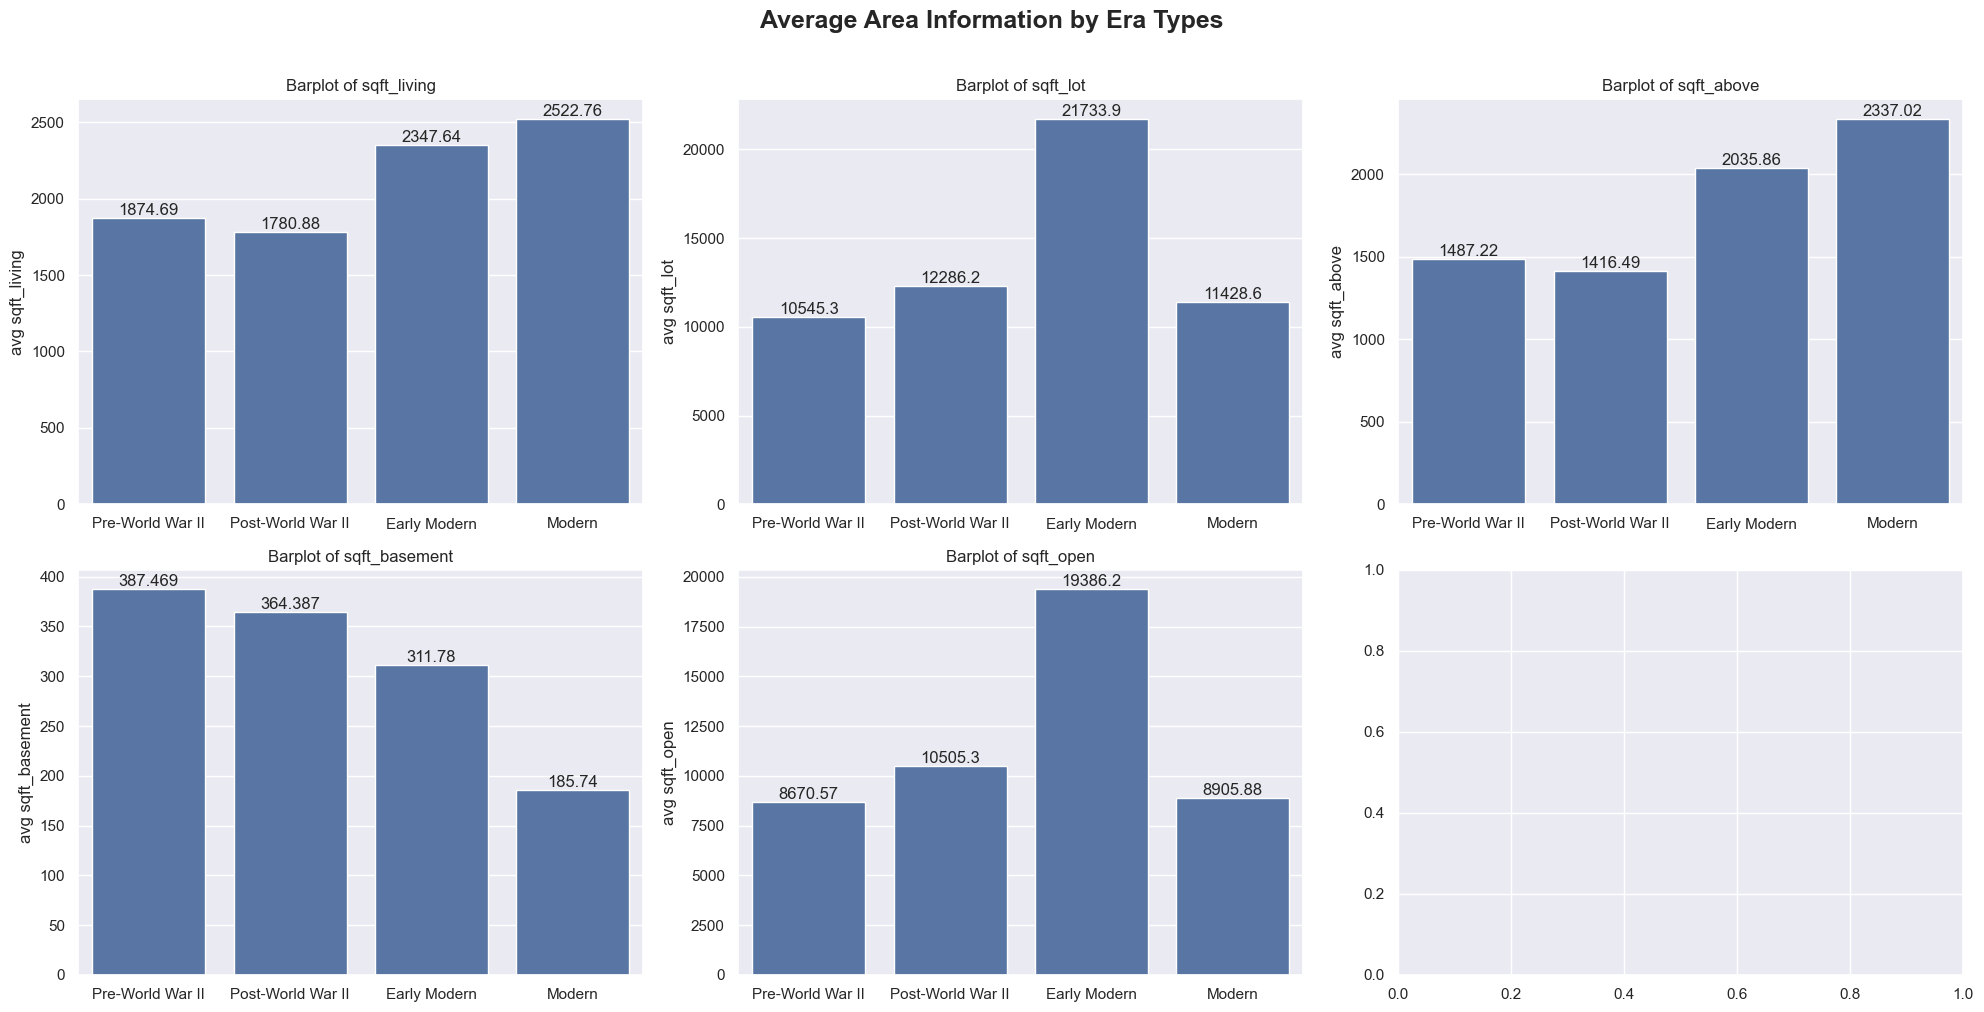

In [228]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, feature in enumerate(area_information):
    sns.barplot(
        df, x="era_category", y=feature, ax=axes[i], errorbar=None, estimator="mean"
    )
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_title(f"Barplot of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(f"avg {feature}")

plt.suptitle(
    "Average Area Information by Era Types",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{deep_dive_file_path}Average Area Information by Era Types.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insight:
- Terdapat tren kenaikan pada rata-rata luas bangunan dari era perang dunia 2 sampai era modern
- Terdapat tren penurunan rata-rata luas basement dari era sebelum perang dunia 2 hingga era modern. Kemungkinan besar hal tersebut dikarenakan saat era perang rumah dengan basement memiliki fungsi sebagi shelter atau tempat persembunyian

*tanpa mempertimbangkan faktor lain

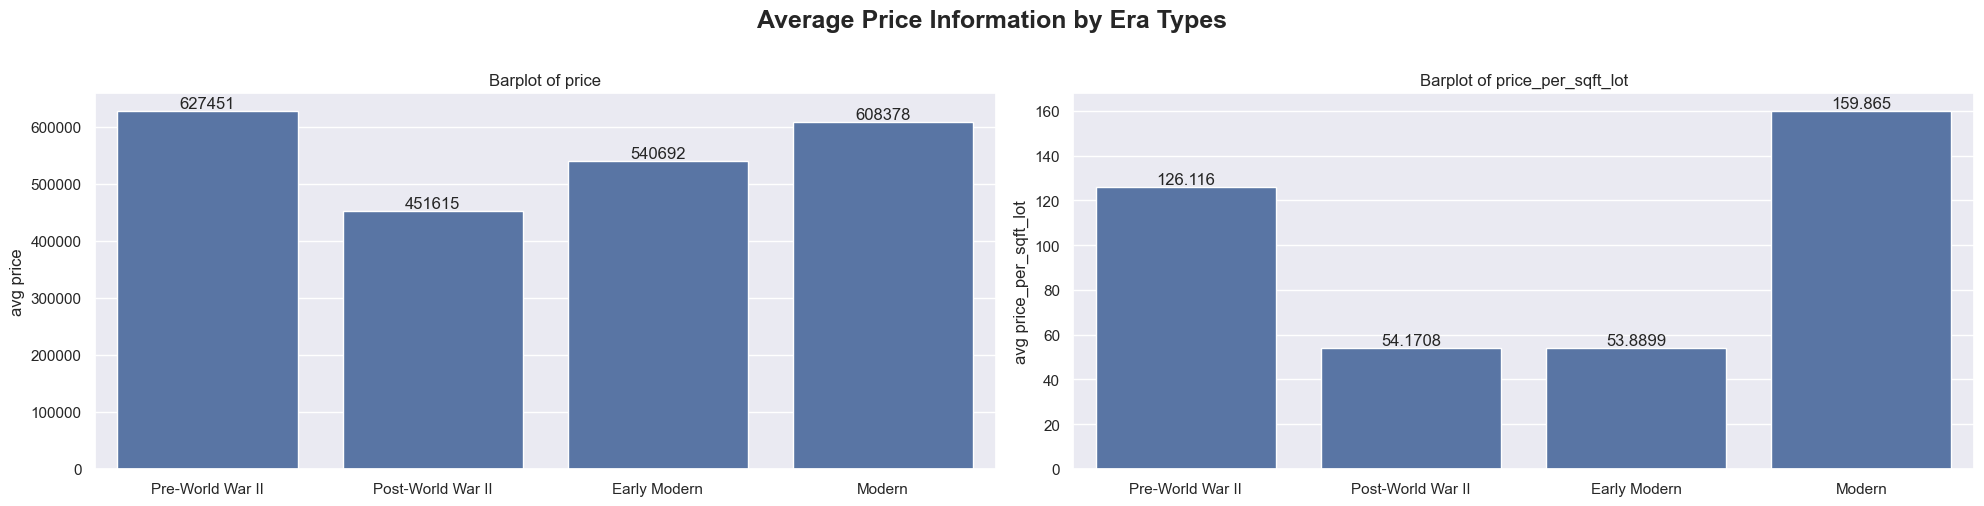

In [229]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

axes = axes.flatten()

for i, feature in enumerate(["price", "price_per_sqft_lot"]):
    sns.barplot(
        df, x="era_category", y=feature, ax=axes[i], errorbar=None, estimator="mean"
    )
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_title(f"Barplot of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(f"avg {feature}")

plt.suptitle(
    "Average Price Information by Era Types",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{deep_dive_file_path}Average Price Information by Era Types.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insight:
- Terdapat tren kenaikan rata-rata harga rumah dari era setelah perang dunia kedua hingga modern
- Rata-rata harga rumah era sebelum perang lebih tinggi dibandingkan dengan rata-rata harga rumah era lain. Apa yang menyebabkan hal tersebut?
- Rata-rata harga rumah era setelah perang paling rendah diantara era lain hal ini dikarenakan rumah yang dibangun setelah perang menggunakan konstruksi masal. Sehingga gaya arsitekturnya cenderung sama. Efek pasca perang juga akan berdampak pada kualitas bahan bangunan yang digunakan.

*tanpa mempertimangkan faktor lain

Q: Apakah rumah dengan basement memiliki rata-rata harga lebih tinggi dibandingkan dengan rumah tanpa basement?

In [ ]:
fig = px.histogram(
    df,
    x="basement",
    y="price",
    histfunc="avg",
    text_auto=True,
    title="Average House Price With and Without Basement",
)

fig.write_image(
    f"{deep_dive_file_path}Average House Price With and Without Basement.jpg"
)

fig.show()

- Benar rumah yang memiliki basement mempunyai rata-rata harga yang lebih tinggi dibandingkan dengan rumah yang tidak punya basemenet

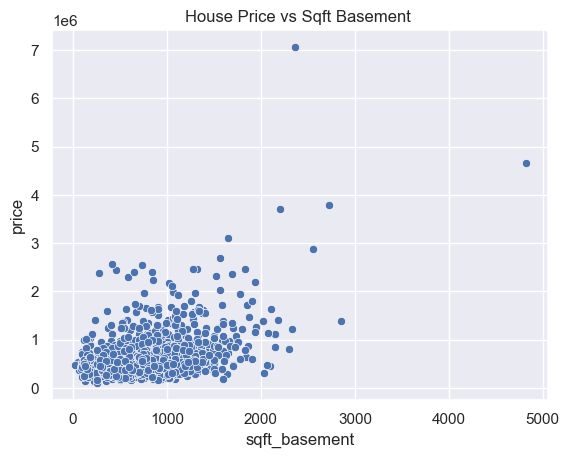

In [233]:
g = sns.scatterplot(
    df.query("basement == 1 and price != 0"), x="sqft_basement", y="price"
)
g.set_title("House Price vs Sqft Basement ");

In [165]:
df.query("basement == 1 and price != 0")[["sqft_basement", "price"]].corr()

sqft_basement  price
sqft_basement           1.00   0.44
price                   0.44   1.00

- Terdapat korelasi positif sedang antara luas basemenet dengan harga rumah, setiap kenaikan luas basement ada kenaikan "sedang" dari harga rumah. sehingga dari sini dapat disimpulkan dengan mempeetimbangkan luas basement dan harga, rumah pada era sebelum perang memiliki harga yang cukup tinggi dikarenakan luas basementnya yang cenderung tinggi juga

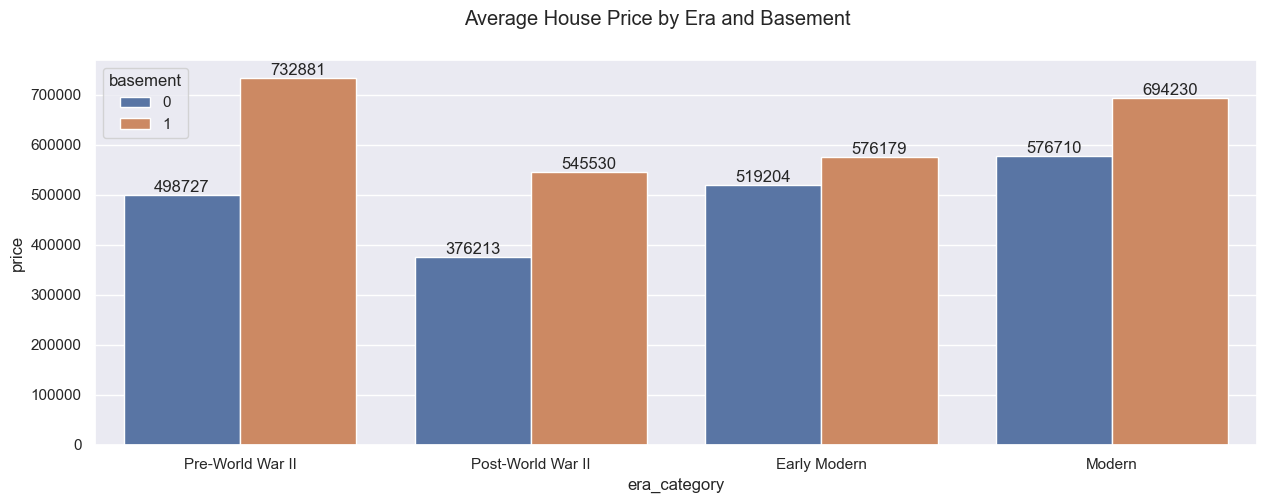

In [234]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(
    df,
    x="era_category",
    y="price",
    hue="basement",
    ax=ax,
    errorbar=None,
    estimator="mean",
)
for container in ax.containers:
    ax.bar_label(container)
plt.suptitle("Average House Price by Era and Basement")

fig.savefig(
    f"{deep_dive_file_path}Average House Price by Era and Basement.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

*mempertimbangkan renovated*

In [236]:
fig = px.histogram(
    df,
    x="renovated",
    y="price",
    histfunc="avg",
    text_auto=True,
    title="Average House Price by Renovated",
)

fig.write_image(f"{deep_dive_file_path}Average House Price by Renovated.jpg")

fig.show()

- rumah yang tidak direnovasi memiliki rata-rata yang sedikit lebih tinggi dibandingkan dengan rumah yang direnovasi

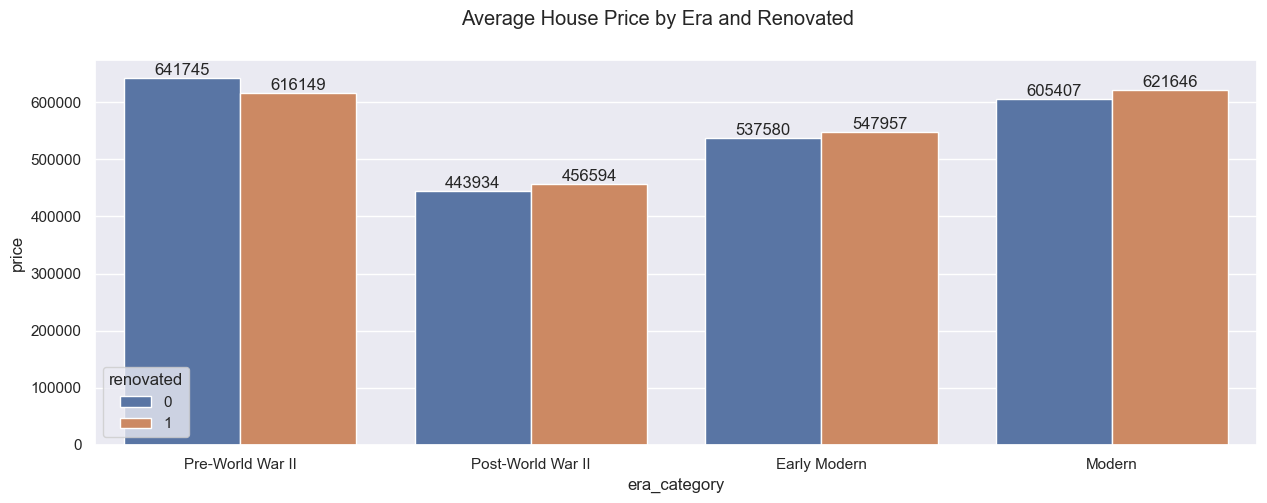

In [237]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(
    df,
    x="era_category",
    y="price",
    hue="renovated",
    ax=ax,
    errorbar=None,
    estimator="mean",
)
for container in ax.containers:
    ax.bar_label(container)
plt.suptitle("Average House Price by Era and Renovated")

fig.savefig(
    f"{deep_dive_file_path}Average House Price by Era and Renovated.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insight dengan mempertimbangkan variable renovated dan basemenet:
- Kesimpulan harga rata-rata rumah era pre-world war II yang tidak direnovasi dan/atau memiliki basement cenderung lebih tinggi dibandingkan dengan rumah yang sudah direnovasi dan tidak memiliki basement. kemungkinan karena gaya arsitektur klasik yang masih dipertahankan dan basement sebagai ruang tambahan sehingga meninigkatkan harga rumah

#### **c. Let's take a walk around city**

Pada bagian ini kami akan menelusuri lebih dalam sebaran harga dan informasi area terhadap city menggunakan interactive gespatial visualization

In [169]:
avg_price_by_city = (
    df.groupby(["city", "lat", "lng"])["price"]
    .agg("mean")
    .to_frame()
    .rename(columns={"price": "avg_price"})
    .reset_index()
)
med_price_by_city = (
    df.groupby(["city", "lat", "lng"])["price"]
    .agg("median")
    .to_frame()
    .rename(columns={"price": "med_price"})
    .reset_index()
)

In [170]:
avg_price_by_city.head()

city   lat     lng  avg_price
0         Algona 47.28 -122.25 246,000.00
1         Auburn 47.30 -122.21 304,862.40
2       Bellevue 47.60 -122.15 858,676.06
3  Black Diamond 47.31 -122.02 382,056.25
4        Bothell 47.77 -122.20 484,225.30

In [239]:
fig = px.scatter_map(
    avg_price_by_city,
    lat="lat",
    lon="lng",
    size="avg_price",
    color="avg_price",
    center={"lat": 47.54, "lon": -122.05},
    zoom=7,
    hover_name="city",
    title="Average House Price by City",
)

fig.write_image(f"{deep_dive_file_path}Average House Price by City.jpg", width=1200)

fig.show()

In [240]:
fig = px.scatter_map(
    med_price_by_city,
    lat="lat",
    lon="lng",
    size="med_price",
    color="med_price",
    center={"lat": 47.54, "lon": -122.05},
    zoom=7,
    hover_name="city",
    title="Median House Price by City",
)

fig.write_image(f"{deep_dive_file_path}Median House Price by City.jpg", width=1200)

fig.show()

Insight:
- Top 3 Rata-rata harga rumah tertinggi ada pada Medina, Yarrow Point, dan Clyde Hill

In [173]:
average_sqft_living_by_city = (
    df.groupby(["city", "lat", "lng"])[["sqft_living", "price_per_sqft_lot"]]
    .mean()
    .reset_index()
)

In [241]:
fig = px.scatter_map(
    average_sqft_living_by_city,
    lat="lat",
    lon="lng",
    color="sqft_living",
    center={"lat": 47.54, "lon": -122.05},
    zoom=7,
    size="sqft_living",
    hover_name="city",
    title="Average Living Size by City",
)

fig.write_image(f"{deep_dive_file_path}Average Living Size by City.jpg", width=1200)

fig.show()

Insight:
- Rata-rata luas bangunan cenderung bervariasi, namun kota Medina dan Clyde Hill masih menempati Top 2, hal ini sesuai dengan korelasi positif kuat antara harga dengan luas bangunan

In [ ]:
fig = px.scatter_map(
    average_sqft_living_by_city,
    lat="lat",
    lon="lng",
    color="price_per_sqft_lot",
    center={"lat": 47.54, "lon": -122.05},
    zoom=7,
    size="price_per_sqft_lot",
    hover_name="city",
    title="Average Price per Sqft Lot by City",
)

fig.write_image(
    f"{deep_dive_file_path}Average Price per Sqft Lot by City.jpg", width=1200
)

fig.show()

Insight:
- Pusat kota Seattle walaupun tidak memiliki rata-rata harga rumah dan rata-rata luas bangunan yang tinggi, namun kota seattle memiliki rata-rata harga tanah per kavling paling tinggi diantara kota-kota lainnya.

#### **d. Are aesthetic aspects important?**

Pada bagian deep dive point d kami akan berusaha meenggali apakah variable aesthetic aspects seperti waterfront, view, dan condition dari rumah penting atau tidak

*1. waterfront*

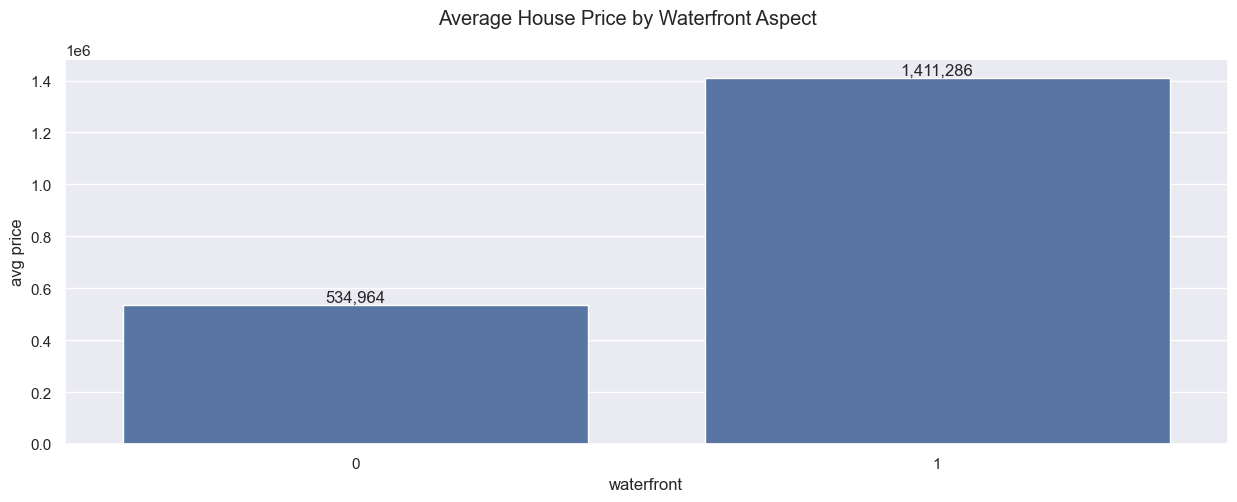

In [243]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(
    df,
    x="waterfront",
    y="price",
    ax=ax,
    errorbar=None,
    estimator="mean",
)
ax.set_ylabel("avg price")
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}")
plt.suptitle("Average House Price by Waterfront Aspect")


fig.savefig(
    f"{deep_dive_file_path}Average House Price by Waterfront Aspect.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

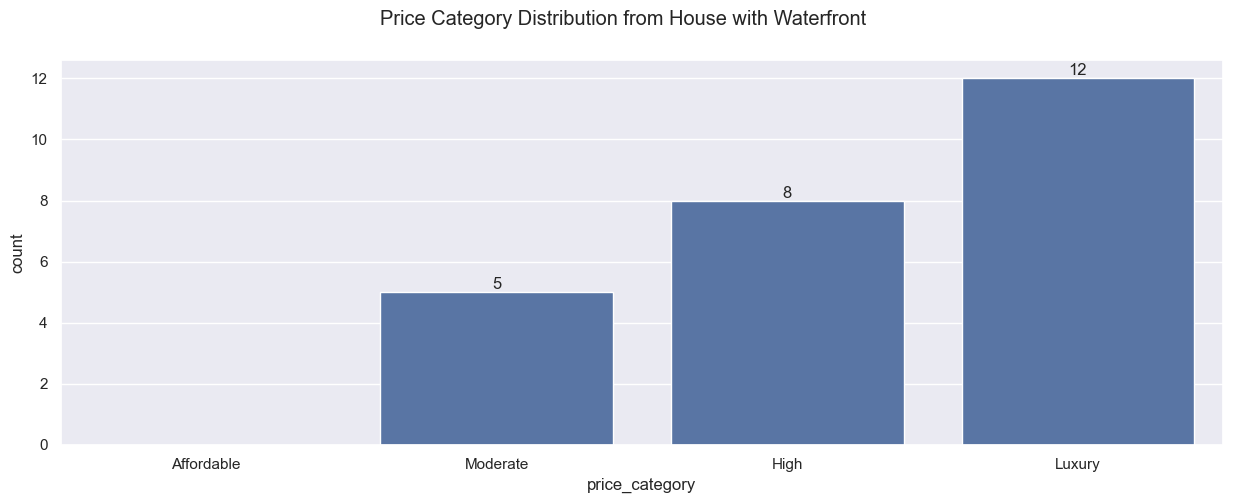

In [244]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(df.query("waterfront == 1"), x="price_category", ax=ax)
ax.set_ylabel("count")
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}")
plt.suptitle("Price Category Distribution from House with Waterfront")

fig.savefig(
    f"{deep_dive_file_path}Price Category Distribution from House with Waterfront.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

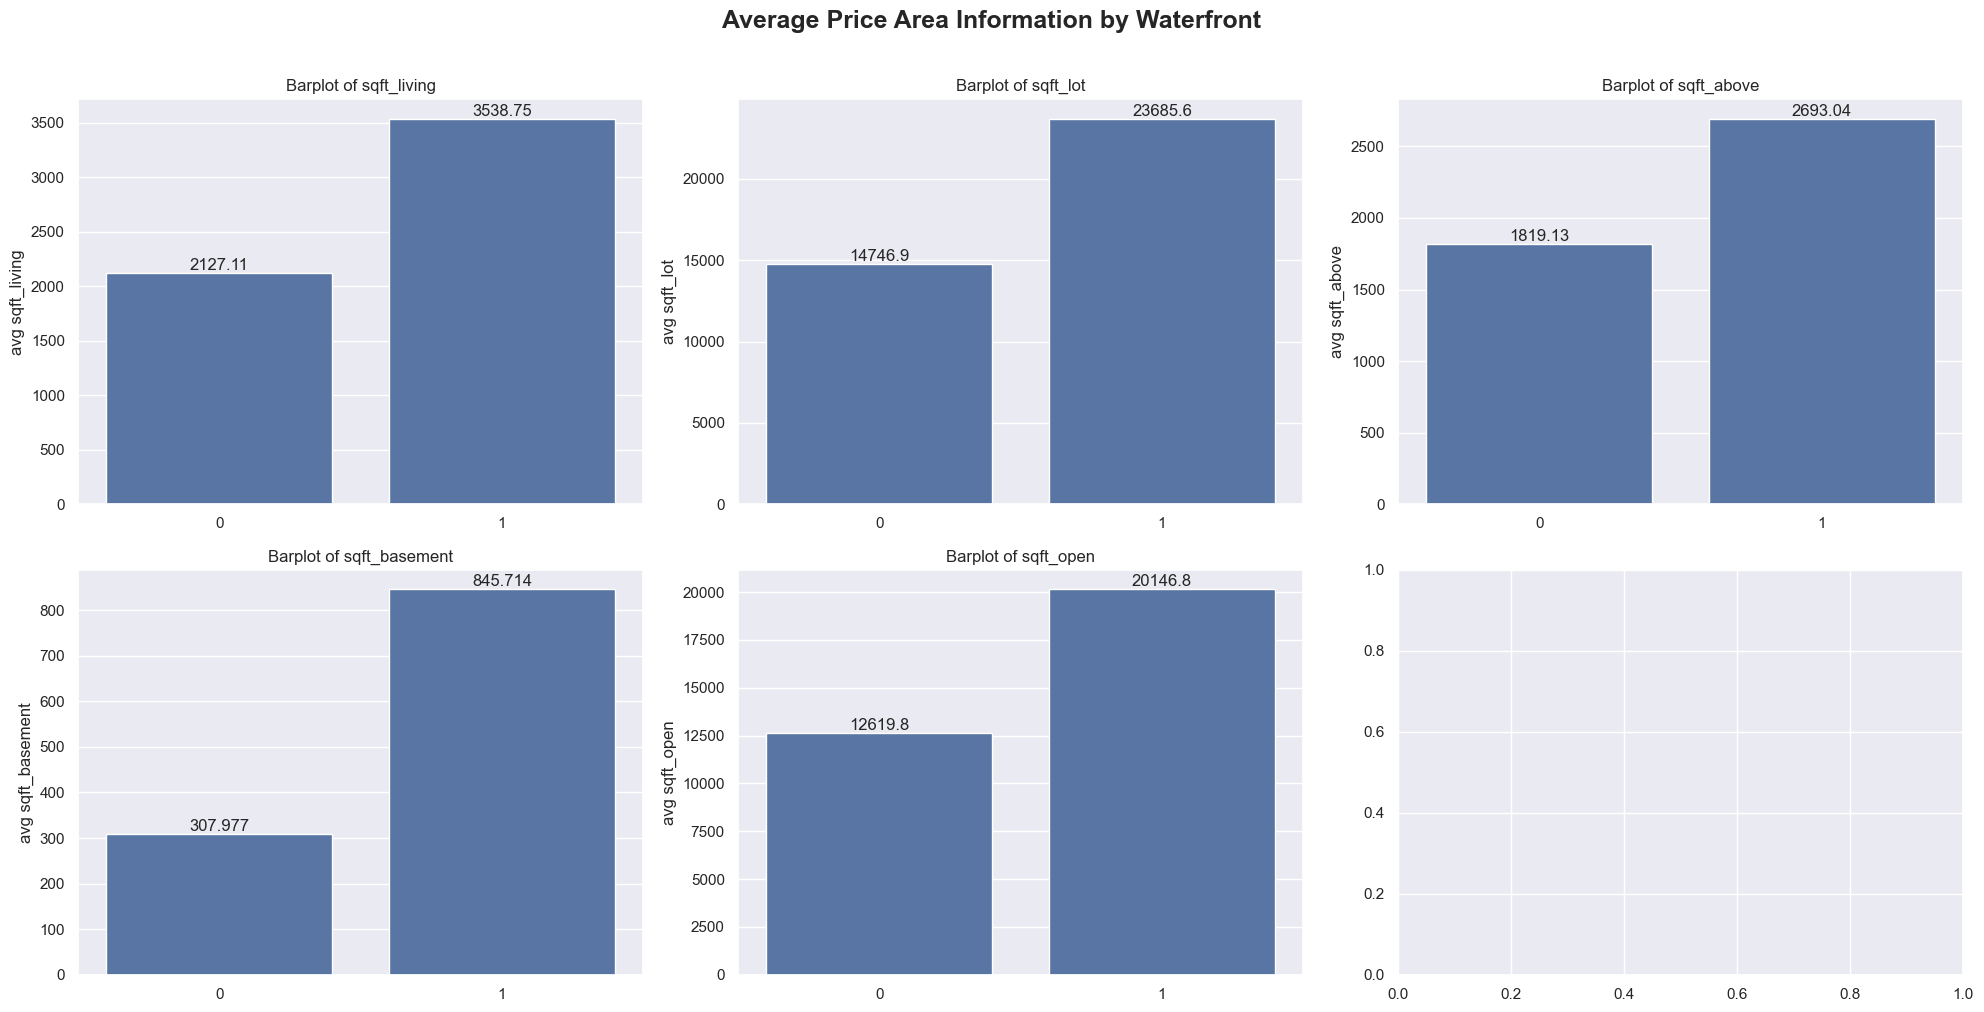

In [245]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, feature in enumerate(area_information):
    sns.barplot(
        df, x="waterfront", y=feature, ax=axes[i], errorbar=None, estimator="mean"
    )
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_title(f"Barplot of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(f"avg {feature}")

plt.suptitle(
    "Average Price Area Information by Waterfront",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{deep_dive_file_path}Average Price Area Information by Waterfront.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insight:
- Dilihat dari dua variable harga rumah dan informasi area rumah yang dekat dengan area perairan cenderung memiliki nilai yang lebih tinggi baik itu harga rumah maupun luas tanah dibandingkan dengan rumah yang tidak dekat dengan area perairan
- Kategori harga rumah yang dekat dengan area perairan adalah moderate keatas

*2. View*

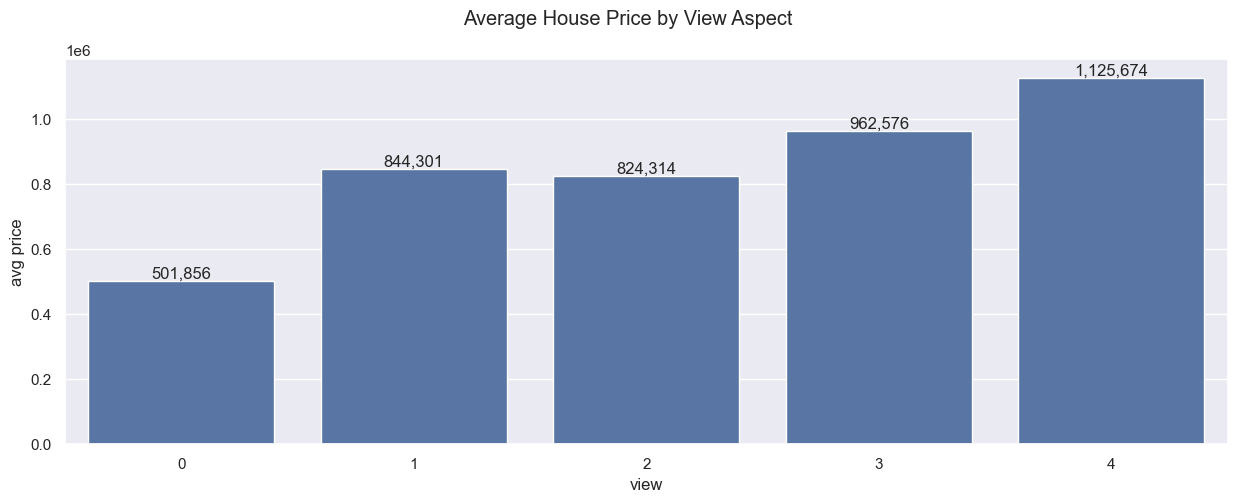

In [246]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(
    df,
    x="view",
    y="price",
    ax=ax,
    errorbar=None,
    estimator="mean",
)
ax.set_ylabel("avg price")
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}")
plt.suptitle("Average House Price by View Aspect")

fig.savefig(
    f"{deep_dive_file_path}Average House Price by View Aspect.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

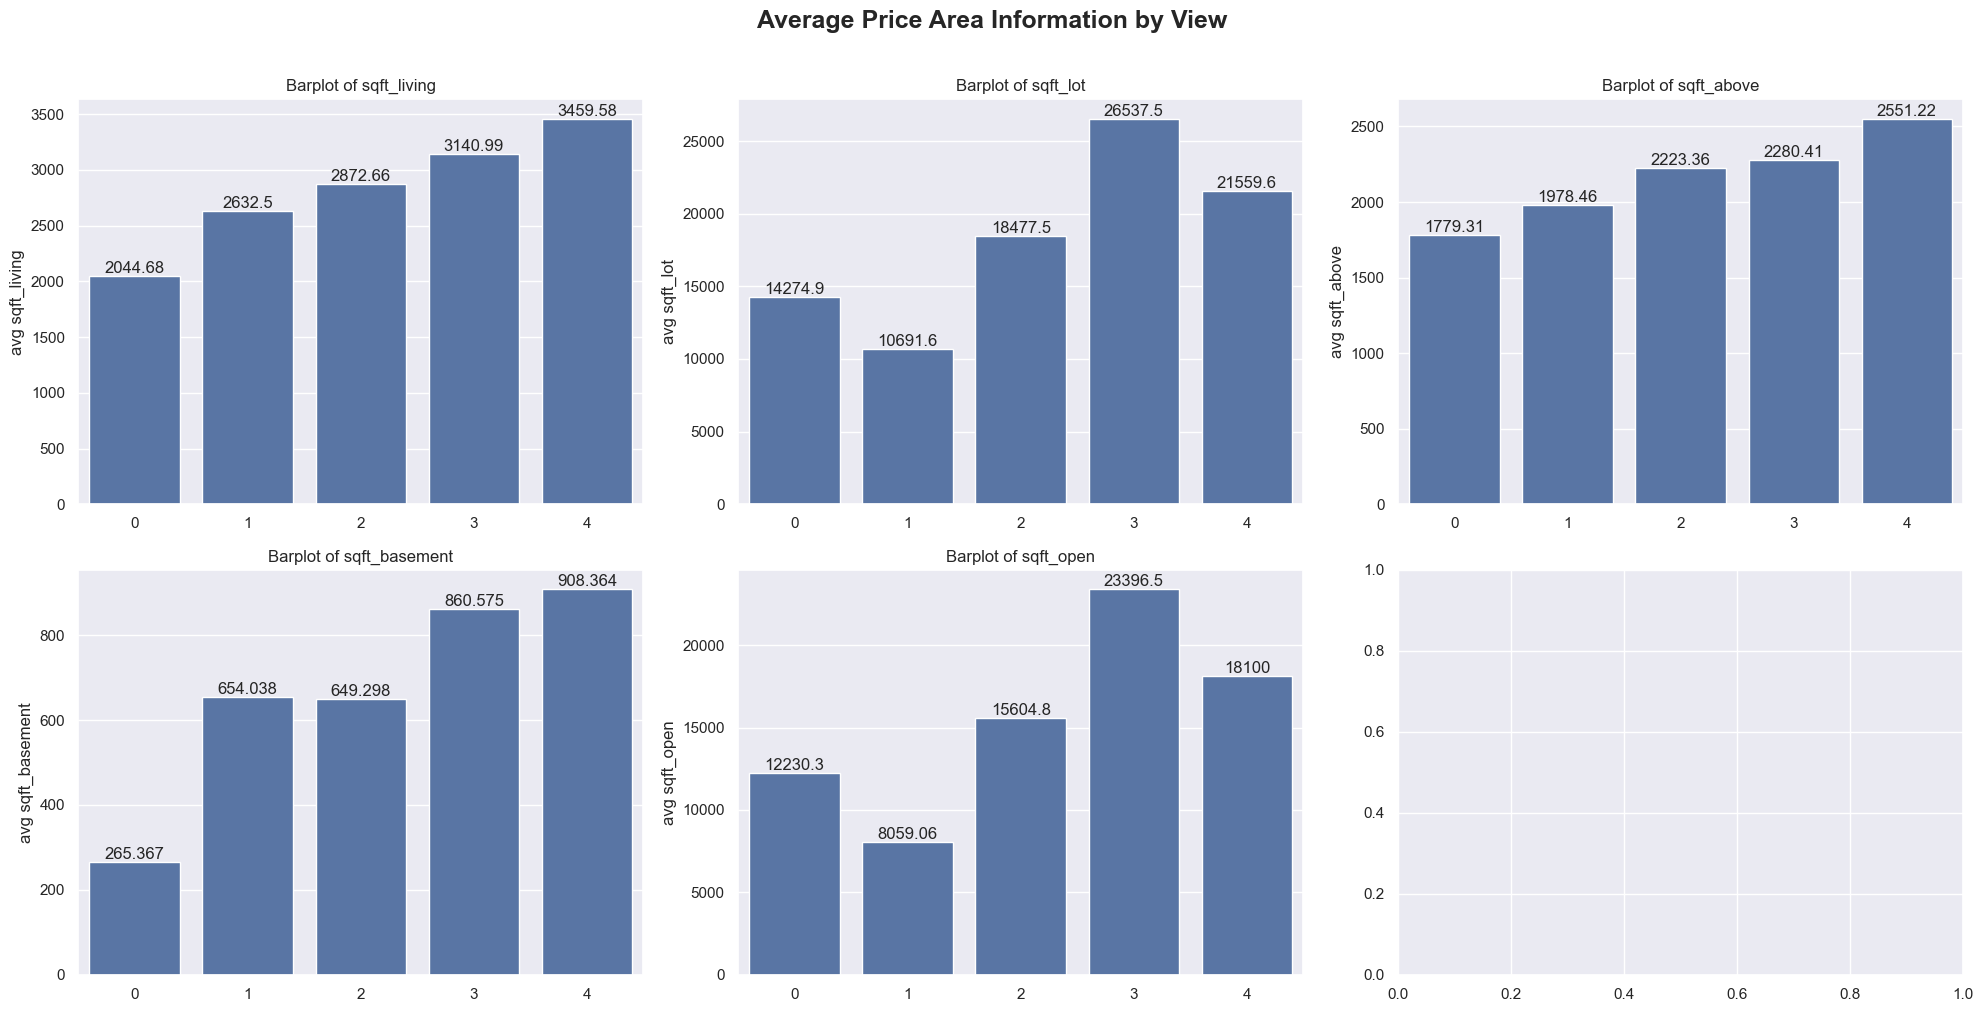

In [247]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, feature in enumerate(area_information):
    sns.barplot(df, x="view", y=feature, ax=axes[i], errorbar=None, estimator="mean")
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_title(f"Barplot of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(f"avg {feature}")

plt.suptitle(
    "Average Price Area Information by View",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{deep_dive_file_path}Average Price Area Information by View.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insight:
- Terdapat tren kenaikan rata-rata harga rumah pada setiap tingkatan aspek penampilan rumah
- Terdapat juga tren kenaikan pada beberapa area information yaitu luas banguann, luas lantai atas, dan luas basement

*tanpa mempertimbangkan variable lain

*3. condition*

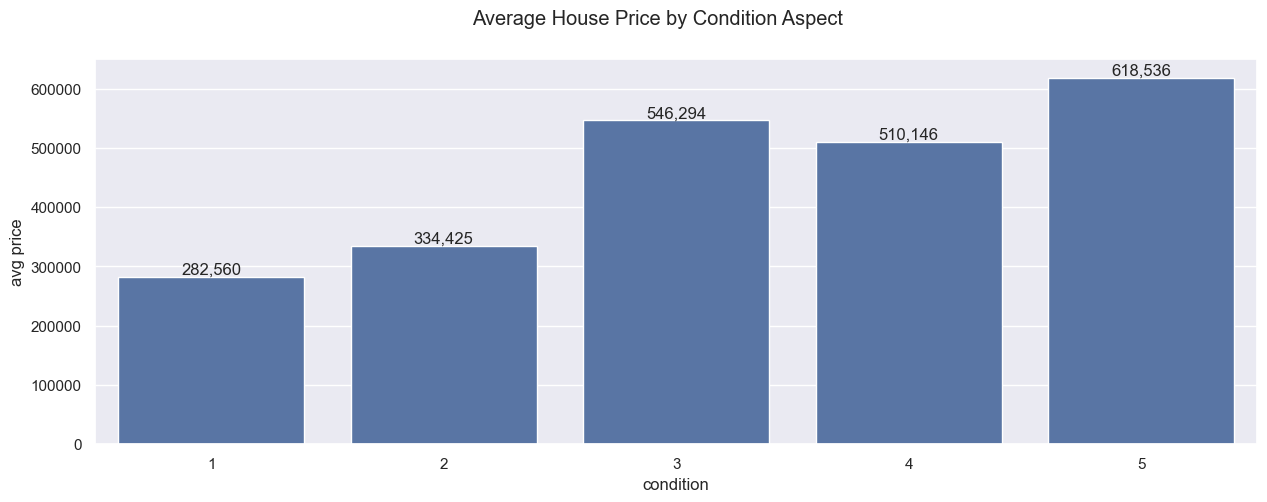

In [248]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(
    df,
    x="condition",
    y="price",
    ax=ax,
    errorbar=None,
    estimator="mean",
)
ax.set_ylabel("avg price")
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}")
plt.suptitle("Average House Price by Condition Aspect")

fig.savefig(
    f"{deep_dive_file_path}Average House Price by Condition Aspect.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

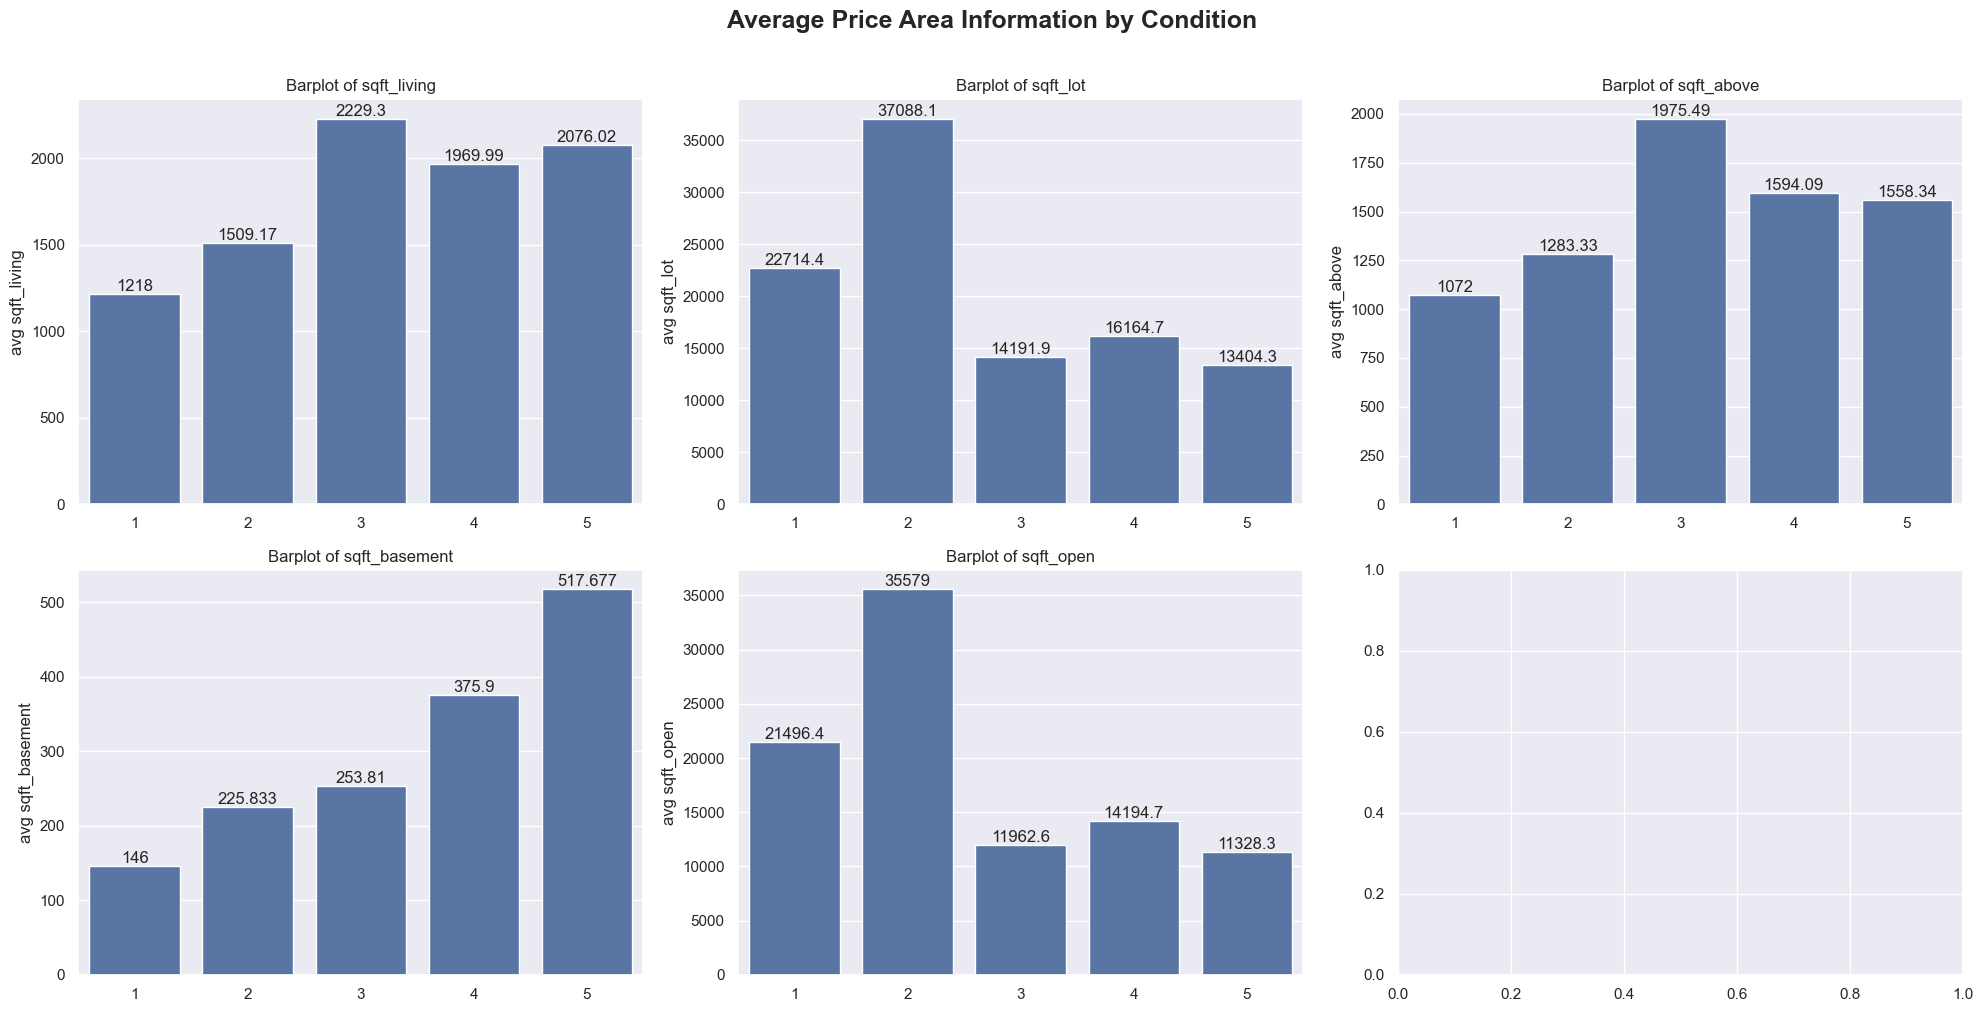

In [249]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, feature in enumerate(area_information):
    sns.barplot(
        df, x="condition", y=feature, ax=axes[i], errorbar=None, estimator="mean"
    )
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_title(f"Barplot of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(f"avg {feature}")

plt.suptitle(
    "Average Price Area Information by Condition",
    y=y_title,
    fontweight=title_weight,
    fontsize=title_size,
)
plt.tight_layout()

fig.savefig(
    f"{deep_dive_file_path}Average Price Area Information by Condition.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
)

plt.show()

Insight:
- Terdapat tren kenaikan rata-rata harga pada setiap kenaikan kondisi rumah
- Terdapat juga tren kenaikan pada luas basement. semakin tinggi kualitas rumah maka semakin luas basemenetnya

*tanpa mempertimbangkan variable lain

#### **e. Anomaly Everywhere!**

Pada bagian ini kami akan mengungkap anomali-anomali yang ada pada data

*1. House Price Zero Anomaly*

Mengacu pada sub bab 2.2. tentang description report terdapat rumah dengan harga 0, hal tersebut perlu ditelusuri lebih dalam

In [183]:
print("statistik deskirptif rumah dengan harga 0:")
display(df.query("price == 0").reset_index(drop=True).describe().T)

statistik deskirptif rumah dengan harga 0:


count      mean       std       min       25%       50%  \
bedrooms            40.00      4.03      1.14      1.00      3.75      4.00   
bathrooms           40.00      2.82      1.21      1.00      2.19      2.75   
sqft_living         40.00  2,890.25  1,423.24    720.00  1,982.50  2,810.00   
sqft_lot            40.00 16,929.40 29,301.99  4,545.00  6,887.00  9,662.50   
floors              40.00      1.54      0.54      1.00      1.00      1.50   
waterfront          40.00      0.07      0.27      0.00      0.00      0.00   
view                40.00      0.88      1.52      0.00      0.00      0.00   
condition           40.00      3.60      0.74      3.00      3.00      3.00   
sqft_above          40.00  2,424.25  1,364.11    720.00  1,457.50  2,120.00   
sqft_basement       40.00    466.00    631.97      0.00      0.00      0.00   
yr_built            40.00  1,973.75     25.81  1,925.00  1,952.75  1,978.00   
yr_renovated        40.00    847.40    998.31      0.00      0.00      0.00   
price               40.00      0.00      0.00      0.00      0.00      0.00   
sqft_open           40.00 14,039.15 29,303.77  1,245.00  5,026.25  7,015.00   
price_per_sqft_lot  40.00      0.00      0.00      0.00      0.00      0.00   
basement            40.00      0.40      0.50      0.00      0.00      0.00   
house_age           40.00     41.25     25.81      2.00     16.25     37.00   
renovated           40.00      0.42      0.50      0.00      0.00      0.00   
zip_code            40.00 98,070.95     55.71 98,001.00 98,026.75 98,060.50   
lat                 40.00     47.54      0.14     47.20     47.47     47.58   
lng                 40.00   -122.20      0.13   -122.34   -122.32   -122.22   

                         75%        max  
bedrooms                5.00       6.00  
bathrooms               3.56       6.25  
sqft_living         3,682.50   8,020.00  
sqft_lot           17,926.00 188,200.00  
floors                  2.00       3.00  
waterfront              0.00       1.00  
view                    2.00       4.00  
condition               4.00       5.00  
sqft_above          3,217.50   8,020.00  
sqft_basement         920.00   1,950.00  
yr_built            1,998.75   2,013.00  
yr_renovated        1,999.00   2,009.00  
price                   0.00       0.00  
sqft_open          12,876.50 186,000.00  
price_per_sqft_lot      0.00       0.00  
basement                1.00       1.00  
house_age              62.25      90.00  
renovated               1.00       1.00  
zip_code           98,109.75  98,188.00  
lat                    47.62      47.76  
lng                  -122.14    -121.84

Insight:
- Spesifikasi rumah dengan harga 0 lengkap, sehingga dapat disimpulkan data tersebut merupakan anomaly, kemungkinan salah satunya bisa disebabkan krena kesalahan pada penginputan data

*2. House Price Anamoly*

In [184]:
def outlier_threshold(s: pd.Series) -> tuple():
    """
    fungsi untuk mengekstrak lower dan upper fence dari data

    Args:
        s (pd.Series) = 1 kolom data yang ingin diketahui lower dan upper fence-nya

    Returns:
        tuple: lower fence dan upper fence dari data
    """

    iqr = s.quantile(0.75) - s.quantile(0.25)
    upper_fence = s.quantile(0.75) + (1.5 * iqr)
    lower_fence = s.quantile(0.25) - (1.5 * iqr)

    return (lower_fence, upper_fence)

In [185]:
lower_fence, upper_fence = outlier_threshold(df["price"])

In [186]:
lower_fence, upper_fence

(np.float64(-165104.16666687495), np.float64(1139062.500000125))

In [187]:
outlier_price = df.query(f"price > {upper_fence}").reset_index(drop=True)

In [188]:
df.query(f"price <= {upper_fence}").describe().T

count       mean        std       min        25%  \
bedrooms           3,488.00       3.36       0.88      0.00       3.00   
bathrooms          3,488.00       2.10       0.73      0.00       1.75   
sqft_living        3,488.00   2,039.69     822.78    370.00   1,440.00   
sqft_lot           3,488.00  14,514.60  36,254.93    638.00   5,000.00   
floors             3,488.00       1.49       0.53      1.00       1.00   
waterfront         3,488.00       0.00       0.07      0.00       0.00   
view               3,488.00       0.18       0.67      0.00       0.00   
condition          3,488.00       3.45       0.67      1.00       3.00   
sqft_above         3,488.00   1,752.20     775.10    370.00   1,170.00   
sqft_basement      3,488.00     287.49     427.25      0.00       0.00   
yr_built           3,488.00   1,970.66      29.42  1,900.00   1,951.00   
yr_renovated       3,488.00     816.48     980.89      0.00       0.00   
price              3,488.00 480,176.26 218,430.22      0.00 315,000.00   
sqft_open          3,488.00  12,474.91  36,108.78 -1,485.00   3,090.00   
price_per_sqft_lot 3,488.00      83.64      88.42      0.00      31.20   
basement           3,488.00       0.39       0.49      0.00       0.00   
house_age          3,488.00      44.34      29.42      1.00      19.00   
renovated          3,488.00       0.41       0.49      0.00       0.00   
zip_code           3,488.00  98,079.94      53.07 98,001.00  98,033.00   
lat                3,488.00      47.56       0.13     47.20      47.48   
lng                3,488.00    -122.08       5.85   -122.47    -122.32   

                          50%        75%          max  
bedrooms                 3.00       4.00         9.00  
bathrooms                2.25       2.50         6.25  
sqft_living          1,940.00   2,512.50     8,020.00  
sqft_lot             7,588.50  10,776.25 1,074,218.00  
floors                   1.50       2.00         3.50  
waterfront               0.00       0.00         1.00  
view                     0.00       0.00         4.00  
condition                3.00       4.00         5.00  
sqft_above           1,540.00   2,200.00     8,020.00  
sqft_basement            0.00     570.00     2,300.00  
yr_built             1,975.00   1,996.00     2,014.00  
yr_renovated             0.00   1,999.00     2,014.00  
price              445,000.00 606,000.00 1,135,250.00  
sqft_open            5,650.50   8,713.50 1,071,208.00  
price_per_sqft_lot      56.23     103.69     1,053.98  
basement                 0.00       1.00         1.00  
house_age               40.00      64.00       115.00  
renovated                0.00       1.00         1.00  
zip_code            98,072.00  98,118.00    98,354.00  
lat                     47.62      47.62        47.77  
lng                   -122.21    -122.15       121.93

In [189]:
outlier_price.describe().T

count         mean        std          min          25%  \
bedrooms           192.00         4.15       0.95         2.00         4.00   
bathrooms          192.00         3.21       0.92         1.00         2.50   
sqft_living        192.00     3,921.08   1,320.34     1,560.00     3,102.50   
sqft_lot           192.00    20,270.93  33,242.28     1,664.00     6,377.75   
floors             192.00         1.84       0.45         1.00         1.50   
waterfront         192.00         0.06       0.24         0.00         0.00   
view               192.00         1.20       1.50         0.00         0.00   
condition          192.00         3.53       0.76         2.00         3.00   
sqft_above         192.00     3,162.59   1,136.36     1,050.00     2,360.00   
sqft_basement      192.00       758.49     770.20         0.00         0.00   
yr_built           192.00     1,968.67      34.18     1,900.00     1,937.00   
yr_renovated       192.00       798.82     978.89         0.00         0.00   
price              192.00 1,658,063.84 678,701.54 1,140,000.00 1,268,500.00   
sqft_open          192.00    16,349.85  32,762.63      -170.00     3,162.75   
price_per_sqft_lot 192.00       177.16     146.52         5.24        88.88   
basement           192.00         0.62       0.49         0.00         0.00   
house_age          192.00        46.33      34.18         1.00        14.00   
renovated          192.00         0.40       0.49         0.00         0.00   
zip_code           192.00    98,069.31      56.35    98,004.00    98,007.75   
lat                192.00        47.61       0.04        47.43        47.60   
lng                192.00      -122.23       0.09      -122.34      -122.32   

                            50%          75%          max  
bedrooms                   4.00         5.00         8.00  
bathrooms                  3.25         3.50         6.75  
sqft_living            3,730.00     4,432.50    10,040.00  
sqft_lot              10,462.00    18,273.50   230,652.00  
floors                     2.00         2.00         3.00  
waterfront                 0.00         0.00         1.00  
view                       0.00         2.25         4.00  
condition                  3.00         4.00         5.00  
sqft_above             3,000.00     3,822.50     7,680.00  
sqft_basement            755.00     1,262.50     4,820.00  
yr_built               1,977.00     2,001.00     2,014.00  
yr_renovated               0.00     1,994.50     2,014.00  
price              1,418,300.00 1,796,250.00 7,062,500.00  
sqft_open              7,040.50    14,510.75   224,602.00  
price_per_sqft_lot       143.45       234.27     1,538.76  
basement                   1.00         1.00         1.00  
house_age                 38.00        78.00       115.00  
renovated                  0.00         1.00         1.00  
zip_code              98,052.00    98,112.00    98,199.00  
lat                       47.62        47.62        47.76  
lng                     -122.23      -122.15      -121.90

In [190]:
upper_fence

np.float64(1139062.500000125)

Insight:
- Rumah dengan harga melebihi upper fence/bond yaitu 1.139 juta, memiliki nilai median spesifikasi informasi area seperti sqft_living, sqft_lot, sqft_above, sqft_basement melebihi rumah dengan harga dibawah upper fence
- 50% rumah dengan harga lebih dari 1.139 juta memiliki jumlah kamar tidur lebih dari 4 kamar dan 25% diantaranya memiliki jumlah kamar tidur sebanyak 5 kamar. Sementara untuk rumah dengan harga dibawah 1.139  juta, 50% diantaranya memiliki jumlah kamar tidur lebih dari 3 kamar dan 25% diantaranya memiliki jumlah kamar lebih dari 4.
- Terdapat hal yang menarik, sqft_lot pada rumah dengan harga kurang dari 1.139 juta memiliki nilai maksimal jauh lebih tinggi dibandingkan dengan rumah diatas harga upper fence tersebut, yaitu secara berurutan 1,074,218 sqft dan 230,652 sqft.

*3. Sqft_lot Anomaly*

mari kita telusuri insight anomaly yang didapat pada point diatas. yaitu tentang terdapat anomaly nilai maksimal luas lahan keseluruhan rumah dengan harga dibawah upper fence. luas lahan keseluruhan rumah tersebut adalah 1,074,218

In [191]:
print("Spesifikasi rumah dengan lot size paling luas:")
df.query("sqft_lot == 1074218").T[386]

Spesifikasi rumah dengan lot size paling luas:


bedrooms                                     5
bathrooms                                 3.25
sqft_living                               3010
sqft_lot                               1074218
floors                                    1.50
waterfront                                   0
view                                         0
condition                                    5
sqft_above                                2010
sqft_basement                             1000
yr_built                                  1931
yr_renovated                                 0
street                16200-16398 252nd Ave SE
city                                  Issaquah
statezip                              WA 98027
price                               542,500.00
price_category                        Moderate
sqft_open                              1071208
price_per_sqft_lot                        0.51
basement                                     1
era_category                  Pre-World War II
house_age    

In [192]:
print("Rata-rata spesifikasi rumah keseluruhan:")
df.describe().T["mean"]

Rata-rata spesifikasi rumah keseluruhan:


bedrooms                   3.40
bathrooms                  2.16
sqft_living            2,137.85
sqft_lot              14,814.93
floors                     1.51
waterfront                 0.01
view                       0.24
condition                  3.46
sqft_above             1,825.78
sqft_basement            312.07
yr_built               1,970.56
yr_renovated             815.56
price                541,631.26
sqft_open             12,677.09
price_per_sqft_lot        88.52
basement                   0.40
house_age                 44.44
renovated                  0.41
zip_code              98,079.39
lat                       47.57
lng                     -122.09
Name: mean, dtype: float64

In [193]:
df.query('city == "Issaquah"').describe().T["mean"]

bedrooms                   3.56
bathrooms                  2.60
sqft_living            2,478.71
sqft_lot              26,486.16
floors                     1.79
waterfront                 0.01
view                       0.09
condition                  3.30
sqft_above             2,122.46
sqft_basement            356.25
yr_built               1,992.43
yr_renovated             407.50
price                598,277.70
sqft_open             24,007.45
price_per_sqft_lot       113.18
basement                   0.44
house_age                 22.57
renovated                  0.20
zip_code              98,029.12
lat                       47.54
lng                     -122.05
Name: mean, dtype: float64

Spesifikasi rumah tersebut:
- luas lahan keseluruhan paling luas diantara rumah lainnya (merupakan nilai maksimal dari sqft_lot)
- rumah memiliki luas basement, bangunan, dan lantai atas diatas rata-rata keseluruhan
- lokasi kota rumah berada hanya berjarak 23 menit dari pusat kota Seattle
- harga rumah 542.5 ribu sedikit diatas harga rata-rata keseluruhan yaitu 541 ribu
- walapun rumah tersebut dibangun pada 1931 dan belum pernah direnovasi, namun kondisi rumah memiliki nilai maksimal yaitu 5 dari skala 1-5
- rumah memiliki jumlah kamar tidur dan toilet lebih dari rata-rata keseluruhan rumah

Insight:
- Spesifikasi rumah tersebut sangat bagus sekali, dengan harga dibawah rata-rata, dan dengan hampir keseluruhan spesifikasi memiliki nilai diatas rata-rata keseluruhan. namun tentu saja hal ini akan menimbulkan banyak pertanyaan, salah satunya adalah apa yang menyebabkan rumah tersebut sangat murah? untuk menjawab hal tersebut diperlukan tim untuk melakukan penelitian secara langsung ke rumah tersebut dengan mempertimbangkan beberapa faktor tambahan seperti history rumah, kualitas tetangga, dan kualitas lingkungan.

Insight After Doing Litle Research:
- Rumah tersebut berada pada Daerah bernama Mirrormont
- Menurut artikel yang dilansir pada websie City of Issaquah [1], Daerah Issaquah merupakan daerah yang termasuk dalam floodplain Daerah floodplain merupakan daerah dataran banjir, pada artikel tersebut disebutkan bahwa Issaquah memiliki riwayat banjir yang cukup sering yaitu terjadi pada tahun 1986, 1990, 1996, 2009, dan 2020. Banjir yang paling berdampak adalah pada tahun 1996 dan 2009, Menyebabkan kerugian hingga jutaan dolar.
- Daerah Mirrormonth diapit oleh beberapa pegunungan
- menurut website Augurisk.com [2] daerah Mirrormont memiliki resiko bencana gempa bumi yang termasuk tinggi dengan kategori resiko 75%

source:
- [1] https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.issaquahwa.gov%2FDocumentCenter%2FView%2F24%2FFlood-Brochure%3FbidId%3D&psig=AOvVaw3LaO-9JTe74q6xOGyl3UOv&ust=1730816234025000&source=images&cd=vfe&opi=89978449&ved=0CAYQrpoMahcKEwiQ1ueY78KJAxUAAAAAHQAAAAAQBA
- [2] https://www.augurisk.com/neighborhood/washington/issaquah/mirrormont/47.463466013491804/-122.00884475722262

*4. living area vs. house price anomaly*

In [194]:
px.scatter(df, x="sqft_living", y="price", title="Living Size vs Price")

In [ ]:
X = df[["sqft_living", "price"]]

X_scaled = StandardScaler().fit_transform(X)

cluster = DBSCAN(eps=0.7, min_samples=10)
cluster.fit(X_scaled)

print("label: ", set(cluster.labels_))

X["cluster"] = cluster.labels_

fig = px.scatter(
    X,
    x="sqft_living",
    y="price",
    color="cluster",
    title="Living Area vs. House Price Anomaly Detection with DBSCAN",
)

fig.write_image(
    f"{deep_dive_file_path}Living Area vs. House Price Anomaly Detection with DBSCAN.jpg"
)

fig.show()

label:  {np.int64(0), np.int64(-1)}


In [196]:
df["cluster_living_price"] = cluster.labels_

In [197]:
anomaly_1 = df.query("cluster_living_price == -1")

In [198]:
anomaly_1.describe().T

count         mean          std       min          25%  \
bedrooms              34.00         4.76         0.92      3.00         4.00   
bathrooms             34.00         4.29         1.27      1.00         3.50   
sqft_living           34.00     6,066.85     1,713.32  1,710.00     5,392.50   
sqft_lot              34.00    54,750.91    72,926.69  1,664.00    13,310.75   
floors                34.00         1.88         0.43      1.00         2.00   
waterfront            34.00         0.18         0.39      0.00         0.00   
view                  34.00         1.53         1.62      0.00         0.00   
condition             34.00         3.24         0.55      2.00         3.00   
sqft_above            34.00     4,754.68     1,583.45  1,050.00     3,821.25   
sqft_basement         34.00     1,312.18     1,092.83      0.00       102.50   
yr_built              34.00     1,985.35        25.53  1,912.00     1,978.00   
yr_renovated          34.00       647.15       949.85      0.00         0.00   
price                 34.00 2,125,293.72 1,477,583.08      0.00 1,172,500.00   
sqft_open             34.00    48,684.06    72,574.91    -46.00     7,299.75   
price_per_sqft_lot    34.00       141.48       264.92      0.00        17.49   
basement              34.00         0.74         0.45      0.00         0.25   
house_age             34.00        29.65        25.53      5.00        13.25   
renovated             34.00         0.32         0.47      0.00         0.00   
zip_code              34.00    98,051.00        53.24 98,003.00    98,009.50   
lat                   34.00        47.59         0.08     47.31        47.57   
lng                   34.00      -122.18         0.12   -122.34      -122.24   
cluster_living_price  34.00        -1.00         0.00     -1.00        -1.00   

                              50%          75%          max  
bedrooms                     5.00         5.00         7.00  
bathrooms                    4.50         4.94         6.75  
sqft_living              6,015.00     6,835.00    10,040.00  
sqft_lot                21,369.00    50,707.50   244,716.00  
floors                       2.00         2.00         3.00  
waterfront                   0.00         0.00         1.00  
view                         2.00         2.75         4.00  
condition                    3.00         3.00         5.00  
sqft_above               4,620.00     5,933.50     8,020.00  
sqft_basement            1,405.00     1,912.50     4,820.00  
yr_built                 1,998.50     2,001.75     2,010.00  
yr_renovated                 0.00     1,994.25     2,009.00  
price                2,155,000.00 2,665,124.58 7,062,500.00  
sqft_open               15,435.00    43,965.00   237,816.00  
price_per_sqft_lot          81.49       181.35     1,538.76  
basement                     1.00         1.00         1.00  
house_age                   16.50        37.00       103.00  
renovated                    0.00         1.00         1.00  
zip_code                98,039.00    98,070.75    98,199.00  
lat                         47.60        47.62        47.76  
lng                       -122.20      -122.15      -121.90  
cluster_living_price        -1.00        -1.00        -1.00

In [199]:
anomaly_1.describe(include=["object", "category"]).T

count unique               top freq
street                34     34  4437 55th Ave NE    1
city                  34     14          Bellevue    7
statezip              34     20          WA 98040    5
price_category        31      4            Luxury   28
era_category          34      4            Modern   15
living_above_equal    34      2         not equal   25

In [200]:
print("anomaly sqft_living vs price")
anomaly_1.describe().T["mean"].to_frame()

anomaly sqft_living vs price


mean
bedrooms                     4.76
bathrooms                    4.29
sqft_living              6,066.85
sqft_lot                54,750.91
floors                       1.88
waterfront                   0.18
view                         1.53
condition                    3.24
sqft_above               4,754.68
sqft_basement            1,312.18
yr_built                 1,985.35
yr_renovated               647.15
price                2,125,293.72
sqft_open               48,684.06
price_per_sqft_lot         141.48
basement                     0.74
house_age                   29.65
renovated                    0.32
zip_code                98,051.00
lat                         47.59
lng                       -122.18
cluster_living_price        -1.00

In [201]:
print("non anomaly data sqft_living vs price")
df.query("cluster_living_price == 0").describe().T["mean"].to_frame()

non anomaly data sqft_living vs price


mean
bedrooms                   3.39
bathrooms                  2.14
sqft_living            2,101.21
sqft_lot              14,442.52
floors                     1.51
waterfront                 0.01
view                       0.22
condition                  3.46
sqft_above             1,798.47
sqft_basement            302.74
yr_built               1,970.42
yr_renovated             817.13
price                526,863.15
sqft_open             12,341.31
price_per_sqft_lot        88.03
basement                   0.40
house_age                 44.58
renovated                  0.41
zip_code              98,079.65
lat                       47.57
lng                     -122.09
cluster_living_price       0.00

In [202]:
anomaly_1.query("price > 0")["price"].sort_values()

1085     195,000.00
3400     452,500.00
1087     740,000.00
2533   1,135,000.00
3578   1,135,250.00
1471   1,150,000.00
1520   1,240,000.00
3492   1,385,000.00
1968   1,550,000.00
2851   1,600,000.00
3184   1,680,000.00
479    1,700,000.00
898    1,820,000.00
3360   2,110,000.00
3140   2,200,000.00
449    2,238,888.00
277    2,321,000.00
2349   2,400,000.00
1173   2,458,000.00
2912   2,466,350.00
241    2,555,000.00
1047   2,560,498.33
366    2,700,000.00
2529   2,750,000.00
302    2,888,000.00
1131   3,100,000.00
866    3,710,000.00
1263   3,800,000.00
1640   4,489,000.00
392    4,668,000.00
2184   7,062,500.00
Name: price, dtype: float64

In [252]:
fig = px.histogram(
    anomaly_1,
    x="era_category",
    text_auto=True,
    title=("Era Category in anomaly_1 Data"),
)

fig.write_image(f"{deep_dive_file_path}Era Category in anomaly_1 Data.jpg")

fig.show()

Insight dari data anomali sqft_living dan price:
- Harga rumah cenderung mahal, dari total data anomaly yang terdeteksi yaitu 34 rumah, ada sebanyak 25% harga rumah yang dibawah 1.175 juta
- Hanya terdapat 3 rumah yang memiliki harga dibawah 1 juta (*harga 0 tidak diikutkan), selebihnya lebih dari 1 juta
- Dari 31 rumah (*harga rumah 0 tidak digunakan) terdapat 28 rumah dengan tipe harga rumah Luxury
- Rumah yang terdeteksi sebagai anomaly memiliki rata-rata luas bangunan rumah hampir 3x dari rata-rata luas bangunan rumah umumnya (selain anomaly). dengan nilai rata-rata masing-masing adalah 6,066.85 dan 2,101.21
-  Rumah pada data anomaly_1 didominasi oleh rumah dengan gaya arsitektur early modern ke modern.

*5. Average House Price in 1935 dan 1936 Anomaly*

In [204]:
df.query(f"yr_built in {[1935, 1936]}")

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
59           4       3.50         4730     13586    1.50           0     0   
218          4       2.25         2980      8051    1.50           0     2   
756          4       2.50         2230      4372    2.00           0     0   
1159         4       2.75         2600      2750    1.50           0     0   
1591         2       2.25         2460     16940    1.50           0     4   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
59            5        4270            460      1935             0   
218           4        2020            960      1935             0   
756           5        1540            690      1935             0   
1159          3        1620            980      1936             0   
1591          4        1930            530      1936             0   

                     street     city  statezip        price price_category  \
59      1404 Broadmoor Dr E  Seattle  WA 98112 2,453,500.00         Luxury   
218     2550 Westmont Way W  Seattle  WA 98199   535,000.00       Moderate   
756      5641 Keystone Pl N  Seattle  WA 98103   900,000.00           High   
1159  2455 Queen Anne Ave N  Seattle  WA 98109   840,000.00           High   
1591       6827 36th Ave NW  Seattle  WA 98117 1,370,000.00         Luxury   

      sqft_open  price_per_sqft_lot  basement      era_category  house_age  \
59         8856              180.59         1  Pre-World War II         80   
218        5071               66.45         1  Pre-World War II         80   
756        2142              205.86         1  Pre-World War II         80   
1159        150              305.45         1  Pre-World War II         79   
1591      14480               80.87         1  Pre-World War II         79   

      renovated  zip_code   lat     lng living_above_equal  \
59            0     98112 47.62 -122.32          not equal   
218           0     98199 47.62 -122.32          not equal   
756           0     98103 47.62 -122.32          not equal   
1159          0     98109 47.62 -122.32          not equal   
1591          0     98117 47.62 -122.32          not equal   

      cluster_living_price  
59                       0  
218                      0  
756                      0  
1159                     0  
1591                     0

Insight:
- Setiap rumah tersebut berlokasi di pusat kota Seattle
- Terdapat 5 rumah dengan rincian, 3 rumah dibangun tahun 1935 dan 2 rumah dibangun tahun 1936
- Terdapat range harga yang cukup jauh pada rumah yang dibangun tahun 1935 yaitu dari 535 ribu sampai 2.4 juta, hal ini yang menyababkan rata-rata harga rumah pada tahun tersebut sangat tinggi dibandingkan dengan tahun-tahun lainnya
- Sama halnya dengan rumah yang dibangun pada tahun 1936, range harga dari 840 fibu hingga 1.37 juta. menyebabkan rata-rata harganya tinggi
- Dua rumah dengan harga tertinggi pada anomaly tersebut memiliki luas lahan keseluruhan masing-masing 13 ribu sqft dengan harga 2.4 juta dan 16 ribu dengan harga 1.37 juta
- Luas bangunan rumah termahal sebanding dengan luas bangunanya yaitu sekitar 4.7 ribu sqft

### 2.3.4. Data Exploration Report

Report:
- Distribusi variable price adalah positively skewed
- Terdapat harga rumah bernilai 0, setelah dilakukan pengecekan ternyata semua variable terisi dengan rentang yang masuk akal, sehingga kami asumsikan ada kesalahan dalam penginputan data. Beberapa solusi untuk mengatasi data hilang adalah dengan menghapus data, imputasi dengan median (skewed distribution), dan supervised imputer.
- 50.16% rumah pada dataset bertipe harga moderate yaitu rumah dengan rentang harga 300 ribu hingga kurang dari 600 ribu
- Ada sebanyak 2203 rumah yang tidak memiliki basement
- Hanya ada 0.76% atau 28 rumah saja yang memiliki nilai 1 pada variabe waterfront
- Terdapat nilai 0 pada variable view, nilai 0 tersebut sekitar 90% dari keseluruhan data, padahal rentang dari variable tersebut adalah 1-5. ada dua kemungkinan yaitu pertama penilaian view dalam skala 0-4 atau kemungkinan kedua rentang view tetap 1-5, tetapi ada banyak rumah yang tidak dinilai aspek penampilannya dan tidak ada rumah yang mendapat nilai view 5
- Kurang dari 3% rumah mempunyai nilai dibawah 3 dari skala 1-5.
- Terdapat 2175 rumah yang belum drenovasi dan 1505 rumah telah direnovasi
- Lokasi rumah paling banyak berada di kota Seattle dengan jumlah 1255 rumah.
- Variable sqft_living (luas bangunan) berkorelasi positif kuat dengan price (harga rumah)
- Terdapat korelasi yang kuat antara variable sqft_living (luas bangunan) dengan sqft_above (luas bangunan lantai atas) hal ini dikarenakan banyak rumah yang memiliki luas bangunan sama dengan luas lantai atas.
- Ada perbedaan median harga dari rumah yang memiliki luas bangunan dan luas lantai atas yang sama dan yang berbeda
- Terdapat hubungan positif antara variabel jumlah kamar tidur dan jumlah lantai rumah dengan variabel harga rumah, meskipun hubungan ini lemah secara individual. Sementara itu, terdapat hubungan positif yang signifikan antara variabel jumlah kamar mandi dan harga rumah dengan tingkat hubungan yang sedang
- Terdapat hubungan linear positif yang sangat signifikan dan kuat antara variabel jumlah kamar mandi dan kamar tidur dengan luas bangunan rumah secara individual, menunjukkan bahwa semakin banyak kamar mandi dan kamar tidur, semakin luas bangunannya, tanpa mempertimbangkan variabel lain.
- Terdapat satu rumah yang tidak memiliki kamar tidur dan kamar mandi namun memiliki harga yang sangat mahal yaitu 1.095 juta. Rumah tersebut bisa ditargetkan untuk pelaku usaha industri kreatif untuk keperluan dalamm kebebasan menyusun layout rumah.
- Top 5 lowest average price by year didominasi oleh rumah dengan gaya arsitektur setelah perang, terdapat 4 dari top 5
- top 5 highest average price by year semuanya bertipe rumah dengan gaya arsitektur era sebelum perang
- Banyak rumah arsitektur klasik (pre-world war II) memiliki nilai rata-rata harga lebih tinggi dibandingkan dengan rata-rata harga keseluruhan
- Sebaliknya Banyak rumah arsitektur masal (post-world war II) memiliki nilai rata-rata harga lebih rendah dibandingkan dengan rata-rata harga keseluruhan
- harga rata-rata rumah era pre-world war II yang tidak direnovasi dan/atau memiliki basement cenderung lebih tinggi dibandingkan dengan rumah yang sudah direnovasi dan tidak memiliki basement.
- Harga rata-rata rumah tertinggi ada dikota Medina, disusul oleh Yarrow Point dan Clyde Hill. Sementara untuk rata-rata luas bangunan, Top 2 masih berada di kota Medina dan Clyde Hill. Terdapat hal menarikm walapun kota Seattle tidak memiliki rata-rata harga dan luas bangunan yang tertinggi, namun kota tersebut memiliki rata-rata harga tanah per kavling paling tinggi diantara kota-kota lain.
- Rumah dengan waterfront cenderung memiliki rata-rata yang lebih tinggi, dengan tipe harga rumah dari mdoerate keatas. Melihat rumah yang tidak memiliki nilai waterfront sebanyak 99.24%, kami akan mempertimbangkan untuk menyeleksi variable tersebut
- Terdapat satu rumah yang memiliki luas lahan keseluruhan jauh melebihi yang lain namun dengan harga sedikit diatas rata-rata harga rumah keseluruhan. Ternyata rumah tersebut berlokasi pada area rawan bencana alam seperti banjir dan gempa bumi.

## 2.4. Verify Data Quality

### 2.4.1. Expect Columns Values not to be Null

In [205]:
df.isna().sum()

bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               0
view                     0
condition                0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated             0
street                   0
city                     0
statezip                 0
price                    0
price_category          40
sqft_open                0
price_per_sqft_lot       0
basement                 0
era_category             0
house_age                0
renovated                0
zip_code                 0
lat                      0
lng                      0
living_above_equal       0
cluster_living_price     0
dtype: int64

terdapat nilai kosong pada variable turunan dari harga rumah yaitu price_category hal ini disebabkan karena terdapat harga rumah bernilai 0. karena variable tersebut menggunakan informasi pada target untuk keperluan pemodelan akan kami drop. untuk harga rumah bernilai 0 akan kami lakukan penghapusan data.

### 2.4.2. Expect Object Columns Values to be Consistent

memastikan nilai pada variable dengan tipe objek tidak terdapat inkonsistensi dalam penulisan besar keciil huruf

In [206]:
df.describe(include=["object"]).T["unique"]

street                3634
city                    42
statezip                77
living_above_equal       2
Name: unique, dtype: object

In [207]:
np.char.lower(df["city"].unique().astype("str")).shape

(42,)

In [208]:
np.char.lower(df["statezip"].unique().astype("str")).shape

(77,)

In [209]:
np.char.lower(df["street"].unique().astype("str")).shape

(3634,)

### 2.4.3. Expect Row Values not to be Duplicated

memastikan tidak ada duplikasi baris

In [210]:
df.duplicated().sum()

np.int64(0)

### 2.4.4. Expect Number Variable not to be Negative

memastikan variable bertipe angka tidak bernilai negatif

In [211]:
df.describe().T[["min", "max"]]

min          max
bedrooms                  0.00         9.00
bathrooms                 0.00         6.75
sqft_living             370.00    10,040.00
sqft_lot                638.00 1,074,218.00
floors                    1.00         3.50
waterfront                0.00         1.00
view                      0.00         4.00
condition                 1.00         5.00
sqft_above              370.00     8,020.00
sqft_basement             0.00     4,820.00
yr_built              1,900.00     2,014.00
yr_renovated              0.00     2,014.00
price                     0.00 7,062,500.00
sqft_open            -1,485.00 1,071,208.00
price_per_sqft_lot        0.00     1,538.76
basement                  0.00         1.00
house_age                 1.00       115.00
renovated                 0.00         1.00
zip_code             98,001.00    98,354.00
lat                      47.20        47.77
lng                    -122.47       121.93
cluster_living_price     -1.00         0.00

In [212]:
df.query("sqft_open < 0")["renovated"].value_counts()

renovated
0    107
1     20
Name: count, dtype: int64

- variable lng merupakan koordinat longitude dari pemetaan kota, sehingga tidak masalah jika bernilai negatif
- variable cluster_living_price merupakan variable turunan yang didapat dari pendeteksian anomali 0 berarti tidak anomail -1 berarti anomali. variable tersebut juga melibatkan variable target sehingga tidak kami gunakan dalam pemodelan
- variable sqft_open merupakan variable turunan memiliki arti luas lahan kosong didapat dari pengurangan luas lahan keseuruhan dengan luas bangunan. Jika variable tersebut bernilai minus berarti terdapat rumah yang memiliki luas bangunan lebih luas dibandingkan dengan luas rumah. kami berusaha mempertimbangkan aspek renovasi tapi rumah dengan nilai sqft_open minus tidak semuanya pernah direnovasi. sehingga kami asumsikan terdapat kesalahan dalam penginputan data. data tersebut akan kami drop.

### 2.4.5. Expect Target Variable (price) not to be Zero

In [213]:
df["price"].agg(["min"])

min   0.00
Name: price, dtype: float64

sesuai dengan hasil dari data exploration report terdapat rumah dengan harga 0. startegi yang kami gunakan untuk mengatasi nilai kosong tersebut adalah dengan imputasi median atau dengan menggunakan supervised imputer

### 2.4.6. Data Quality Report

- Nilai kosong pada variabel price_category dimana variabel ini memiliki nilai kosong karena ada rumah dengan harga 0. Karena variabel ini bergantung pada harga rumah untuk kategori harga, kami akan menghapus data rumah dengan harga 0 dan menghapus nilai kosong pada price_category untuk keperluan pemodelan.
- Memastikan tidak ada inkonsistensi pada variabel bertipe objek dengan memeriksa perbedaan penulisan besar-kecil huruf. Hasilnya menunjukkan bahwa semua data dalam variabel tersebut sudah konsisten, tanpa adanya perbedaan penulisan yang tidak sesuai.
•	Memastikan bahwa tidak ada nilai duplikat dalam dataset. Setelah dilakukan pemeriksaan, ternyata tidak ditemukan data duplikat, sehingga semua nilai sudah unik dan siap untuk digunakan dalam analisis selanjutnya.
- Variabel lng (longitude), variabel ini menunjukkan koordinat geografis (longitude) dari lokasi rumah. Nilai negatif pada variabel ini tidak masalah karena menunjukkan posisi rumah di sisi barat Bumi.
- Variabel cluster_living_price, variabel ini menunjukkan apakah rumah tergolong anomali atau tidak, dengan nilai 0 berarti bukan anomali dan -1 berarti anomali. Karena variabel ini melibatkan informasi harga rumah (target), kami tidak akan menggunakannya dalam pemodelan.
- Variabel sqft_open (luas lahan kosong), variabel ini dihitung dengan mengurangi luas bangunan dari luas lahan keseluruhan. Jika hasilnya negatif, berarti ada rumah dengan luas bangunan lebih besar daripada luas tanahnya. Kami akan meneliti lebih lanjut dan mengasumsikan bahwa ini terjadi karena kesalahan input data, sehingga data ini akan kami hapus.
